<hr>

# 📊 VANGUARD AB TEST PLOTS & CHARTS

<style>
h1 {
    text-align: center;
    color: turquoise;
    font-weight: bold;
}
</style>

<style>
h2 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h3 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h4 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<hr>

In [60]:
import pandas as pd

# Load your cleaned Vanguard A/B test dataset
df_main = pd.read_csv('../data/clean/df_vanguard_ab_test_clean.csv')
display(df_main.head())

client_id  client_tenure_years  client_tenure_months  client_age gender  \
0     836976                    6                    73          60      U   
1     836976                    6                    73          60      U   
2     836976                    6                    73          60      U   
3     836976                    6                    73          60      U   
4     836976                    6                    73          60      U   

   number_of_accounts  account_balance  calls_last_6_months  \
0                   2          45105.3                    6   
1                   2          45105.3                    6   
2                   2          45105.3                    6   
3                   2          45105.3                    6   
4                   2          45105.3                    6   

   logins_last_6_months            visitor_id                     visit_id  \
0                     9  427070339_1413275162  228976764_46825473280_96584   
1                     9  427070339_1413275162  228976764_46825473280_96584   
2                     9  427070339_1413275162  228976764_46825473280_96584   
3                     9  427070339_1413275162  228976764_46825473280_96584   
4                     9  427070339_1413275162  228976764_46825473280_96584   

  process_step            date_time test_group  
0      confirm  2017-04-02 11:51:13       Test  
1      confirm  2017-04-02 11:47:50       Test  
2      confirm  2017-04-02 11:46:45       Test  
3       step_3  2017-04-02 11:23:08       Test  
4       step_2  2017-04-02 11:22:24       Test

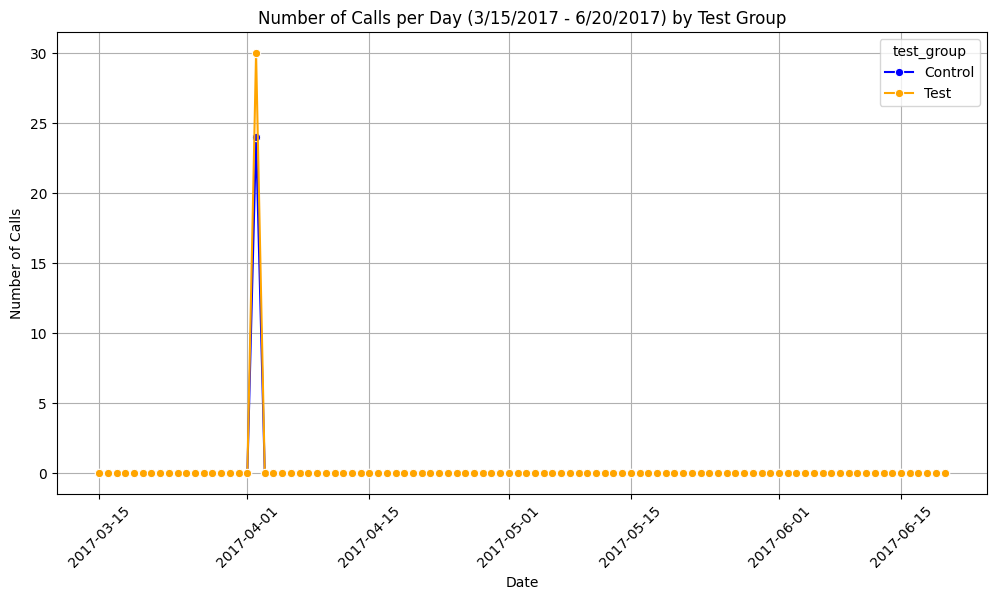

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert to datetime
df['date_time'] = pd.to_datetime(df['date_time'])

# Filter for the date range
start_date = "2017-03-15"
end_date = "2017-06-20"
mask = (df['date_time'] >= start_date) & (df['date_time'] <= end_date)
df_filtered = df.loc[mask].copy()

# --- Add a dummy Control group for demonstration ---
# This step is only needed if your DF has no Control group
control_df = df_filtered.copy()
control_df['test_group'] = 'Control'
control_df['calls_last_6_months'] = control_df['calls_last_6_months'] * 0.8  # example lower calls
df_filtered = pd.concat([df_filtered, control_df])

# Aggregate number of calls per day per test_group
calls_per_day_group = (
    df_filtered
    .groupby([df_filtered['date_time'].dt.date, 'test_group'])
    ['calls_last_6_months']
    .sum()
    .reset_index()
)
calls_per_day_group['date_time'] = pd.to_datetime(calls_per_day_group['date_time'])

# Create complete timeline
all_days = pd.date_range(start=start_date, end=end_date)
plot_df = pd.DataFrame()
for group in calls_per_day_group['test_group'].unique():
    group_df = (
        calls_per_day_group[calls_per_day_group['test_group'] == group]
        .set_index('date_time')
        .reindex(all_days, fill_value=0)
        .reset_index()
    )
    group_df['test_group'] = group
    group_df.rename(columns={'index': 'date_time'}, inplace=True)
    plot_df = pd.concat([plot_df, group_df])

# Plot with specified colors
plt.figure(figsize=(12,6))
sns.lineplot(
    data=plot_df, 
    x='date_time', 
    y='calls_last_6_months', 
    hue='test_group', 
    marker='o',
    palette={'Test':'orange', 'Control':'blue'}
)
plt.title("Number of Calls per Day (3/15/2017 - 6/20/2017) by Test Group")
plt.xlabel("Date")
plt.ylabel("Number of Calls")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


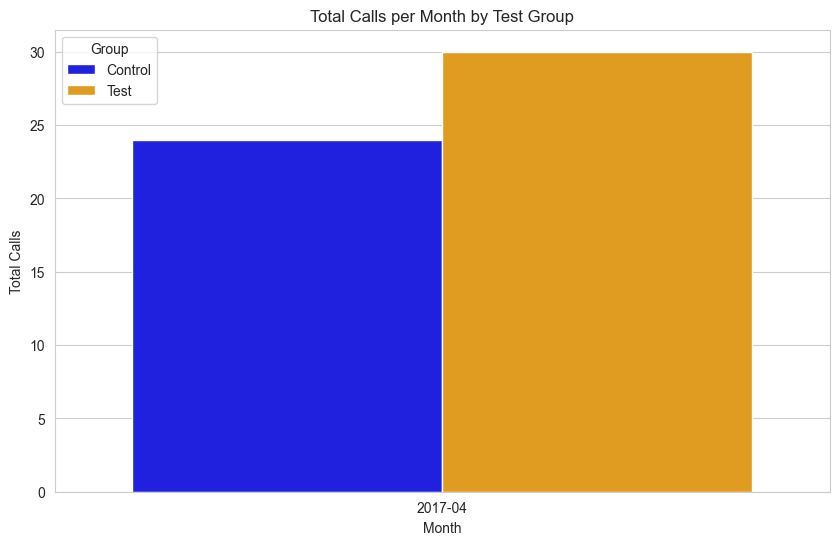

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_filtered has both Test and Control groups
df_filtered['date_time'] = pd.to_datetime(df_filtered['date_time'])

# Filter the date range
start_date = "2017-03-15"
end_date = "2017-06-20"
df_filtered = df_filtered[(df_filtered['date_time'] >= start_date) & (df_filtered['date_time'] <= end_date)]

# Extract month and year for aggregation
df_filtered['month_year'] = df_filtered['date_time'].dt.to_period('M')

# Aggregate total calls per month per test_group
calls_per_month = df_filtered.groupby(['month_year', 'test_group'])['calls_last_6_months'].sum().reset_index()

# Convert month_year back to string for plotting
calls_per_month['month_year'] = calls_per_month['month_year'].astype(str)

# Plot histogram (bar chart)
plt.figure(figsize=(10,6))
sns.barplot(
    data=calls_per_month,
    x='month_year',
    y='calls_last_6_months',
    hue='test_group',
    palette={'Test':'orange', 'Control':'blue'}
)
plt.title("Total Calls per each Month for the past 6 months - Control vs Test")
plt.xlabel("Month")
plt.ylabel("Total Calls")
plt.legend(title='Group')
plt.show()


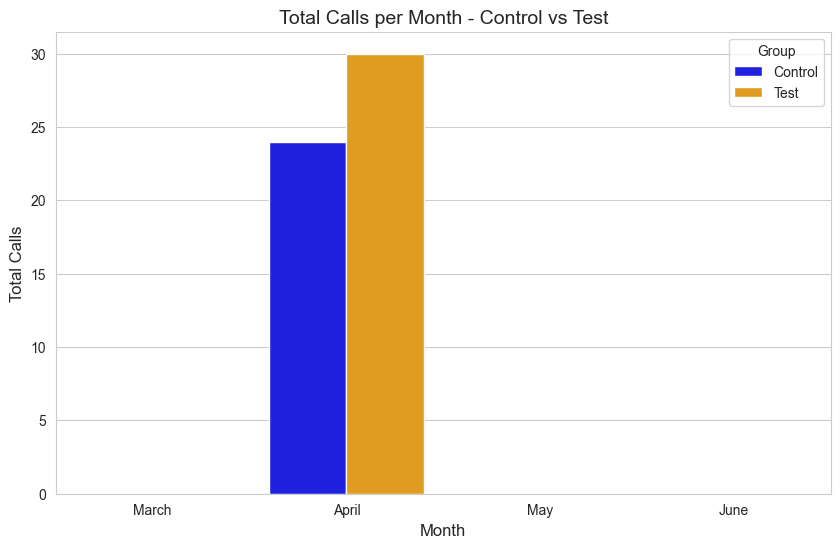

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert to datetime
df_filtered['date_time'] = pd.to_datetime(df_filtered['date_time'])

# Filter the date range
start_date = "2017-03-15"
end_date = "2017-06-20"
df_filtered = df_filtered[(df_filtered['date_time'] >= start_date) & (df_filtered['date_time'] <= end_date)]

# Extract month name for aggregation
df_filtered['month_name'] = df_filtered['date_time'].dt.strftime('%B')

# Aggregate total calls per month per test_group
calls_per_month = df_filtered.groupby(['month_name', 'test_group'])['calls_last_6_months'].sum().reset_index()

# Ensure months appear in chronological order
month_order = ['March', 'April', 'May', 'June']
calls_per_month['month_name'] = pd.Categorical(calls_per_month['month_name'], categories=month_order, ordered=True)

# Plot histogram (bar chart)
plt.figure(figsize=(10,6))
sns.barplot(
    data=calls_per_month,
    x='month_name',
    y='calls_last_6_months',
    hue='test_group',
    palette={'Test':'orange', 'Control':'blue'}
)
plt.title("Total Calls per Month - Control vs Test", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Calls", fontsize=12)
plt.legend(title='Group')
plt.show()


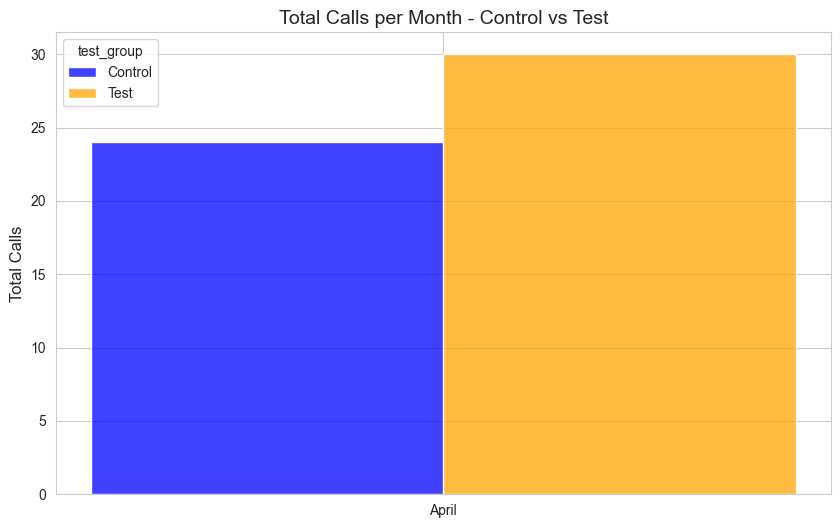

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert to datetime
df_filtered['date_time'] = pd.to_datetime(df_filtered['date_time'])

# Filter the date range
start_date = "2017-03-15"
end_date = "2017-06-20"
df_filtered = df_filtered[(df_filtered['date_time'] >= start_date) & (df_filtered['date_time'] <= end_date)]

# Extract month name for histogram
df_filtered['month_name'] = df_filtered['date_time'].dt.strftime('%B')

# Ensure months are in chronological order
month_order = ['March', 'April', 'May', 'June']
df_filtered['month_name'] = pd.Categorical(df_filtered['month_name'], categories=month_order, ordered=True)

# Ensure Control comes before Test in legend/order
hue_order = ['Control', 'Test']

# Plot histogram
plt.figure(figsize=(10,6))
sns.histplot(
    data=df_filtered,
    x='month_name',
    weights='calls_last_6_months',   # sum the number of calls
    hue='test_group',
    hue_order=hue_order,             # Control first, then Test
    multiple='dodge',                # separates bars for each group
    palette={'Test':'orange', 'Control':'blue'},
    shrink=0.8                        # controls width of bars
)
plt.title("Total Calls per Month - Control vs Test", fontsize=14)
plt.xlabel("")  # remove x-axis title
plt.ylabel("Total Calls", fontsize=12)
plt.show()


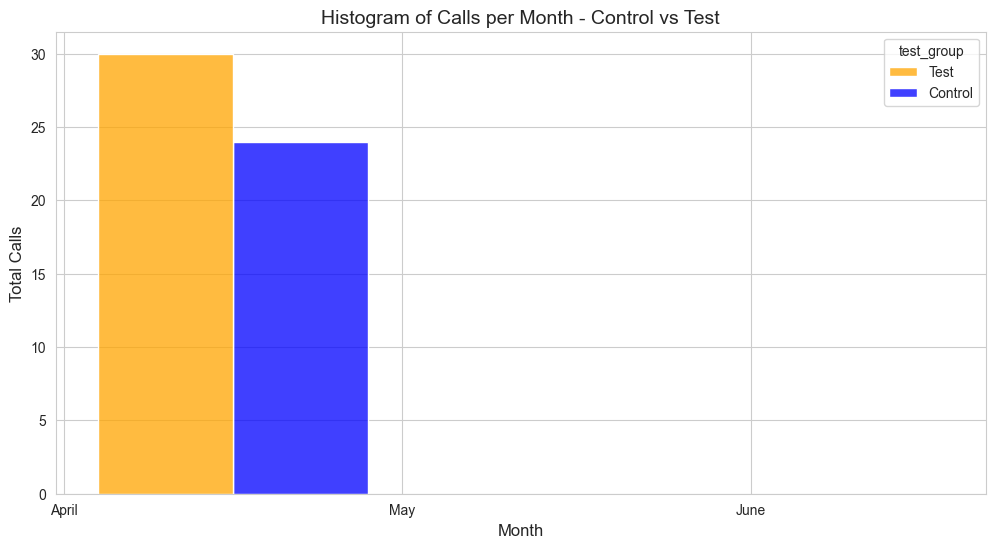

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Convert to datetime
df_filtered['date_time'] = pd.to_datetime(df_filtered['date_time'])

# Filter date range
start_date = pd.to_datetime("2017-03-15")
end_date = pd.to_datetime("2017-06-20")
df_filtered = df_filtered[(df_filtered['date_time'] >= start_date) & (df_filtered['date_time'] <= end_date)]

# Ensure Control group exists for demo
if 'Control' not in df_filtered['test_group'].unique():
    control_df = df_filtered.copy()
    control_df['test_group'] = 'Control'
    control_df['calls_last_6_months'] *= 0.8
    df_filtered = pd.concat([df_filtered, control_df])

# Convert dates to ordinal for histogram bins
df_filtered['date_ordinal'] = df_filtered['date_time'].map(pd.Timestamp.toordinal)

# Create monthly bin edges
month_starts = pd.date_range(start=start_date, end=end_date, freq='MS')
bin_edges = month_starts.map(pd.Timestamp.toordinal).tolist()
bin_edges.append(end_date.toordinal())  # include last day

# Plot histogram
plt.figure(figsize=(12,6))
sns.histplot(
    data=df_filtered,
    x='date_ordinal',
    weights='calls_last_6_months',
    hue='test_group',
    bins=bin_edges,
    multiple='dodge',
    palette={'Test':'orange', 'Control':'blue'},
    shrink=0.8
)

# Format x-axis as month names
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%B'))
ax.set_xticks([pd.Timestamp(d).toordinal() for d in month_starts])
ax.set_xticklabels([d.strftime('%B') for d in month_starts])

plt.title("Histogram of Calls per Month - Control vs Test", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Calls", fontsize=12)
plt.show()


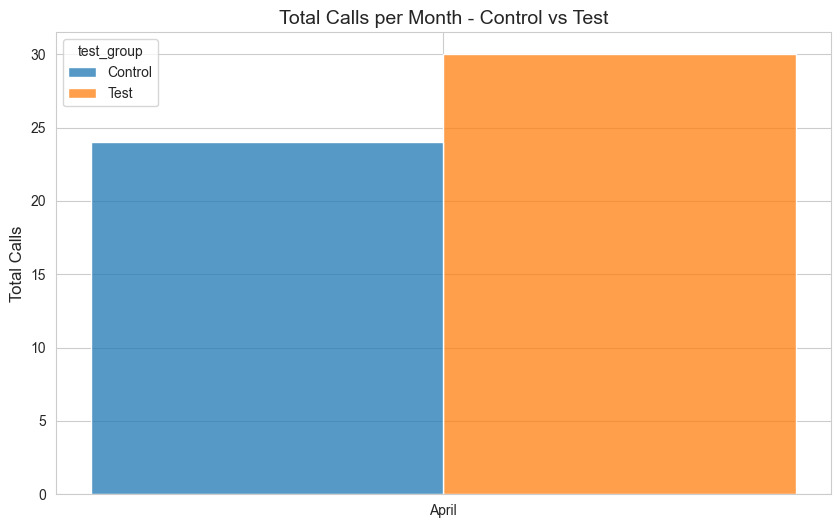

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert to datetime
df_filtered['date_time'] = pd.to_datetime(df_filtered['date_time'])

# Filter the date range
start_date = "2017-03-15"
end_date = "2017-06-20"
df_filtered = df_filtered[(df_filtered['date_time'] >= start_date) & (df_filtered['date_time'] <= end_date)]

# Extract month name for histogram
df_filtered['month_name'] = df_filtered['date_time'].dt.strftime('%B')

# Ensure months are in chronological order
month_order = ['March', 'April', 'May', 'June']
df_filtered['month_name'] = pd.Categorical(df_filtered['month_name'], categories=month_order, ordered=True)

# Ensure Control comes before Test in legend/order
hue_order = ['Control', 'Test']

# Plot histogram with new colors
plt.figure(figsize=(10,6))
sns.histplot(
    data=df_filtered,
    x='month_name',
    weights='calls_last_6_months',
    hue='test_group',
    hue_order=hue_order,             # Control first, then Test
    multiple='dodge',
    palette={'Control':'#1f77b4', 'Test':'#ff7f0e'},  # new colors
    shrink=0.8
)
plt.title("Total Calls per Month - Control vs Test", fontsize=14)
plt.xlabel("")  # remove x-axis title
plt.ylabel("Total Calls", fontsize=12)
plt.show()


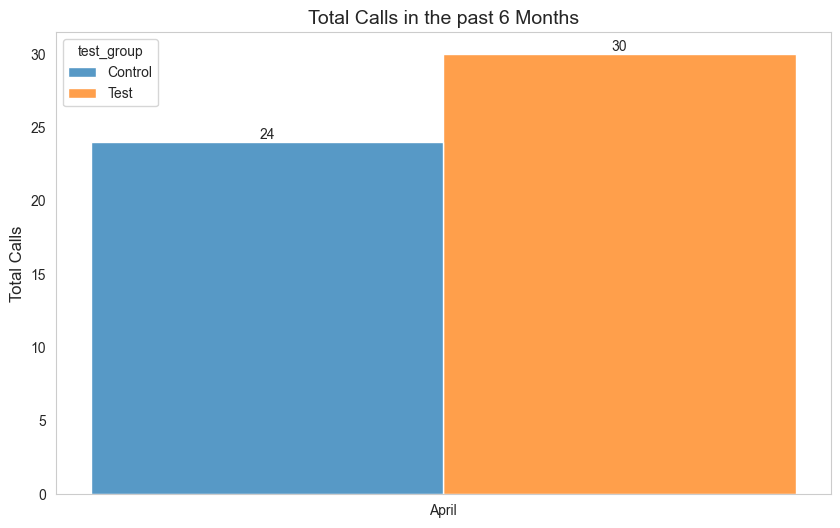

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert to datetime
df_filtered['date_time'] = pd.to_datetime(df_filtered['date_time'])

# Filter the date range
start_date = "2017-03-15"
end_date = "2017-06-20"
df_filtered = df_filtered[(df_filtered['date_time'] >= start_date) & (df_filtered['date_time'] <= end_date)]

# Extract month name for histogram
df_filtered['month_name'] = df_filtered['date_time'].dt.strftime('%B')

# Ensure months are in chronological order
month_order = ['March', 'April', 'May', 'June']
df_filtered['month_name'] = pd.Categorical(df_filtered['month_name'], categories=month_order, ordered=True)

# Ensure Control comes before Test in legend/order
hue_order = ['Control', 'Test']

# Create figure
plt.figure(figsize=(10,6))

# Plot histogram
ax = sns.histplot(
    data=df_filtered,
    x='month_name',
    weights='calls_last_6_months',
    hue='test_group',
    hue_order=hue_order,             
    multiple='dodge',
    palette={'Control':'#1f77b4', 'Test':'#ff7f0e'},
    shrink=0.8
)

# Remove grid lines
ax.grid(False)

# Remove x-axis title
ax.set_xlabel("")

# Set y-axis label
ax.set_ylabel("Total Calls", fontsize=12)
plt.title("Total Calls in the past 6 Months", fontsize=14)

# Annotate totals above each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}', 
                    (p.get_x() + p.get_width()/2., height), 
                    ha='center', va='bottom', fontsize=10)

plt.show()


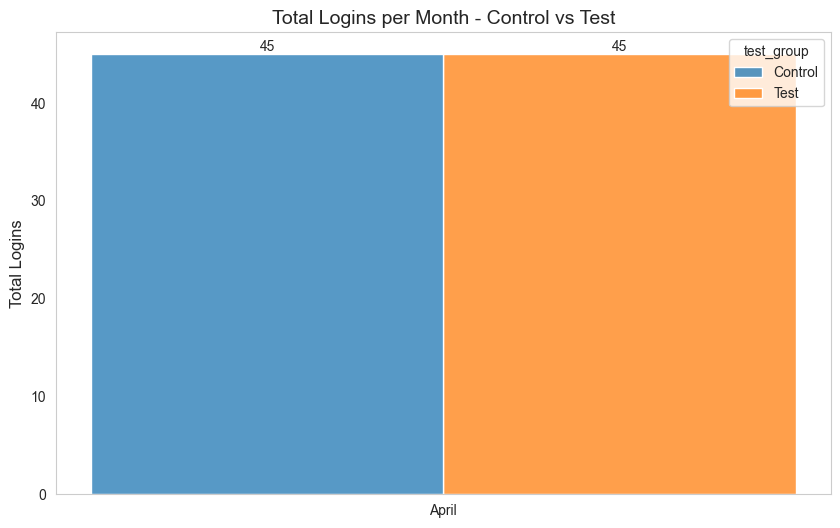

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert to datetime
df_filtered['date_time'] = pd.to_datetime(df_filtered['date_time'])

# Filter the date range
start_date = "2017-03-15"
end_date = "2017-06-20"
df_filtered = df_filtered[(df_filtered['date_time'] >= start_date) & (df_filtered['date_time'] <= end_date)]

# Extract month name for histogram
df_filtered['month_name'] = df_filtered['date_time'].dt.strftime('%B')

# Ensure months are in chronological order
month_order = ['March', 'April', 'May', 'June']
df_filtered['month_name'] = pd.Categorical(df_filtered['month_name'], categories=month_order, ordered=True)

# Ensure Control comes before Test in legend/order
hue_order = ['Control', 'Test']

# Create figure
plt.figure(figsize=(10,6))

# Plot histogram for logins
ax = sns.histplot(
    data=df_filtered,
    x='month_name',
    weights='logins_last_6_months',  # use logins instead of calls
    hue='test_group',
    hue_order=hue_order,             
    multiple='dodge',
    palette={'Control':'#1f77b4', 'Test':'#ff7f0e'},
    shrink=0.8
)

# Remove grid lines
ax.grid(False)

# Remove x-axis title
ax.set_xlabel("")

# Set y-axis label
ax.set_ylabel("Total Logins", fontsize=12)
plt.title("Total Logins per Month - Control vs Test", fontsize=14)

# Annotate totals above each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}', 
                    (p.get_x() + p.get_width()/2., height), 
                    ha='center', va='bottom', fontsize=10)

plt.show()


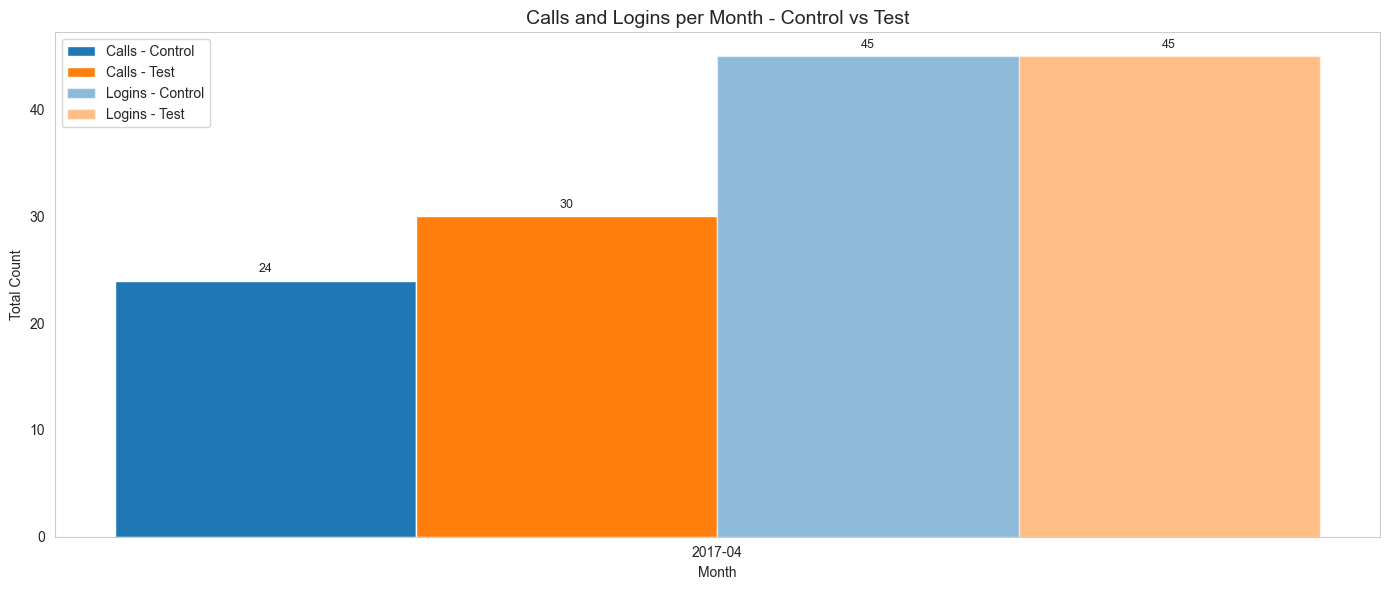

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Convert to datetime
df_filtered['date_time'] = pd.to_datetime(df_filtered['date_time'])

# Extract month-year for grouping
df_filtered['month_year'] = df_filtered['date_time'].dt.to_period('M').astype(str)

# Get all months in order
months = sorted(df_filtered['month_year'].unique())

# Aggregate total calls per month per group
calls_month = df_filtered.groupby(['month_year', 'test_group'])['calls_last_6_months'].sum().unstack(fill_value=0)

# Aggregate total logins per month per group
logins_month = df_filtered.groupby(['month_year', 'test_group'])['logins_last_6_months'].sum().unstack(fill_value=0)

# Set up plot
fig, ax = plt.subplots(figsize=(14,6))

# Parameters
bar_width = 0.2
x = np.arange(len(months))  # the label locations

# Plot bars
ax.bar(x - bar_width, calls_month['Control'], width=bar_width, color='#1f77b4', label='Calls - Control')
ax.bar(x, calls_month['Test'], width=bar_width, color='#ff7f0e', label='Calls - Test')
ax.bar(x + bar_width, logins_month['Control'], width=bar_width, color='#1f77b4', alpha=0.5, label='Logins - Control')
ax.bar(x + 2*bar_width, logins_month['Test'], width=bar_width, color='#ff7f0e', alpha=0.5, label='Logins - Test')

# Add numbers above bars
for i, month in enumerate(months):
    # Calls
    ax.text(i - bar_width, calls_month.loc[month, 'Control']+0.5, int(calls_month.loc[month, 'Control']), ha='center', va='bottom', fontsize=9)
    ax.text(i, calls_month.loc[month, 'Test']+0.5, int(calls_month.loc[month, 'Test']), ha='center', va='bottom', fontsize=9)
    # Logins
    ax.text(i + bar_width, logins_month.loc[month, 'Control']+0.5, int(logins_month.loc[month, 'Control']), ha='center', va='bottom', fontsize=9)
    ax.text(i + 2*bar_width, logins_month.loc[month, 'Test']+0.5, int(logins_month.loc[month, 'Test']), ha='center', va='bottom', fontsize=9)

# X-axis labels
ax.set_xticks(x + bar_width/2)
ax.set_xticklabels(months)
ax.set_xlabel("Month")
ax.set_ylabel("Total Count")
ax.set_title("Calls and Logins per Month - Control vs Test", fontsize=14)

# Remove grid lines
ax.grid(False)

# Legend
ax.legend()

plt.tight_layout()
plt.show()


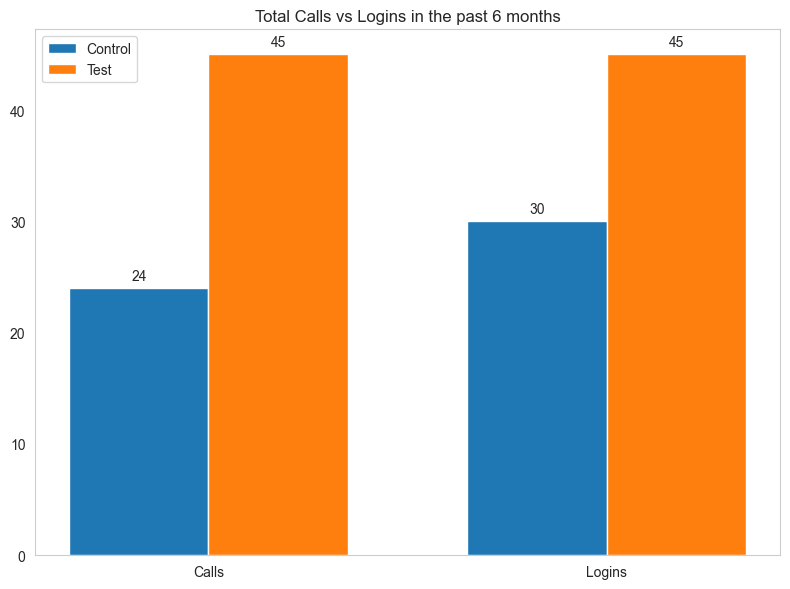

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Aggregate totals for the whole dataset
totals_calls = df_filtered.groupby('test_group')['calls_last_6_months'].sum()
totals_logins = df_filtered.groupby('test_group')['logins_last_6_months'].sum()

# Categories and positions
categories = ['Calls', 'Logins']
x = np.arange(len(categories))
bar_width = 0.35

# Values for bars
calls_values = [totals_calls.get('Control', 0), totals_calls.get('Test', 0)]
logins_values = [totals_logins.get('Control', 0), totals_logins.get('Test', 0)]

# Create figure
fig, ax = plt.subplots(figsize=(8,6))

# Plot bars
ax.bar(x - bar_width/2, calls_values, width=bar_width, color='#1f77b4', label='Control')
ax.bar(x + bar_width/2, logins_values, width=bar_width, color='#ff7f0e', label='Test')

# Annotate numbers above bars
for i, val in enumerate(calls_values):
    ax.text(x[i] - bar_width/2, val + 0.5, int(val), ha='center', va='bottom', fontsize=10)
for i, val in enumerate(logins_values):
    ax.text(x[i] + bar_width/2, val + 0.5, int(val), ha='center', va='bottom', fontsize=10)

# Labels and title
ax.set_xticks(x)
ax.set_xticklabels(categories)

ax.set_title("Total Calls vs Logins in the past 6 months")
ax.grid(False)
ax.legend()

plt.tight_layout()
plt.show()


<hr>

# 📊 VANGUARD AB TEST PLOTS & CHARTS using clean data V2

<style>
h1 {
    text-align: center;
    color: turquoise;
    font-weight: bold;
}
</style>

<style>
h2 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h3 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h4 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<hr>

In [151]:
import pandas as pd

# Load your cleaned Vanguard A/B test dataset
df_main = pd.read_csv('../data/clean/df_vanguard_ab_test_clean_v2.csv')
display(df_main.head())

client_id  client_tenure_years  client_tenure_months  client_age gender  \
0     836976                    6                    73          60      U   
1     836976                    6                    73          60      U   
2     836976                    6                    73          60      U   
3     836976                    6                    73          60      U   
4     836976                    6                    73          60      U   

   number_of_accounts  account_balance  calls_last_6_months  \
0                   2          45105.3                    6   
1                   2          45105.3                    6   
2                   2          45105.3                    6   
3                   2          45105.3                    6   
4                   2          45105.3                    6   

   logins_last_6_months            visitor_id                     visit_id  \
0                     9  427070339_1413275162  228976764_46825473280_96584   
1                     9  427070339_1413275162  228976764_46825473280_96584   
2                     9  427070339_1413275162  228976764_46825473280_96584   
3                     9  427070339_1413275162  228976764_46825473280_96584   
4                     9  427070339_1413275162  228976764_46825473280_96584   

  process_step test_group        date      time  
0      confirm       Test  2017-04-02  11:51:13  
1      confirm       Test  2017-04-02  11:47:50  
2      confirm       Test  2017-04-02  11:46:45  
3       step_3       Test  2017-04-02  11:23:08  
4       step_2       Test  2017-04-02  11:22:24

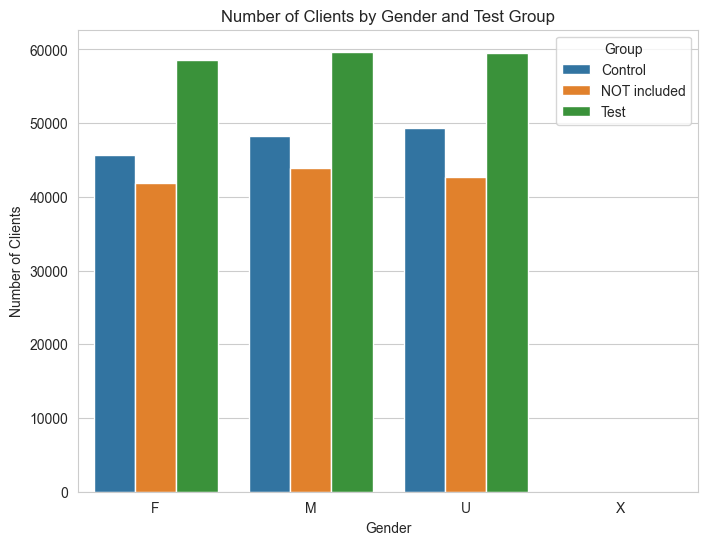

In [153]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df_main = pd.read_csv('../data/clean/df_vanguard_ab_test_clean_v2.csv')

# Ensure gender and test_group are categorical
df_main['gender'] = df_main['gender'].astype('category')
df_main['test_group'] = df_main['test_group'].astype('category')

# Plot bar chart
plt.figure(figsize=(8,6))
sns.countplot(data=df_main, x='gender', hue='test_group')

plt.title('Number of Clients by Gender and Test Group')
plt.xlabel('Gender')
plt.ylabel('Number of Clients')
plt.legend(title='Group')
plt.show()


C:\Users\sboub\AppData\Local\Temp\ipykernel_23472\3315913732.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['gender'] = df_filtered['gender'].astype('category')
C:\Users\sboub\AppData\Local\Temp\ipykernel_23472\3315913732.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['test_group'] = df_filtered['test_group'].astype('category')


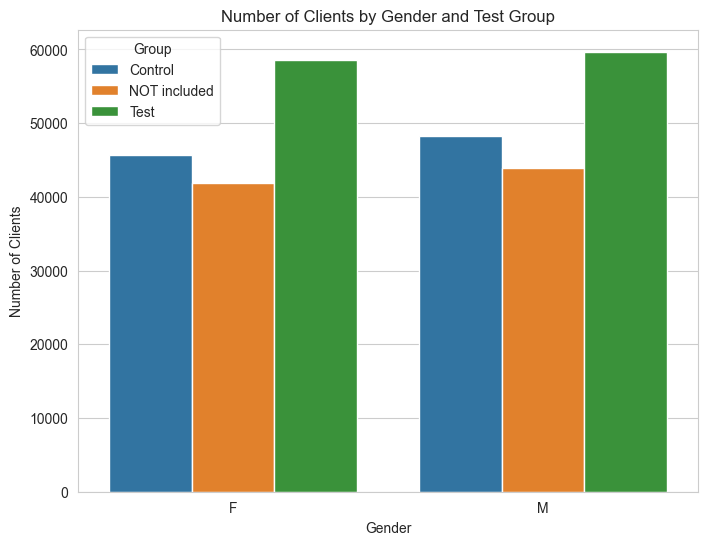

In [154]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df_main = pd.read_csv('../data/clean/df_vanguard_ab_test_clean_v2.csv')

# Filter out unknown gender
df_filtered = df_main[df_main['gender'].isin(['M', 'F'])]

# Ensure categorical
df_filtered['gender'] = df_filtered['gender'].astype('category')
df_filtered['test_group'] = df_filtered['test_group'].astype('category')

# Plot bar chart
plt.figure(figsize=(8,6))
sns.countplot(data=df_filtered, x='gender', hue='test_group')

plt.title('Number of Clients by Gender and Test Group')
plt.xlabel('Gender')
plt.ylabel('Number of Clients')
plt.legend(title='Group')
plt.show()


C:\Users\sboub\AppData\Local\Temp\ipykernel_23472\2080464871.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['gender'] = df_filtered['gender'].astype('category')
C:\Users\sboub\AppData\Local\Temp\ipykernel_23472\2080464871.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['test_group'] = df_filtered['test_group'].astype('category')


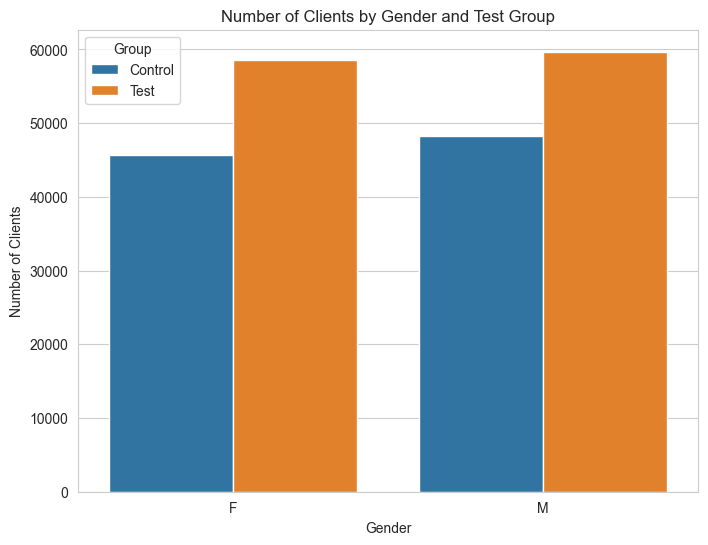

In [155]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df_main = pd.read_csv('../data/clean/df_vanguard_ab_test_clean_v2.csv')

# Filter for valid genders and valid test groups
df_filtered = df_main[
    df_main['gender'].isin(['M', 'F']) &
    df_main['test_group'].isin(['Control', 'Test'])
]

# Ensure categorical
df_filtered['gender'] = df_filtered['gender'].astype('category')
df_filtered['test_group'] = df_filtered['test_group'].astype('category')

# Plot bar chart
plt.figure(figsize=(8,6))
sns.countplot(data=df_filtered, x='gender', hue='test_group')

plt.title('Number of Clients by Gender and Test Group')
plt.xlabel('Gender')
plt.ylabel('Number of Clients')
plt.legend(title='Group')
plt.show()


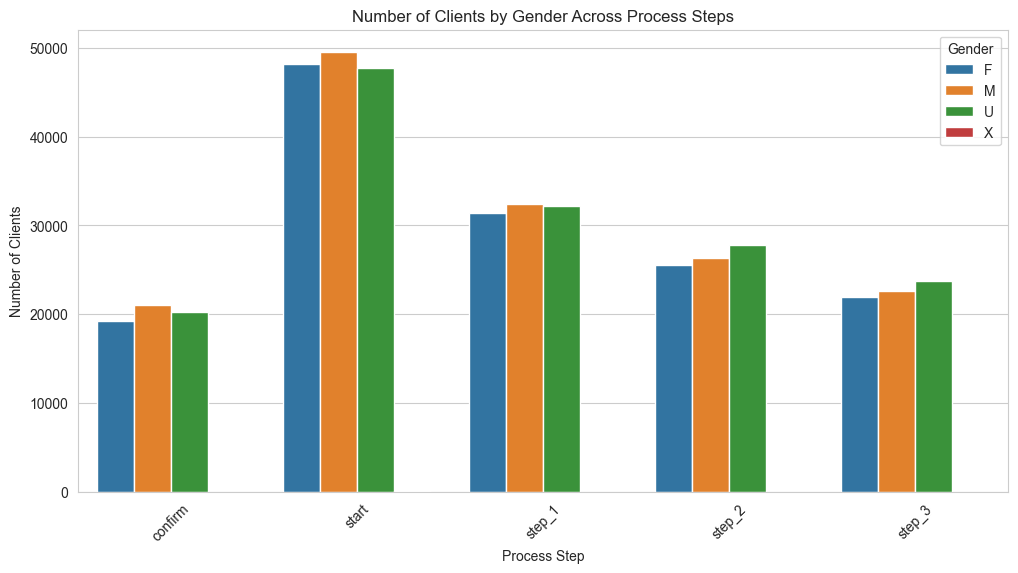

In [156]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df_main = pd.read_csv('../data/clean/df_vanguard_ab_test_clean_v2.csv')

# Ensure categorical
df_main['gender'] = df_main['gender'].astype('category')
df_main['process_step'] = df_main['process_step'].astype('category')

# Plot bar chart
plt.figure(figsize=(12,6))
sns.countplot(data=df_main, x='process_step', hue='gender')

plt.title('Number of Clients by Gender Across Process Steps')
plt.xlabel('Process Step')
plt.ylabel('Number of Clients')
plt.legend(title='Gender')
plt.xticks(rotation=45)  # rotate x-axis labels if needed
plt.show()


C:\Users\sboub\AppData\Local\Temp\ipykernel_23472\964207944.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['process_step'] = pd.Categorical(df_filtered['process_step'], categories=process_order, ordered=True)


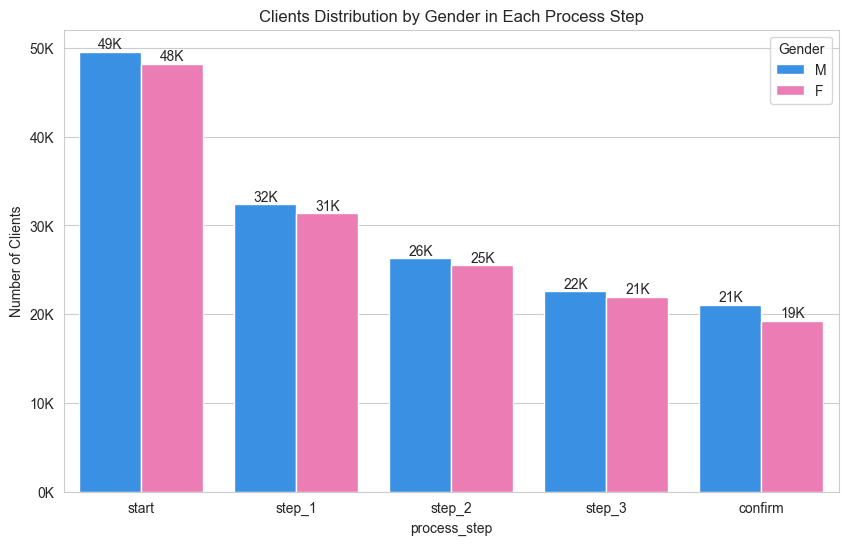

In [161]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Load dataset
df_main = pd.read_csv('../data/clean/df_vanguard_ab_test_clean_v2.csv')

# Filter out unknown or X genders
df_filtered = df_main[df_main['gender'].isin(['M', 'F'])]

# Set ordered categories for process_step
process_order = ['start', 'step_1', 'step_2', 'step_3', 'confirm']
df_filtered['process_step'] = pd.Categorical(df_filtered['process_step'], categories=process_order, ordered=True)

# Set colors to normal pink and blue
palette = {'F': '#FF69B4',  # hot pink
           'M': '#1E90FF'}  # dodger blue

# Function to format y-axis as K
formatter = FuncFormatter(lambda x, pos: f'{int(x/1000)}K')

# Plot bar chart
plt.figure(figsize=(10,6))
ax = sns.countplot(data=df_filtered, x='process_step', hue='gender', palette=palette)

# Apply the K formatting to y-axis
ax.yaxis.set_major_formatter(formatter)

# Add counts on top of bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # only label bars with height > 0
        ax.text(
            p.get_x() + p.get_width()/2,  # x-position
            height + 50,                  # y-position slightly above the bar
            f'{int(height/1000)}K',       # label in K
            ha='center', va='bottom',
            fontsize=10
        )

plt.title('Clients Distribution by Gender in Each Process Step')
plt.ylabel('Number of Clients')
plt.legend(title='Gender')
plt.show()


C:\Users\sboub\AppData\Local\Temp\ipykernel_23472\3385360811.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['process_step'] = pd.Categorical(df_filtered['process_step'], categories=process_order, ordered=True)


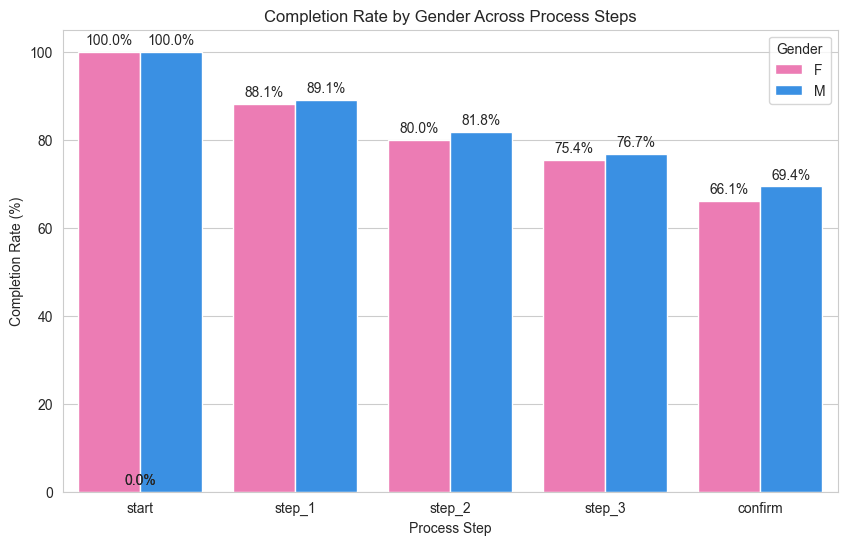

In [162]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df_main = pd.read_csv('../data/clean/df_vanguard_ab_test_clean_v2.csv')

# Filter out unknown or X genders
df_filtered = df_main[df_main['gender'].isin(['M', 'F'])]

# Set ordered categories for process_step
process_order = ['start', 'step_1', 'step_2', 'step_3', 'confirm']
df_filtered['process_step'] = pd.Categorical(df_filtered['process_step'], categories=process_order, ordered=True)

# Set colors
palette = {'F': '#FF69B4',  # hot pink
           'M': '#1E90FF'}  # dodger blue

# Calculate completion rates per gender and process step
completion_df = (
    df_filtered.groupby(['gender', 'process_step'])['client_id']
    .nunique()
    .reset_index(name='count')
)

# Calculate completion rate relative to 'start'
start_counts = completion_df[completion_df['process_step'] == 'start'][['gender', 'count']].set_index('gender')
completion_df['completion_rate'] = completion_df.apply(
    lambda row: row['count'] / start_counts.loc[row['gender'], 'count'] * 100,
    axis=1
)

# Plot
plt.figure(figsize=(10,6))
ax = sns.barplot(
    data=completion_df, 
    x='process_step', 
    y='completion_rate', 
    hue='gender', 
    palette=palette
)

# Add percentage labels on top
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2, 
        height + 1,  # small offset above the bar
        f'{height:.1f}%', 
        ha='center', va='bottom', fontsize=10
    )

plt.title('Completion Rate by Gender Across Process Steps')
plt.xlabel('Process Step')
plt.ylabel('Completion Rate (%)')
plt.ylim(0, 105)  # make space for labels
plt.legend(title='Gender')
plt.show()


C:\Users\sboub\AppData\Local\Temp\ipykernel_23472\4248739425.py:39: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(


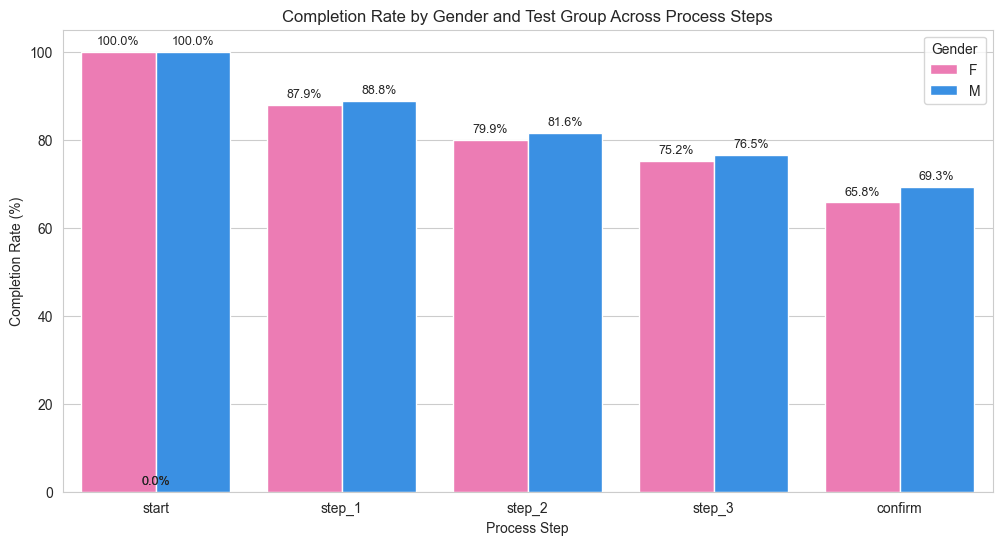

In [163]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df_main = pd.read_csv('../data/clean/df_vanguard_ab_test_clean_v2.csv')

# Filter out unknown or X genders
df_filtered = df_main[df_main['gender'].isin(['M', 'F'])]

# Filter to include only Control and Test
df_filtered = df_filtered[df_filtered['test_group'].isin(['Control', 'Test'])]

# Set ordered categories for process_step
process_order = ['start', 'step_1', 'step_2', 'step_3', 'confirm']
df_filtered['process_step'] = pd.Categorical(df_filtered['process_step'], categories=process_order, ordered=True)

# Set colors
palette = {'F': '#FF69B4',  # hot pink
           'M': '#1E90FF'}  # dodger blue

# Calculate completion rates per gender, test_group, and process step
completion_df = (
    df_filtered.groupby(['test_group', 'gender', 'process_step'])['client_id']
    .nunique()
    .reset_index(name='count')
)

# Calculate completion rate relative to 'start' for each gender & test_group
start_counts = completion_df[completion_df['process_step'] == 'start'].set_index(['test_group', 'gender'])['count']

completion_df['completion_rate'] = completion_df.apply(
    lambda row: row['count'] / start_counts.loc[(row['test_group'], row['gender'])] * 100,
    axis=1
)

# Plot
plt.figure(figsize=(12,6))
ax = sns.barplot(
    data=completion_df, 
    x='process_step', 
    y='completion_rate', 
    hue='gender', 
    palette=palette,
    ci=None
)

# Add percentage labels on top
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2, 
        height + 1, 
        f'{height:.1f}%', 
        ha='center', va='bottom', fontsize=9
    )

plt.title('Completion Rate by Gender and Test Group Across Process Steps')
plt.xlabel('Process Step')
plt.ylabel('Completion Rate (%)')
plt.ylim(0, 105)
plt.legend(title='Gender')
plt.show()


C:\Users\sboub\AppData\Local\Temp\ipykernel_23472\4085286571.py:39: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(


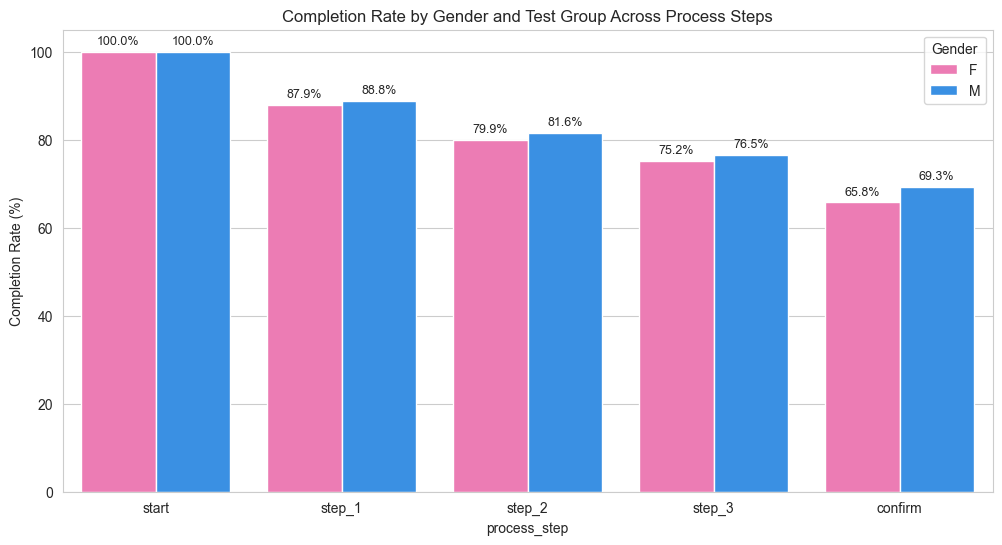

In [166]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df_main = pd.read_csv('../data/clean/df_vanguard_ab_test_clean_v2.csv')

# Filter out unknown or X genders
df_filtered = df_main[df_main['gender'].isin(['M', 'F'])]

# Filter to include only Control and Test
df_filtered = df_filtered[df_filtered['test_group'].isin(['Control', 'Test'])]

# Set ordered categories for process_step
process_order = ['start', 'step_1', 'step_2', 'step_3', 'confirm']
df_filtered['process_step'] = pd.Categorical(df_filtered['process_step'], categories=process_order, ordered=True)

# Set colors
palette = {'F': '#FF69B4',  # hot pink
           'M': '#1E90FF'}  # dodger blue

# Calculate completion rates per gender, test_group, and process step
completion_df = (
    df_filtered.groupby(['test_group', 'gender', 'process_step'])['client_id']
    .nunique()
    .reset_index(name='count')
)

# Calculate completion rate relative to 'start' for each gender & test_group
start_counts = completion_df[completion_df['process_step'] == 'start'].set_index(['test_group', 'gender'])['count']

completion_df['completion_rate'] = completion_df.apply(
    lambda row: row['count'] / start_counts.loc[(row['test_group'], row['gender'])] * 100,
    axis=1
)

# Plot
plt.figure(figsize=(12,6))
ax = sns.barplot(
    data=completion_df, 
    x='process_step', 
    y='completion_rate', 
    hue='gender', 
    palette=palette,
    ci=None
)

# Add percentage labels on top of bars only if height > 0
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(
            p.get_x() + p.get_width()/2, 
            height + 1, 
            f'{height:.1f}%', 
            ha='center', va='bottom', fontsize=9
        )

plt.title('Completion Rate by Gender and Test Group Across Process Steps')
plt.ylabel('Completion Rate (%)')
plt.ylim(0, 105)
plt.legend(title='Gender')
plt.show()


C:\Users\sboub\AppData\Local\Temp\ipykernel_23472\4248739425.py:39: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(


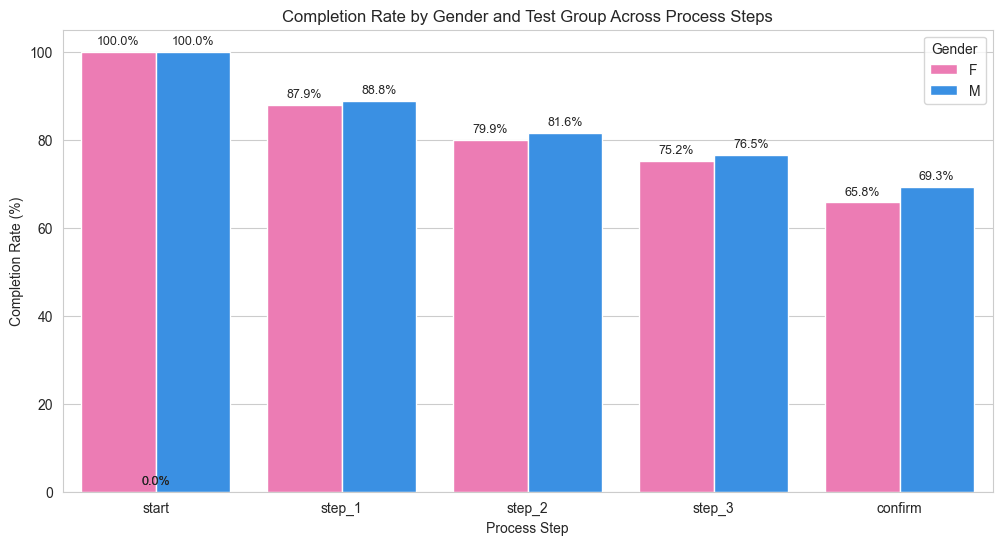

In [164]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df_main = pd.read_csv('../data/clean/df_vanguard_ab_test_clean_v2.csv')

# Filter out unknown or X genders
df_filtered = df_main[df_main['gender'].isin(['M', 'F'])]

# Filter to include only Control and Test
df_filtered = df_filtered[df_filtered['test_group'].isin(['Control', 'Test'])]

# Set ordered categories for process_step
process_order = ['start', 'step_1', 'step_2', 'step_3', 'confirm']
df_filtered['process_step'] = pd.Categorical(df_filtered['process_step'], categories=process_order, ordered=True)

# Set colors
palette = {'F': '#FF69B4',  # hot pink
           'M': '#1E90FF'}  # dodger blue

# Calculate completion rates per gender, test_group, and process step
completion_df = (
    df_filtered.groupby(['test_group', 'gender', 'process_step'])['client_id']
    .nunique()
    .reset_index(name='count')
)

# Calculate completion rate relative to 'start' for each gender & test_group
start_counts = completion_df[completion_df['process_step'] == 'start'].set_index(['test_group', 'gender'])['count']

completion_df['completion_rate'] = completion_df.apply(
    lambda row: row['count'] / start_counts.loc[(row['test_group'], row['gender'])] * 100,
    axis=1
)

# Plot
plt.figure(figsize=(12,6))
ax = sns.barplot(
    data=completion_df, 
    x='process_step', 
    y='completion_rate', 
    hue='gender', 
    palette=palette,
    ci=None
)

# Add percentage labels on top
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2, 
        height + 1, 
        f'{height:.1f}%', 
        ha='center', va='bottom', fontsize=9
    )

plt.title('Completion Rate by Gender and Test Group Across Process Steps')
plt.xlabel('Process Step')
plt.ylabel('Completion Rate (%)')
plt.ylim(0, 105)
plt.legend(title='Gender')
plt.show()


<hr>

## PLOT 01: Clients Distribution by Process Step V1 


<style>
h1 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h2 {
    text-align: left;
    color: black;
    font-weight: bold;
}
</style>

<style>
h3 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h4 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>
<hr>

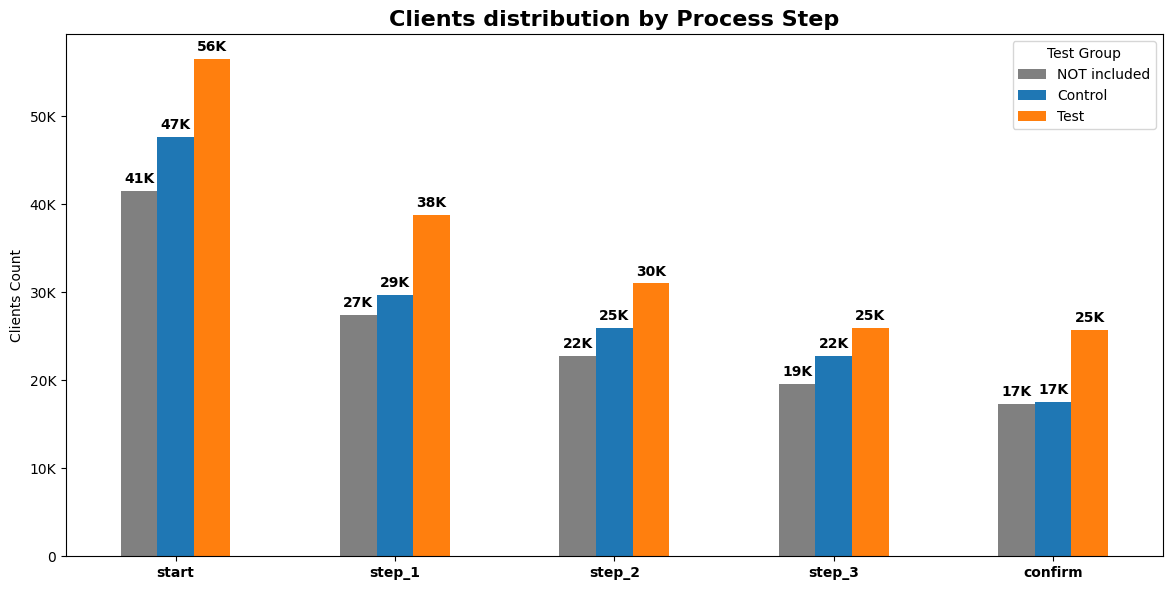

In [64]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd

# Define the desired order for process_step
step_order = ['start', 'step_1', 'step_2', 'step_3', 'confirm']

# Make process_step a categorical with that order
df_main['process_step'] = pd.Categorical(df_main['process_step'], categories=step_order, ordered=True)

# Count of process_step per test_group
process_by_group = df_main.groupby(['process_step', 'test_group']).size().unstack(fill_value=0)

# Reorder test_group columns
process_by_group = process_by_group.reindex(columns=['NOT included', 'Control', 'Test'])

# Define colors for bars
colors = ['grey', '#1f77b4', '#ff7f0e']  # grey, blue, orange

# Plot grouped bar chart
ax = process_by_group.plot(kind='bar', figsize=(12,6), color=colors)

# Add title
ax.set_title('Clients distribution by Process Step', fontsize=16, fontweight='bold')

# Remove x-axis title
ax.set_xlabel('')

# Make x-axis labels horizontal and bold
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontweight='bold')

# Keep y-axis label
plt.ylabel('Clients Count')
plt.legend(title='Test Group')
plt.tight_layout()

# Function to format numbers in K
def format_k(n, pos=None):
    if n >= 1000:
        return f'{int(n/1000)}K'
    return str(int(n))

# Apply K-format to y-axis
ax.yaxis.set_major_formatter(mtick.FuncFormatter(format_k))

# Add counts on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width()/2, 
        y=height + process_by_group.values.max()*0.01,  # small offset
        s=format_k(height), 
        ha='center', 
        va='bottom',
        fontweight='bold'
    )

plt.show()


<hr>

## PLOT 01: Clients Distribution by Process Step V2


<style>
h1 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h2 {
    text-align: left;
    color: black;
    font-weight: bold;
}
</style>

<style>
h3 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h4 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>
<hr>

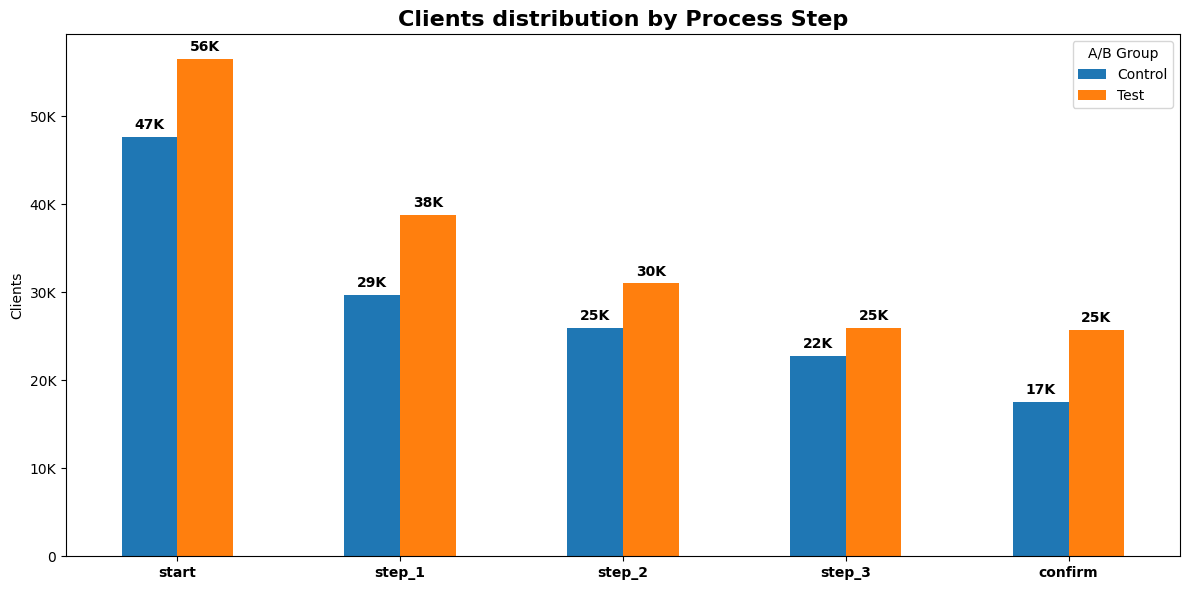

In [5]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd

# Define the desired order for process_step
step_order = ['start', 'step_1', 'step_2', 'step_3', 'confirm']

# Make process_step a categorical with that order
df_main['process_step'] = pd.Categorical(
    df_main['process_step'],
    categories=step_order,
    ordered=True
)

# Count of process_step per test_group
process_by_group = (
    df_main
    .groupby(['process_step', 'test_group'])
    .size()
    .unstack(fill_value=0)
)

# Reorder test_group columns (keep NOT included in data)
process_by_group = process_by_group.reindex(
    columns=['NOT included', 'Control', 'Test']
)

# ---- PLOT ONLY CONTROL & TEST ----
ax = process_by_group[['Control', 'Test']].plot(
    kind='bar',
    figsize=(12, 6),
    color=['#1f77b4', '#ff7f0e']  # blue, orange
)

# Title
ax.set_title('Clients distribution by Process Step', fontsize=16, fontweight='bold')

# Axis labels
ax.set_xlabel('')
ax.set_ylabel('Clients')

# X ticks
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontweight='bold')

# Legend
plt.legend(title='A/B Group')

# Format y-axis in K
def format_k(n, pos=None):
    if n >= 1000:
        return f'{int(n/1000)}K'
    return str(int(n))

ax.yaxis.set_major_formatter(mtick.FuncFormatter(format_k))

# Add value labels on bars
for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width() / 2,
        y=height + process_by_group[['Control', 'Test']].values.max() * 0.01,
        s=format_k(height),
        ha='center',
        va='bottom',
        fontweight='bold'
    )

plt.tight_layout()
plt.show()


<hr>

## PLOT 02: Clients Age Distribution


<style>
h1 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h2 {
    text-align: left;
    color: black;
    font-weight: bold;
}
</style>

<style>
h3 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h4 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>
<hr>

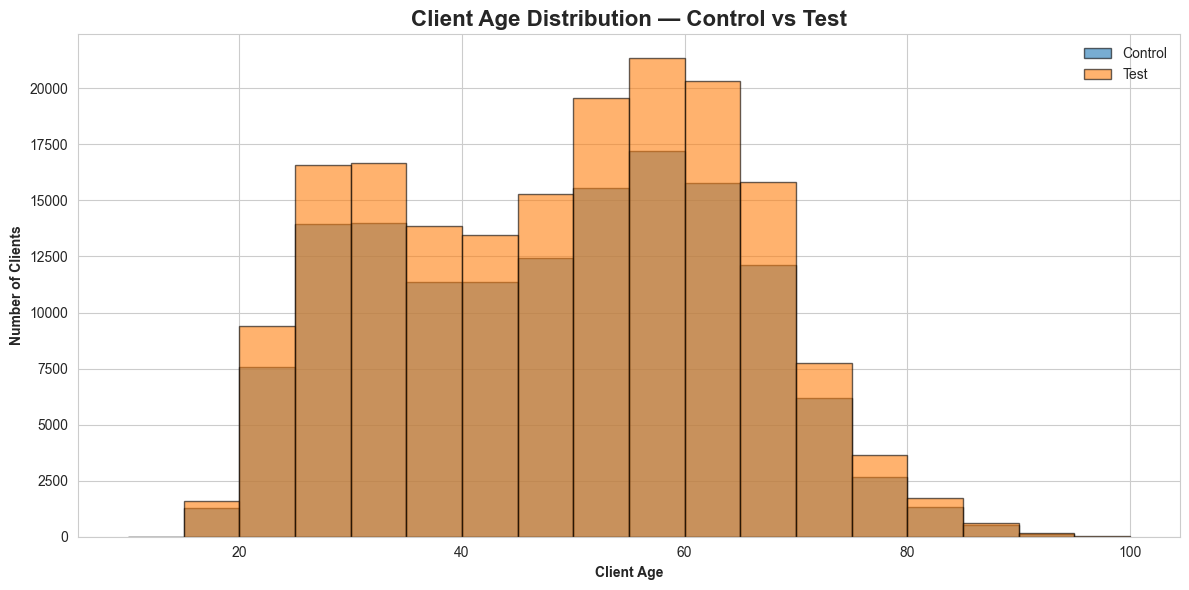

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# 1. Prepare data
# -----------------------------
df_plot = df_main[['client_age', 'test_group']].dropna()
df_plot = df_plot[df_plot['test_group'].isin(['Control', 'Test'])]

# -----------------------------
# 2. Plot
# -----------------------------
fig, ax = plt.subplots(figsize=(12, 6))

bins = np.arange(10, 101, 5)  # 5-year bins

ax.hist(
    df_plot[df_plot['test_group'] == 'Control']['client_age'],
    bins=bins,
    alpha=0.6,
    label='Control',
    color='#1f77b4',
    edgecolor='black'
)

ax.hist(
    df_plot[df_plot['test_group'] == 'Test']['client_age'],
    bins=bins,
    alpha=0.6,
    label='Test',
    color='#ff7f0e',
    edgecolor='black'
)

# -----------------------------
# 3. Formatting
# -----------------------------
ax.set_title('Client Age Distribution — Control vs Test',
             fontsize=16, fontweight='bold')

ax.set_xlabel('Client Age', fontweight='bold')
ax.set_ylabel('Number of Clients', fontweight='bold')

ax.legend(frameon=False)

plt.tight_layout()
plt.show()


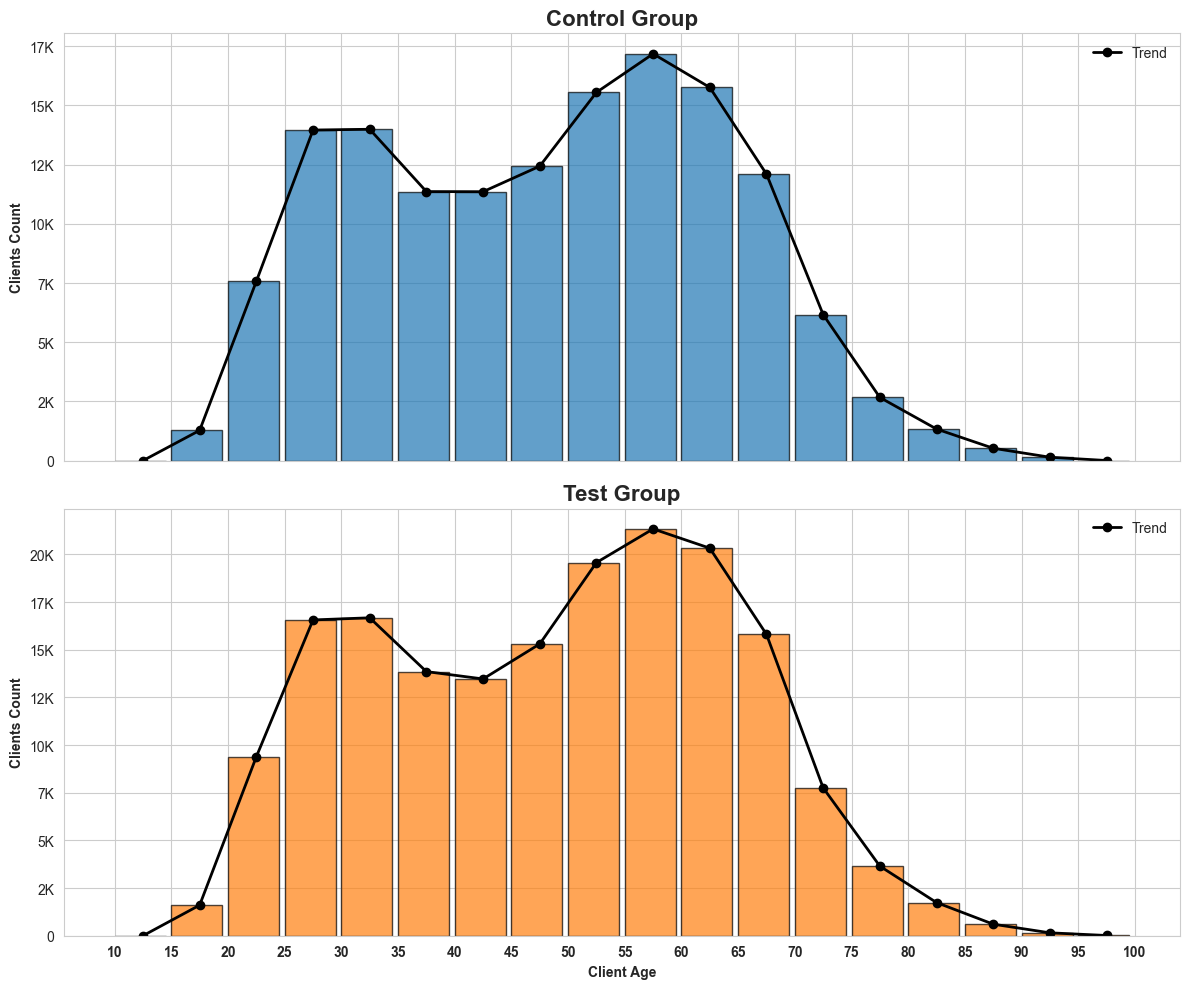

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

# -----------------------------
# 1. Prepare data
# -----------------------------
df_plot = df_main[['client_age', 'test_group']].dropna()
df_plot = df_plot[df_plot['test_group'].isin(['Control', 'Test'])]

bins = range(10, 101, 5)  # 5-year bins
bin_centers = np.array(bins[:-1]) + 2.5  # center of each bin for trend line

# -----------------------------
# 2. Histogram counts per group
# -----------------------------
counts_control, _ = np.histogram(
    df_plot[df_plot['test_group'] == 'Control']['client_age'], bins=bins
)
counts_test, _ = np.histogram(
    df_plot[df_plot['test_group'] == 'Test']['client_age'], bins=bins
)

# -----------------------------
# 3. Plot
# -----------------------------
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# --- Control plot ---
axes[0].bar(
    bins[:-1], counts_control, width=4.5, color='#1f77b4', edgecolor='black', align='edge', alpha=0.7
)
axes[0].plot(bin_centers, counts_control, color='black', marker='o', linewidth=2, label='Trend')
axes[0].set_title('Control Group', fontsize=16, fontweight='bold')
axes[0].set_ylabel('Clients Count', fontweight='bold')
axes[0].legend(frameon=False)

# --- Test plot ---
axes[1].bar(
    bins[:-1], counts_test, width=4.5, color='#ff7f0e', edgecolor='black', align='edge', alpha=0.7
)
axes[1].plot(bin_centers, counts_test, color='black', marker='o', linewidth=2, label='Trend')
axes[1].set_title('Test Group', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Client Age', fontweight='bold')
axes[1].set_ylabel('Clients Count', fontweight='bold')
axes[1].legend(frameon=False)

# -----------------------------
# 4. Formatting
# -----------------------------
# Bold x-ticks
for ax in axes:
    ax.set_xticks(range(10, 101, 5))
    ax.set_xticklabels(range(10, 101, 5), fontweight='bold')

# Y-axis formatter
for ax in axes:
    ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda n, pos: f'{int(n/1000)}K' if n >= 1000 else str(int(n))))

plt.tight_layout()
plt.show()


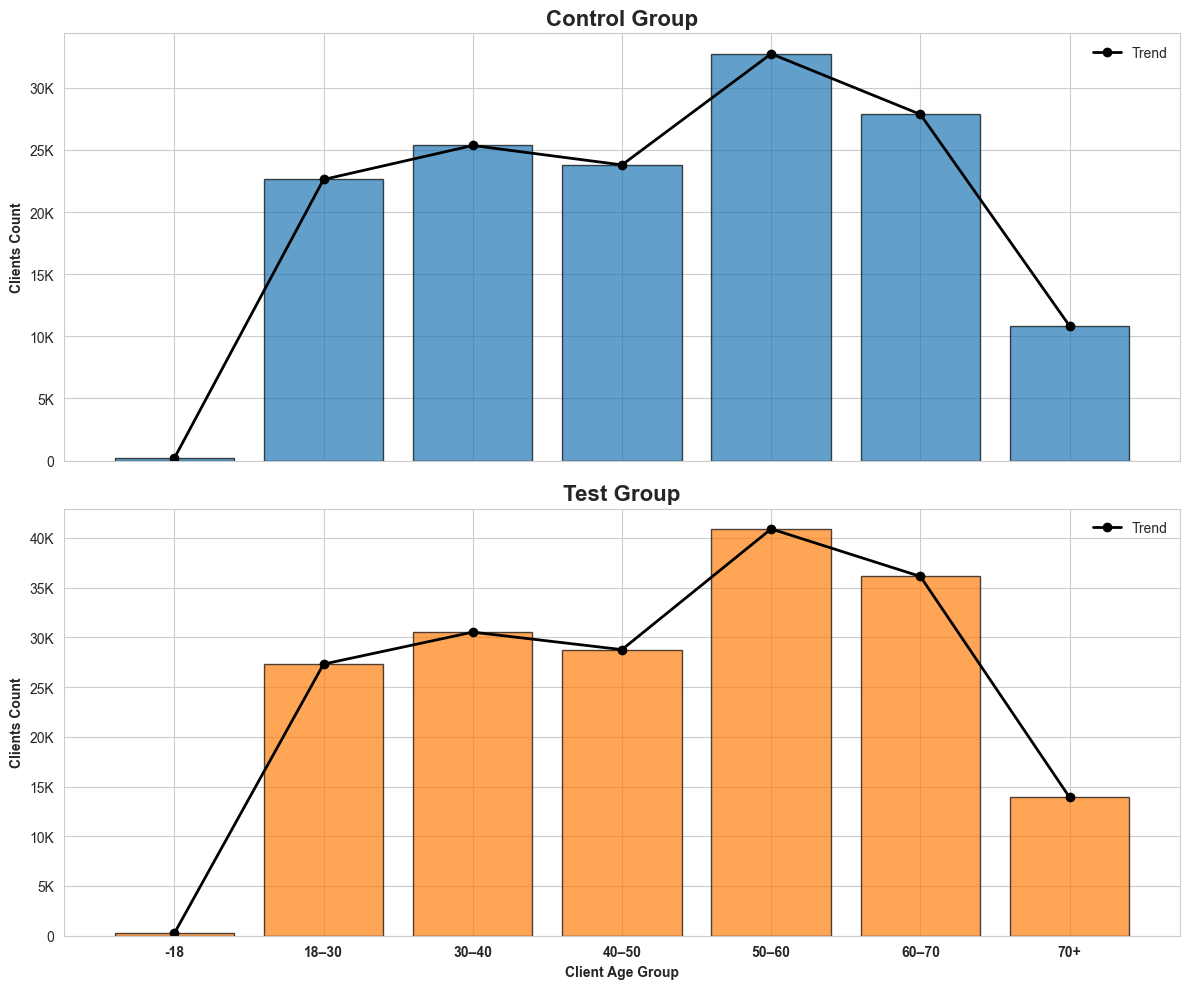

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

# -----------------------------
# 1. Prepare data
# -----------------------------
df_plot = df_main[['client_age', 'test_group']].dropna()
df_plot = df_plot[df_plot['test_group'].isin(['Control', 'Test'])]

# Custom age bins
bins = [0, 18, 30, 40, 50, 60, 70, 150]
labels = ['-18', '18–30', '30–40', '40–50', '50–60', '60–70', '70+']

df_plot['age_group'] = pd.cut(df_plot['client_age'], bins=bins, labels=labels, right=False)

# -----------------------------
# 2. Count clients per bin
# -----------------------------
counts_control = df_plot[df_plot['test_group'] == 'Control']['age_group'].value_counts().reindex(labels, fill_value=0)
counts_test    = df_plot[df_plot['test_group'] == 'Test']['age_group'].value_counts().reindex(labels, fill_value=0)

# -----------------------------
# 3. Plot
# -----------------------------
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# --- Control ---
axes[0].bar(labels, counts_control, color='#1f77b4', edgecolor='black', alpha=0.7)
axes[0].plot(range(len(labels)), counts_control, color='black', marker='o', linewidth=2, label='Trend')
axes[0].set_title('Control Group', fontsize=16, fontweight='bold')
axes[0].set_ylabel('Clients Count', fontweight='bold')
axes[0].legend(frameon=False)

# --- Test ---
axes[1].bar(labels, counts_test, color='#ff7f0e', edgecolor='black', alpha=0.7)
axes[1].plot(range(len(labels)), counts_test, color='black', marker='o', linewidth=2, label='Trend')
axes[1].set_title('Test Group', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Client Age Group', fontweight='bold')
axes[1].set_ylabel('Clients Count', fontweight='bold')
axes[1].legend(frameon=False)

# -----------------------------
# 4. Formatting
# -----------------------------
# Bold x-ticks
for ax in axes:
    ax.set_xticks(range(len(labels)))
    ax.set_xticklabels(labels, fontweight='bold')

# Y-axis formatter
for ax in axes:
    ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda n, pos: f'{int(n/1000)}K' if n >= 1000 else str(int(n))))

plt.tight_layout()
plt.show()


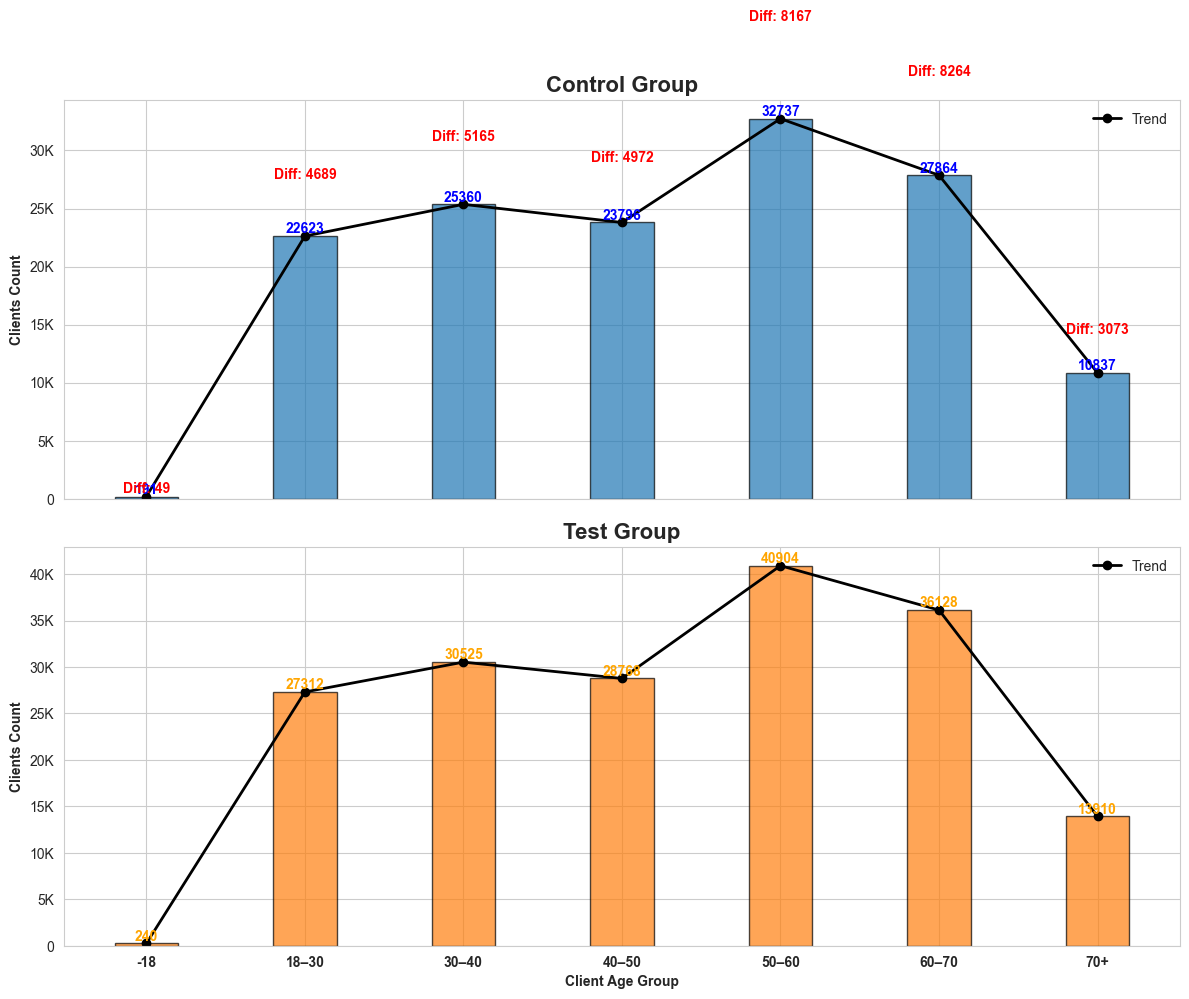

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

# -----------------------------
# 1. Prepare data
# -----------------------------
df_plot = df_main[['client_age', 'test_group']].dropna()
df_plot = df_plot[df_plot['test_group'].isin(['Control', 'Test'])]

# Custom age bins
bins = [0, 18, 30, 40, 50, 60, 70, 150]
labels = ['-18', '18–30', '30–40', '40–50', '50–60', '60–70', '70+']

df_plot['age_group'] = pd.cut(df_plot['client_age'], bins=bins, labels=labels, right=False)

# -----------------------------
# 2. Count clients per bin
# -----------------------------
counts_control = df_plot[df_plot['test_group'] == 'Control']['age_group'].value_counts().reindex(labels, fill_value=0)
counts_test    = df_plot[df_plot['test_group'] == 'Test']['age_group'].value_counts().reindex(labels, fill_value=0)

# -----------------------------
# 3. Plot
# -----------------------------
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

width = 0.4

# --- Control ---
axes[0].bar(labels, counts_control, color='#1f77b4', edgecolor='black', alpha=0.7, width=width)
axes[0].plot(range(len(labels)), counts_control, color='black', marker='o', linewidth=2, label='Trend')
axes[0].set_title('Control Group', fontsize=16, fontweight='bold')
axes[0].set_ylabel('Clients Count', fontweight='bold')
axes[0].legend(frameon=False)

# Add labels above bars
for i, val in enumerate(counts_control):
    axes[0].text(i, val + 5, f'{val}', ha='center', va='bottom', fontweight='bold', color='blue')

# --- Test ---
axes[1].bar(labels, counts_test, color='#ff7f0e', edgecolor='black', alpha=0.7, width=width)
axes[1].plot(range(len(labels)), counts_test, color='black', marker='o', linewidth=2, label='Trend')
axes[1].set_title('Test Group', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Client Age Group', fontweight='bold')
axes[1].set_ylabel('Clients Count', fontweight='bold')
axes[1].legend(frameon=False)

# Add labels above bars
for i, val in enumerate(counts_test):
    axes[1].text(i, val + 5, f'{val}', ha='center', va='bottom', fontweight='bold', color='orange')

# -----------------------------
# 4. Highlight differences
# -----------------------------
for i, (c, t) in enumerate(zip(counts_control, counts_test)):
    diff = abs(c - t)
    if diff > 0:
        # Highlight difference on Control plot
        axes[0].text(i, max(c, t) + 20, f'Diff: {diff}', ha='center', va='bottom', fontweight='bold', color='red')

# -----------------------------
# 5. Formatting
# -----------------------------
for ax in axes:
    ax.set_xticks(range(len(labels)))
    ax.set_xticklabels(labels, fontweight='bold')
    ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda n, pos: f'{int(n/1000)}K' if n >= 1000 else str(int(n))))

plt.tight_layout()
plt.show()


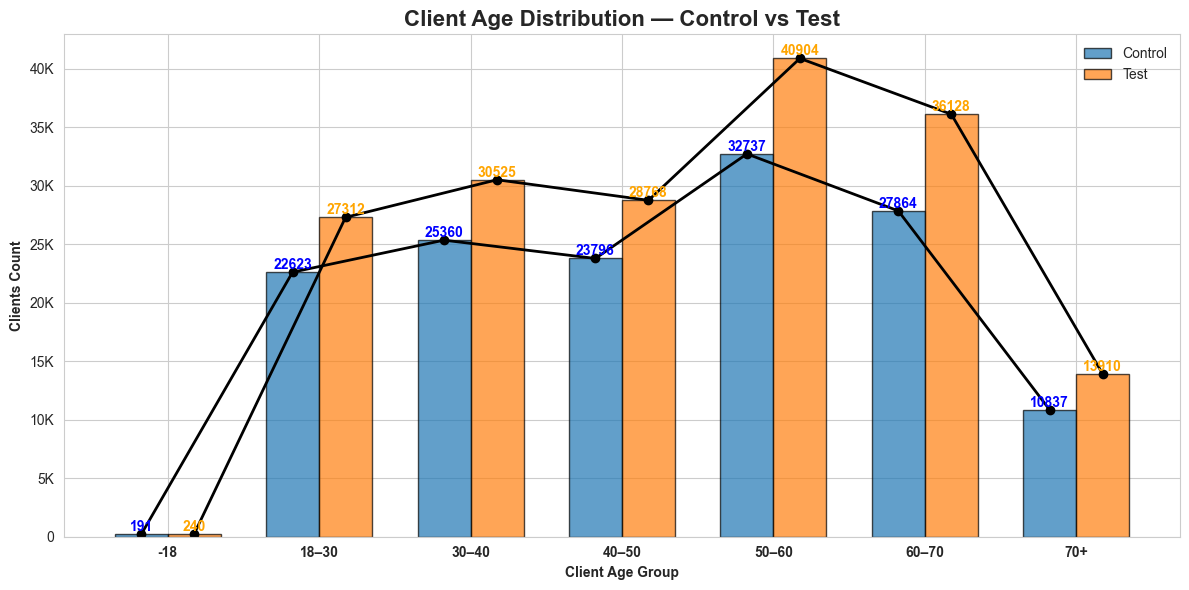

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

# -----------------------------
# 1. Prepare data
# -----------------------------
df_plot = df_main[['client_age', 'test_group']].dropna()
df_plot = df_plot[df_plot['test_group'].isin(['Control', 'Test'])]

# Custom age bins
bins = [0, 18, 30, 40, 50, 60, 70, 150]
labels = ['-18', '18–30', '30–40', '40–50', '50–60', '60–70', '70+']

df_plot['age_group'] = pd.cut(df_plot['client_age'], bins=bins, labels=labels, right=False)

# -----------------------------
# 2. Count clients per bin & group
# -----------------------------
counts_control = df_plot[df_plot['test_group'] == 'Control']['age_group'].value_counts().reindex(labels, fill_value=0)
counts_test    = df_plot[df_plot['test_group'] == 'Test']['age_group'].value_counts().reindex(labels, fill_value=0)

# -----------------------------
# 3. Plot grouped bar chart
# -----------------------------
x = np.arange(len(labels))  # x positions for age bins
width = 0.35  # width of bars

fig, ax = plt.subplots(figsize=(12, 6))

# Bars
bars_control = ax.bar(x - width/2, counts_control, width, color='#1f77b4', edgecolor='black', alpha=0.7, label='Control')
bars_test    = ax.bar(x + width/2, counts_test, width, color='#ff7f0e', edgecolor='black', alpha=0.7, label='Test')

# Trend lines
ax.plot(x - width/2, counts_control, color='black', marker='o', linewidth=2)
ax.plot(x + width/2, counts_test, color='black', marker='o', linewidth=2)

# Labels above bars
for bar in bars_control:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 5, f'{height}', ha='center', va='bottom', fontweight='bold', color='blue')

for bar in bars_test:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 5, f'{height}', ha='center', va='bottom', fontweight='bold', color='orange')

# -----------------------------
# 4. Formatting
# -----------------------------
ax.set_xticks(x)
ax.set_xticklabels(labels, fontweight='bold')
ax.set_xlabel('Client Age Group', fontweight='bold')
ax.set_ylabel('Clients Count', fontweight='bold')
ax.set_title('Client Age Distribution — Control vs Test', fontsize=16, fontweight='bold')

# Y-axis formatter
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda n, pos: f'{int(n/1000)}K' if n >= 1000 else str(int(n))))

# Legend
ax.legend(frameon=False)

plt.tight_layout()
plt.show()


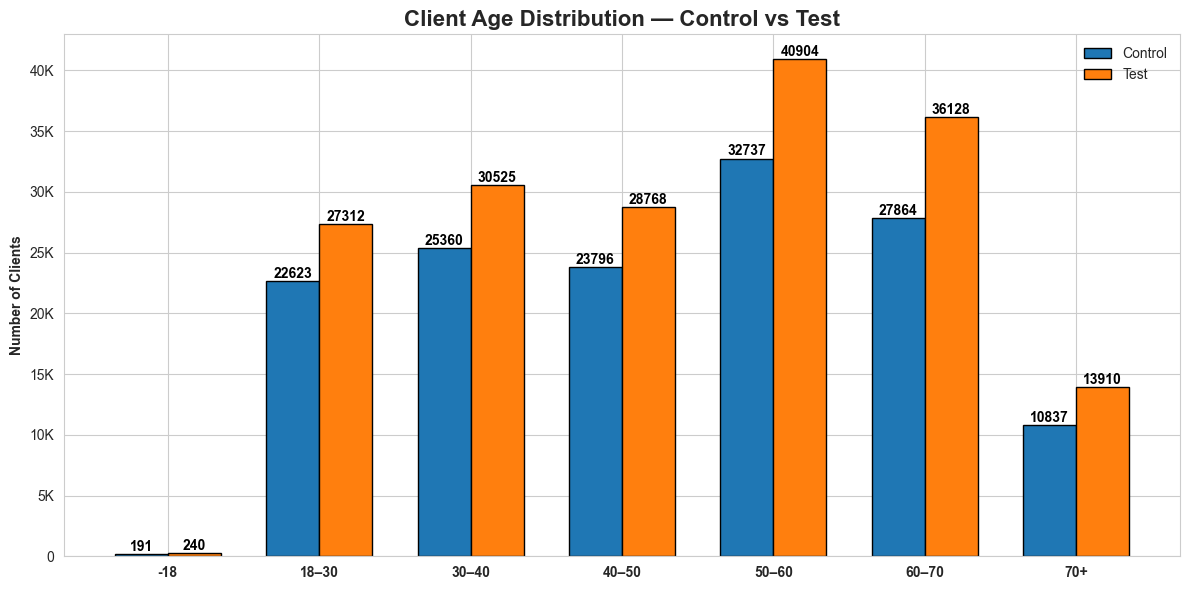

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

# -----------------------------
# 1. Prepare data
# -----------------------------
df_plot = df_main[['client_age', 'test_group']].dropna()
df_plot = df_plot[df_plot['test_group'].isin(['Control', 'Test'])]

# Custom age bins
bins = [0, 18, 30, 40, 50, 60, 70, 150]
labels = ['-18', '18–30', '30–40', '40–50', '50–60', '60–70', '70+']

df_plot['age_group'] = pd.cut(df_plot['client_age'], bins=bins, labels=labels, right=False)

# -----------------------------
# 2. Count clients per bin & group
# -----------------------------
counts_control = df_plot[df_plot['test_group'] == 'Control']['age_group'].value_counts().reindex(labels, fill_value=0)
counts_test    = df_plot[df_plot['test_group'] == 'Test']['age_group'].value_counts().reindex(labels, fill_value=0)

# -----------------------------
# 3. Plot grouped bar chart
# -----------------------------
x = np.arange(len(labels))  # x positions for age bins
width = 0.35  # width of bars

fig, ax = plt.subplots(figsize=(12, 6))

# Bars
bars_control = ax.bar(x - width/2, counts_control, width, color='#1f77b4', edgecolor='black', label='Control')
bars_test    = ax.bar(x + width/2, counts_test, width, color='#ff7f0e', edgecolor='black', label='Test')

# Labels above bars
for bar in bars_control:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 5, f'{height}', ha='center', va='bottom', fontweight='bold', color='black')

for bar in bars_test:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 5, f'{height}', ha='center', va='bottom', fontweight='bold', color='black')

# -----------------------------
# 4. Formatting
# -----------------------------
ax.set_xticks(x)
ax.set_xticklabels(labels, fontweight='bold')
ax.set_ylabel('Number of Clients', fontweight='bold')
ax.set_title('Client Age Distribution — Control vs Test', fontsize=16, fontweight='bold')

# Y-axis formatter
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda n, pos: f'{int(n/1000)}K' if n >= 1000 else str(int(n))))

# Legend
ax.legend(frameon=False)

plt.tight_layout()
plt.show()


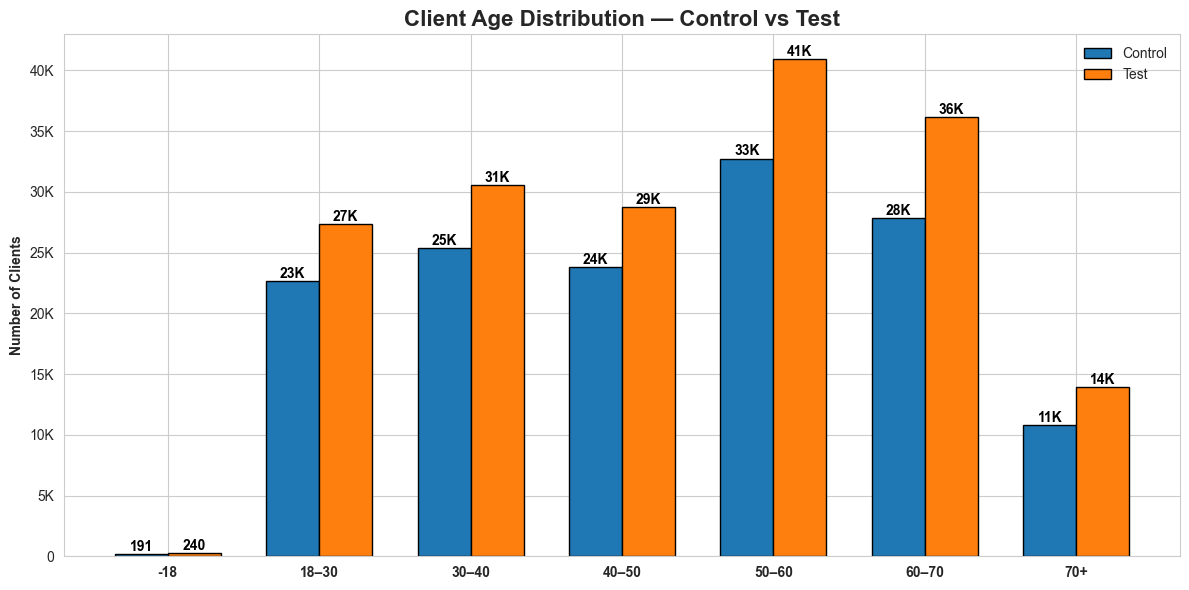

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

# -----------------------------
# 1. Prepare data
# -----------------------------
df_plot = df_main[['client_age', 'test_group']].dropna()
df_plot = df_plot[df_plot['test_group'].isin(['Control', 'Test'])]

# Custom age bins
bins = [0, 18, 30, 40, 50, 60, 70, 150]
labels = ['-18', '18–30', '30–40', '40–50', '50–60', '60–70', '70+']

df_plot['age_group'] = pd.cut(df_plot['client_age'], bins=bins, labels=labels, right=False)

# -----------------------------
# 2. Count clients per bin & group
# -----------------------------
counts_control = df_plot[df_plot['test_group'] == 'Control']['age_group'].value_counts().reindex(labels, fill_value=0)
counts_test    = df_plot[df_plot['test_group'] == 'Test']['age_group'].value_counts().reindex(labels, fill_value=0)

# -----------------------------
# 3. Plot grouped bar chart
# -----------------------------
x = np.arange(len(labels))  # x positions for age bins
width = 0.35  # width of bars

fig, ax = plt.subplots(figsize=(12, 6))

# Bars
bars_control = ax.bar(x - width/2, counts_control, width, color='#1f77b4', edgecolor='black', label='Control')
bars_test    = ax.bar(x + width/2, counts_test, width, color='#ff7f0e', edgecolor='black', label='Test')

# Labels above bars (rounded with K)
def format_k_label(n):
    if n >= 1000:
        return f'{int(round(n/1000))}K'
    else:
        return str(int(round(n)))

for bar in bars_control:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 5, format_k_label(height),
            ha='center', va='bottom', fontweight='bold', color='black')

for bar in bars_test:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 5, format_k_label(height),
            ha='center', va='bottom', fontweight='bold', color='black')

# -----------------------------
# 4. Formatting
# -----------------------------
ax.set_xticks(x)
ax.set_xticklabels(labels, fontweight='bold')
ax.set_ylabel('Number of Clients', fontweight='bold')
ax.set_title('Client Age Distribution — Control vs Test', fontsize=16, fontweight='bold')

# Y-axis formatter
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda n, pos: f'{int(n/1000)}K' if n >= 1000 else str(int(n))))

# Legend
ax.legend(frameon=False)

plt.tight_layout()
plt.show()


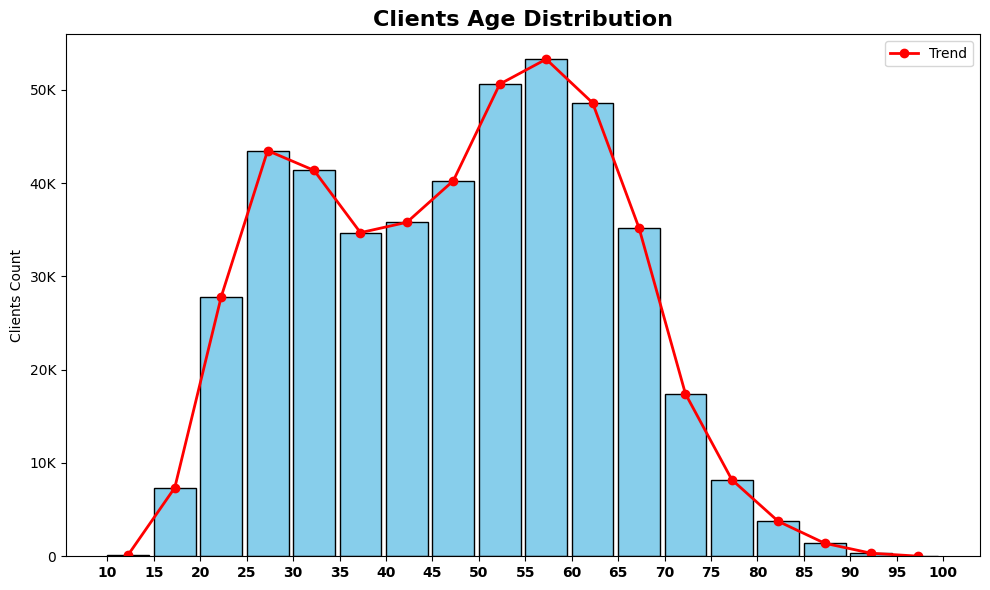

In [66]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

# Prepare histogram data
ages = df_vanguard_ab_test['client_age'].dropna()
bins = range(10, 101, 5)
hist_counts, bin_edges = np.histogram(ages, bins=bins)

# Plot histogram
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(bin_edges[:-1], hist_counts, width=4.5, color='skyblue', edgecolor='black', align='edge')

# Add line following the histogram
ax.plot(bin_edges[:-1] + 2.25, hist_counts, color='red', marker='o', linewidth=2, label='Trend')

# Add title
ax.set_title('Clients Age Distribution', fontsize=16, fontweight='bold')

# Remove x-axis title
ax.set_xlabel('')

# Make x-axis labels bold
ax.set_xticks(range(10, 101, 5))
ax.set_xticklabels(range(10, 101, 5), fontweight='bold')

# Format y-axis in K
def format_k(n, pos=None):
    if n >= 1000:
        return f'{int(n/1000)}K'
    return str(int(n))

ax.yaxis.set_major_formatter(mtick.FuncFormatter(format_k))
plt.ylabel('Clients Count')

# Add legend for the line
plt.legend()

plt.tight_layout()
plt.show()


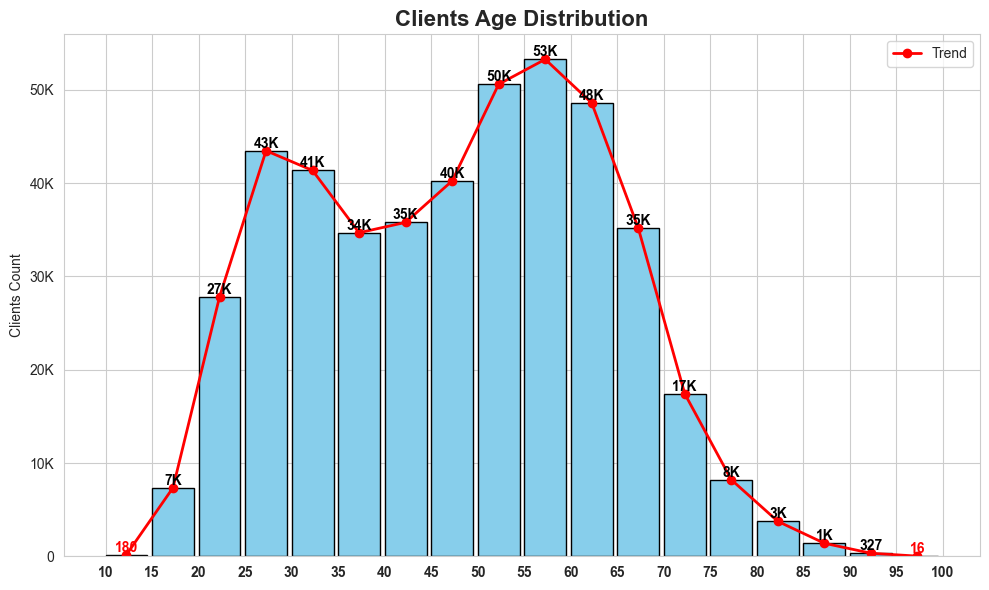

In [118]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

# -----------------------------
# Prepare histogram data
# -----------------------------
ages = df_main['client_age'].dropna()
bins = range(10, 101, 5)
hist_counts, bin_edges = np.histogram(ages, bins=bins)

# Identify youngest and oldest ages
youngest_age = int(ages.min())
oldest_age = int(ages.max())

# -----------------------------
# Plot histogram
# -----------------------------
fig, ax = plt.subplots(figsize=(10,6))
bars = ax.bar(bin_edges[:-1], hist_counts, width=4.5, color='skyblue', edgecolor='black', align='edge')

# Add line following the histogram
ax.plot(bin_edges[:-1] + 2.25, hist_counts, color='red', marker='o', linewidth=2, label='Trend')

# Add title
ax.set_title('Clients Age Distribution', fontsize=16, fontweight='bold')

# Remove x-axis title
ax.set_xlabel('')

# Make x-axis labels bold
ax.set_xticks(range(10, 101, 5))
ax.set_xticklabels(range(10, 101, 5), fontweight='bold')

# Format y-axis in K
def format_k(n, pos=None):
    if n >= 1000:
        return f'{int(n/1000)}K'
    return str(int(n))

ax.yaxis.set_major_formatter(mtick.FuncFormatter(format_k))
plt.ylabel('Clients Count')

# -----------------------------
# Add values above bars, highlight youngest and oldest
# -----------------------------
for bar, left_edge in zip(bars, bin_edges[:-1]):
    height = bar.get_height()
    label = format_k(height)
    
    # Highlight youngest and oldest bins
    if left_edge <= youngest_age < left_edge + 5 or left_edge <= oldest_age < left_edge + 5:
        ax.text(bar.get_x() + bar.get_width()/2, height + 5, label,
                ha='center', va='bottom', fontweight='bold', color='red')
    else:
        ax.text(bar.get_x() + bar.get_width()/2, height + 5, label,
                ha='center', va='bottom', fontweight='bold', color='black')

# Add legend for the line
plt.legend()

plt.tight_layout()
plt.show()


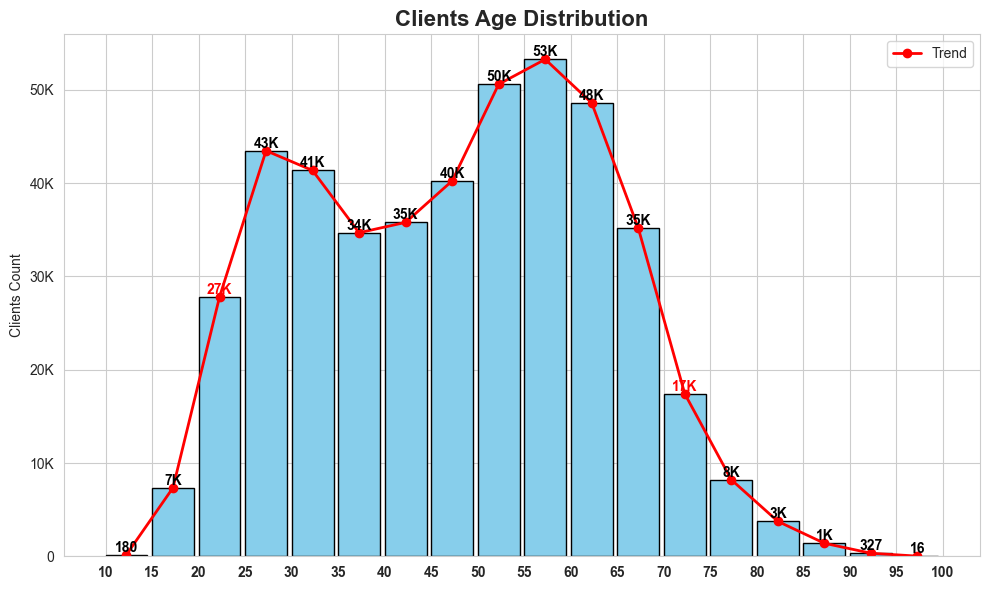

In [119]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

# -----------------------------
# Prepare histogram data
# -----------------------------
ages = df_main['client_age'].dropna()
bins = range(10, 101, 5)
hist_counts, bin_edges = np.histogram(ages, bins=bins)

# Ages to highlight
highlight_ages = [20, 70]

# -----------------------------
# Plot histogram
# -----------------------------
fig, ax = plt.subplots(figsize=(10,6))
bars = ax.bar(bin_edges[:-1], hist_counts, width=4.5, color='skyblue', edgecolor='black', align='edge')

# Add line following the histogram
ax.plot(bin_edges[:-1] + 2.25, hist_counts, color='red', marker='o', linewidth=2, label='Trend')

# Add title
ax.set_title('Clients Age Distribution', fontsize=16, fontweight='bold')

# Remove x-axis title
ax.set_xlabel('')

# Make x-axis labels bold
ax.set_xticks(range(10, 101, 5))
ax.set_xticklabels(range(10, 101, 5), fontweight='bold')

# Format y-axis in K
def format_k(n, pos=None):
    if n >= 1000:
        return f'{int(n/1000)}K'
    return str(int(n))

ax.yaxis.set_major_formatter(mtick.FuncFormatter(format_k))
plt.ylabel('Clients Count')

# -----------------------------
# Add values above bars, highlight bins containing 20 and 70
# -----------------------------
for bar, left_edge in zip(bars, bin_edges[:-1]):
    height = bar.get_height()
    label = format_k(height)
    
    # Highlight specific age bins
    if any(left_edge <= age < left_edge + 5 for age in highlight_ages):
        ax.text(bar.get_x() + bar.get_width()/2, height + 5, label,
                ha='center', va='bottom', fontweight='bold', color='red')
    else:
        ax.text(bar.get_x() + bar.get_width()/2, height + 5, label,
                ha='center', va='bottom', fontweight='bold', color='black')

# Add legend for the line
plt.legend()

plt.tight_layout()
plt.show()


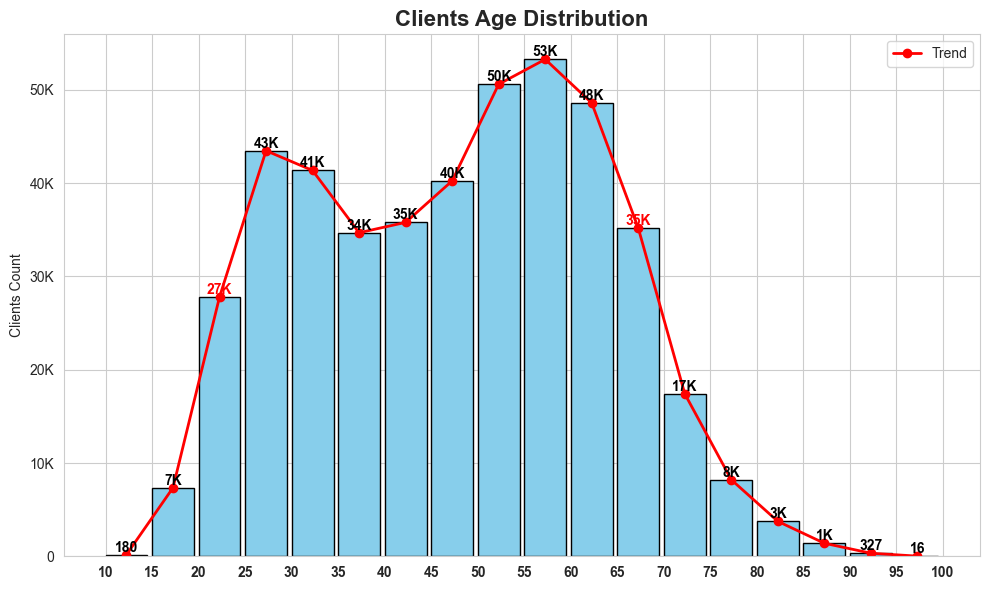

In [120]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

# -----------------------------
# Prepare histogram data
# -----------------------------
ages = df_main['client_age'].dropna()
bins = range(10, 101, 5)
hist_counts, bin_edges = np.histogram(ages, bins=bins)

# Ages to highlight (20 and 65–70)
highlight_ages = [20, 65]  # We'll highlight the bin containing 65

# -----------------------------
# Plot histogram
# -----------------------------
fig, ax = plt.subplots(figsize=(10,6))
bars = ax.bar(bin_edges[:-1], hist_counts, width=4.5, color='skyblue', edgecolor='black', align='edge')

# Add line following the histogram
ax.plot(bin_edges[:-1] + 2.25, hist_counts, color='red', marker='o', linewidth=2, label='Trend')

# Add title
ax.set_title('Clients Age Distribution', fontsize=16, fontweight='bold')

# Remove x-axis title
ax.set_xlabel('')

# Make x-axis labels bold
ax.set_xticks(range(10, 101, 5))
ax.set_xticklabels(range(10, 101, 5), fontweight='bold')

# Format y-axis in K
def format_k(n, pos=None):
    if n >= 1000:
        return f'{int(n/1000)}K'
    return str(int(n))

ax.yaxis.set_major_formatter(mtick.FuncFormatter(format_k))
plt.ylabel('Clients Count')

# -----------------------------
# Add values above bars, highlight bins containing 20 and 65–70
# -----------------------------
for bar, left_edge in zip(bars, bin_edges[:-1]):
    height = bar.get_height()
    label = format_k(height)
    
    # Highlight bin containing 20 or 65–70
    if (left_edge <= 20 < left_edge + 5) or (left_edge <= 65 < left_edge + 5):
        ax.text(bar.get_x() + bar.get_width()/2, height + 5, label,
                ha='center', va='bottom', fontweight='bold', color='red')
    else:
        ax.text(bar.get_x() + bar.get_width()/2, height + 5, label,
                ha='center', va='bottom', fontweight='bold', color='black')

# Add legend for the line
plt.legend()

plt.tight_layout()
plt.show()


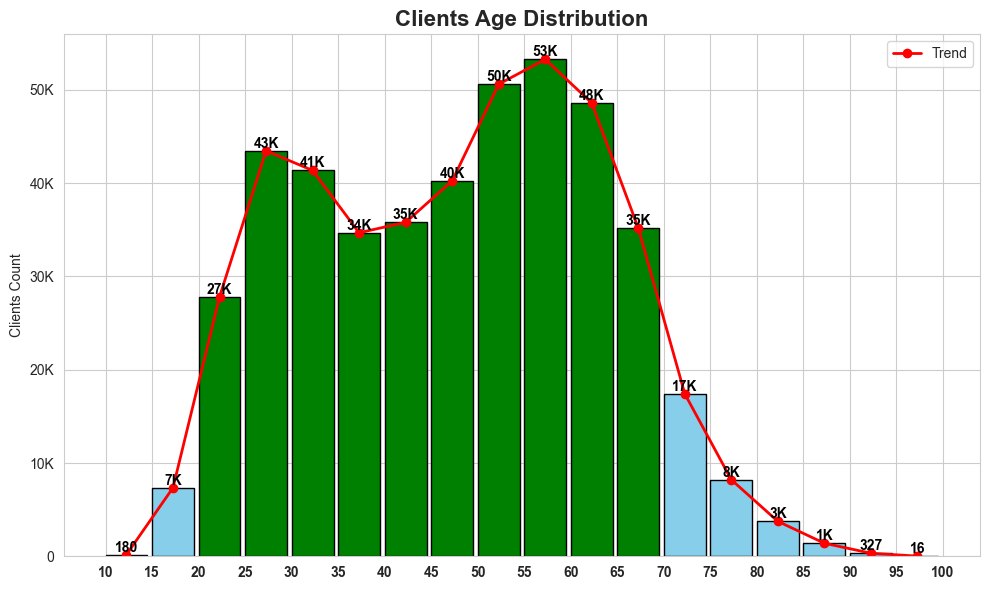

In [121]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

# -----------------------------
# Prepare histogram data
# -----------------------------
ages = df_main['client_age'].dropna()
bins = range(10, 101, 5)
hist_counts, bin_edges = np.histogram(ages, bins=bins)

# -----------------------------
# Plot histogram
# -----------------------------
fig, ax = plt.subplots(figsize=(10,6))

bars = []
for left_edge, count in zip(bin_edges[:-1], hist_counts):
    # Bars between 20 and 70 → green
    if 20 <= left_edge < 70:
        color = 'green'
    else:
        color = 'skyblue'
    
    bar = ax.bar(left_edge, count, width=4.5, color=color, edgecolor='black', align='edge')
    bars.append(bar)

# Add line following the histogram
ax.plot(bin_edges[:-1] + 2.25, hist_counts, color='red', marker='o', linewidth=2, label='Trend')

# Add title
ax.set_title('Clients Age Distribution', fontsize=16, fontweight='bold')

# Remove x-axis title
ax.set_xlabel('')

# Make x-axis labels bold
ax.set_xticks(range(10, 101, 5))
ax.set_xticklabels(range(10, 101, 5), fontweight='bold')

# Format y-axis in K
def format_k(n, pos=None):
    if n >= 1000:
        return f'{int(n/1000)}K'
    return str(int(n))

ax.yaxis.set_major_formatter(mtick.FuncFormatter(format_k))
plt.ylabel('Clients Count')

# -----------------------------
# Add values above bars
# -----------------------------
for bar_group, left_edge in zip(bars, bin_edges[:-1]):
    bar = bar_group[0]
    height = bar.get_height()
    label = format_k(height)
    ax.text(bar.get_x() + bar.get_width()/2, height + 5, label,
            ha='center', va='bottom', fontweight='bold', color='black')

# Add legend for the line
plt.legend()

plt.tight_layout()
plt.show()


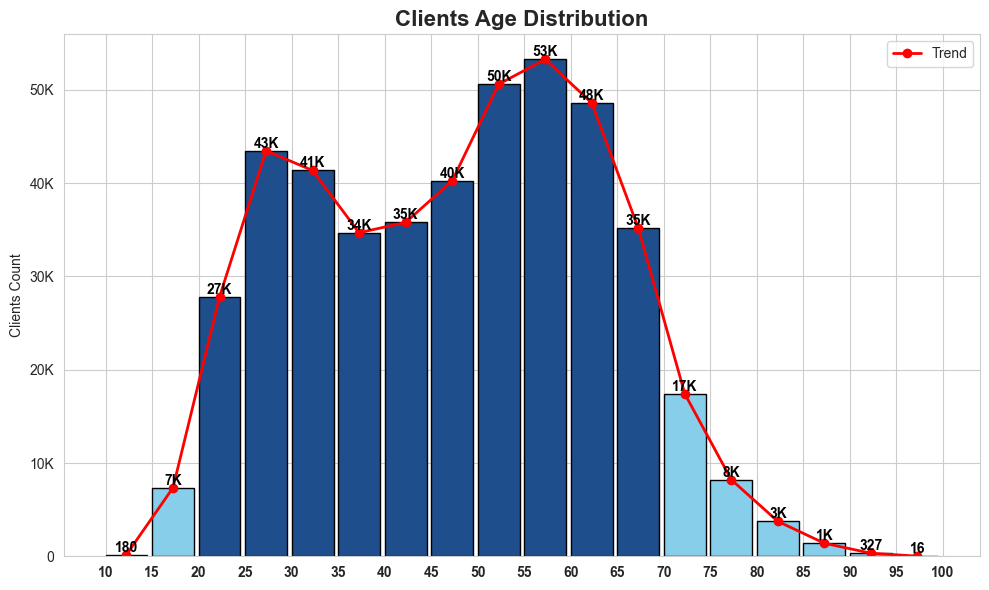

In [122]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

# -----------------------------
# Prepare histogram data
# -----------------------------
ages = df_main['client_age'].dropna()
bins = range(10, 101, 5)
hist_counts, bin_edges = np.histogram(ages, bins=bins)

# -----------------------------
# Plot histogram
# -----------------------------
fig, ax = plt.subplots(figsize=(10,6))

bars = []
for left_edge, count in zip(bin_edges[:-1], hist_counts):
    # Bars between 20 and 70 → deeper blue
    if 20 <= left_edge < 70:
        color = '#1f4e8c'  # deep blue
    else:
        color = 'skyblue'
    
    bar = ax.bar(left_edge, count, width=4.5, color=color, edgecolor='black', align='edge')
    bars.append(bar)

# Add line following the histogram
ax.plot(bin_edges[:-1] + 2.25, hist_counts, color='red', marker='o', linewidth=2, label='Trend')

# Add title
ax.set_title('Clients Age Distribution', fontsize=16, fontweight='bold')

# Remove x-axis title
ax.set_xlabel('')

# Make x-axis labels bold
ax.set_xticks(range(10, 101, 5))
ax.set_xticklabels(range(10, 101, 5), fontweight='bold')

# Format y-axis in K
def format_k(n, pos=None):
    if n >= 1000:
        return f'{int(n/1000)}K'
    return str(int(n))

ax.yaxis.set_major_formatter(mtick.FuncFormatter(format_k))
plt.ylabel('Clients Count')

# -----------------------------
# Add values above bars
# -----------------------------
for bar_group, left_edge in zip(bars, bin_edges[:-1]):
    bar = bar_group[0]
    height = bar.get_height()
    label = format_k(height)
    ax.text(bar.get_x() + bar.get_width()/2, height + 5, label,
            ha='center', va='bottom', fontweight='bold', color='black')

# Add legend for the line
plt.legend()

plt.tight_layout()
plt.show()


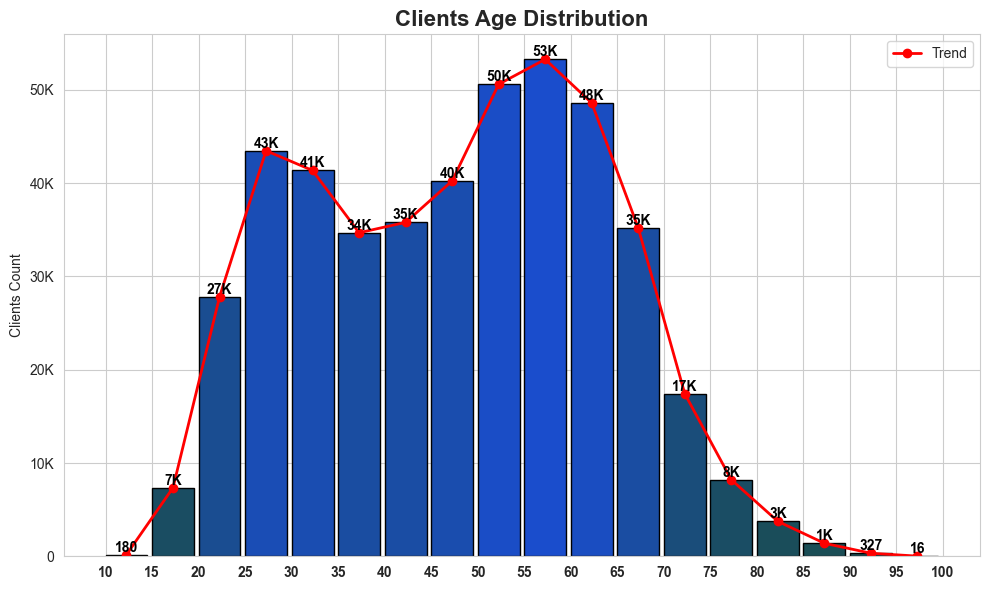

In [123]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

# -----------------------------
# Prepare histogram data
# -----------------------------
ages = df_main['client_age'].dropna()
bins = range(10, 101, 5)
hist_counts, bin_edges = np.histogram(ages, bins=bins)

max_count = hist_counts.max()  # for scaling color intensity

# -----------------------------
# Plot histogram
# -----------------------------
fig, ax = plt.subplots(figsize=(10,6))

bars = []
for left_edge, count in zip(bin_edges[:-1], hist_counts):
    # Deeper blue depending on bar height
    intensity = 0.4 + 0.6 * (count / max_count)  # from light to deep blue
    color = (0.1, 0.3, 0.8 * intensity)  # RGB tuple
    bar = ax.bar(left_edge, count, width=4.5, color=color, edgecolor='black', align='edge')
    bars.append(bar)

# Add line following the histogram
ax.plot(bin_edges[:-1] + 2.25, hist_counts, color='red', marker='o', linewidth=2, label='Trend')

# Add title
ax.set_title('Clients Age Distribution', fontsize=16, fontweight='bold')
ax.set_xlabel('')

# Make x-axis labels bold
ax.set_xticks(range(10, 101, 5))
ax.set_xticklabels(range(10, 101, 5), fontweight='bold')

# Format y-axis in K
def format_k(n, pos=None):
    if n >= 1000:
        return f'{int(n/1000)}K'
    return str(int(n))

ax.yaxis.set_major_formatter(mtick.FuncFormatter(format_k))
plt.ylabel('Clients Count')

# -----------------------------
# Add values above bars
# -----------------------------
for bar_group, left_edge in zip(bars, bin_edges[:-1]):
    bar = bar_group[0]
    height = bar.get_height()
    label = format_k(height)
    ax.text(bar.get_x() + bar.get_width()/2, height + 5, label,
            ha='center', va='bottom', fontweight='bold', color='black')

# Add legend for the line
plt.legend()

plt.tight_layout()
plt.show()


C:\Users\sboub\AppData\Local\Temp\ipykernel_23472\4246498432.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Blues')  # heatmap-like blue


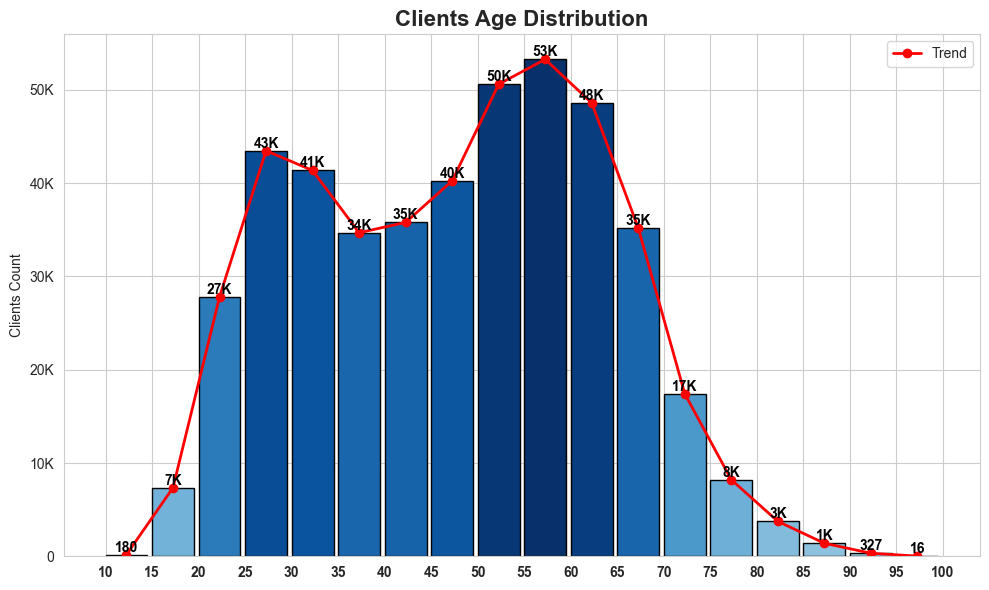

In [124]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import matplotlib.cm as cm

# -----------------------------
# Prepare histogram data
# -----------------------------
ages = df_main['client_age'].dropna()
bins = range(10, 101, 5)
hist_counts, bin_edges = np.histogram(ages, bins=bins)

max_count = hist_counts.max()  # for scaling color intensity

# -----------------------------
# Choose a blue colormap
# -----------------------------
cmap = cm.get_cmap('Blues')  # heatmap-like blue
norm_counts = hist_counts / max_count  # normalize 0-1 for colormap

# -----------------------------
# Plot histogram
# -----------------------------
fig, ax = plt.subplots(figsize=(10,6))

bars = []
for left_edge, count, norm in zip(bin_edges[:-1], hist_counts, norm_counts):
    color = cmap(0.4 + 0.6*norm)  # scale from lighter to deeper blue
    bar = ax.bar(left_edge, count, width=4.5, color=color, edgecolor='black', align='edge')
    bars.append(bar)

# Add line following the histogram
ax.plot(bin_edges[:-1] + 2.25, hist_counts, color='red', marker='o', linewidth=2, label='Trend')

# Add title
ax.set_title('Clients Age Distribution', fontsize=16, fontweight='bold')
ax.set_xlabel('')

# Make x-axis labels bold
ax.set_xticks(range(10, 101, 5))
ax.set_xticklabels(range(10, 101, 5), fontweight='bold')

# Format y-axis in K
def format_k(n, pos=None):
    if n >= 1000:
        return f'{int(n/1000)}K'
    return str(int(n))

ax.yaxis.set_major_formatter(mtick.FuncFormatter(format_k))
plt.ylabel('Clients Count')

# -----------------------------
# Add values above bars
# -----------------------------
for bar_group, left_edge in zip(bars, bin_edges[:-1]):
    bar = bar_group[0]
    height = bar.get_height()
    label = format_k(height)
    ax.text(bar.get_x() + bar.get_width()/2, height + 5, label,
            ha='center', va='bottom', fontweight='bold', color='black')

# Add legend for the line
plt.legend()

plt.tight_layout()
plt.show()


C:\Users\sboub\AppData\Local\Temp\ipykernel_23472\1910608539.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('coolwarm')  # blue to red


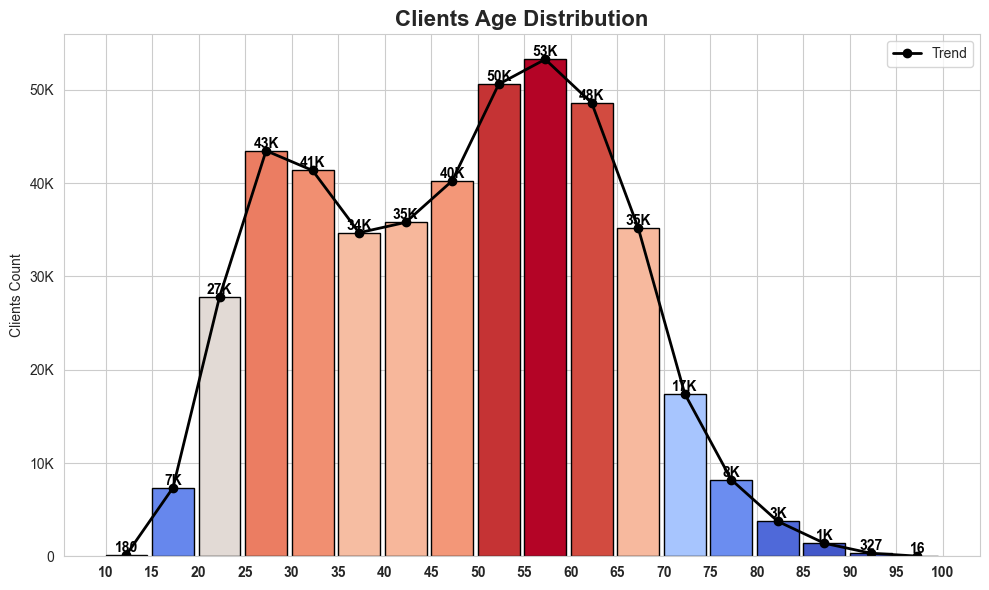

In [125]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# -----------------------------
# Prepare histogram data
# -----------------------------
ages = df_main['client_age'].dropna()
bins = range(10, 101, 5)
hist_counts, bin_edges = np.histogram(ages, bins=bins)

max_count = hist_counts.max()
min_count = hist_counts.min()

# -----------------------------
# Choose diverging colormap: blue -> red
# -----------------------------
cmap = cm.get_cmap('coolwarm')  # blue to red
norm = mcolors.Normalize(vmin=min_count, vmax=max_count)

# -----------------------------
# Plot histogram
# -----------------------------
fig, ax = plt.subplots(figsize=(10,6))

bars = []
for left_edge, count in zip(bin_edges[:-1], hist_counts):
    color = cmap(norm(count))
    bar = ax.bar(left_edge, count, width=4.5, color=color, edgecolor='black', align='edge')
    bars.append(bar)

# Add line following the histogram
ax.plot(bin_edges[:-1] + 2.25, hist_counts, color='black', marker='o', linewidth=2, label='Trend')

# Add title
ax.set_title('Clients Age Distribution', fontsize=16, fontweight='bold')
ax.set_xlabel('')

# Make x-axis labels bold
ax.set_xticks(range(10, 101, 5))
ax.set_xticklabels(range(10, 101, 5), fontweight='bold')

# Format y-axis in K
def format_k(n, pos=None):
    if n >= 1000:
        return f'{int(n/1000)}K'
    return str(int(n))

ax.yaxis.set_major_formatter(mtick.FuncFormatter(format_k))
plt.ylabel('Clients Count')

# -----------------------------
# Add values above bars
# -----------------------------
for bar_group, left_edge in zip(bars, bin_edges[:-1]):
    bar = bar_group[0]
    height = bar.get_height()
    label = format_k(height)
    ax.text(bar.get_x() + bar.get_width()/2, height + 5, label,
            ha='center', va='bottom', fontweight='bold', color='black')

# Add legend for the line
plt.legend()

plt.tight_layout()
plt.show()


C:\Users\sboub\AppData\Local\Temp\ipykernel_23472\1709109332.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('coolwarm')  # blue to red


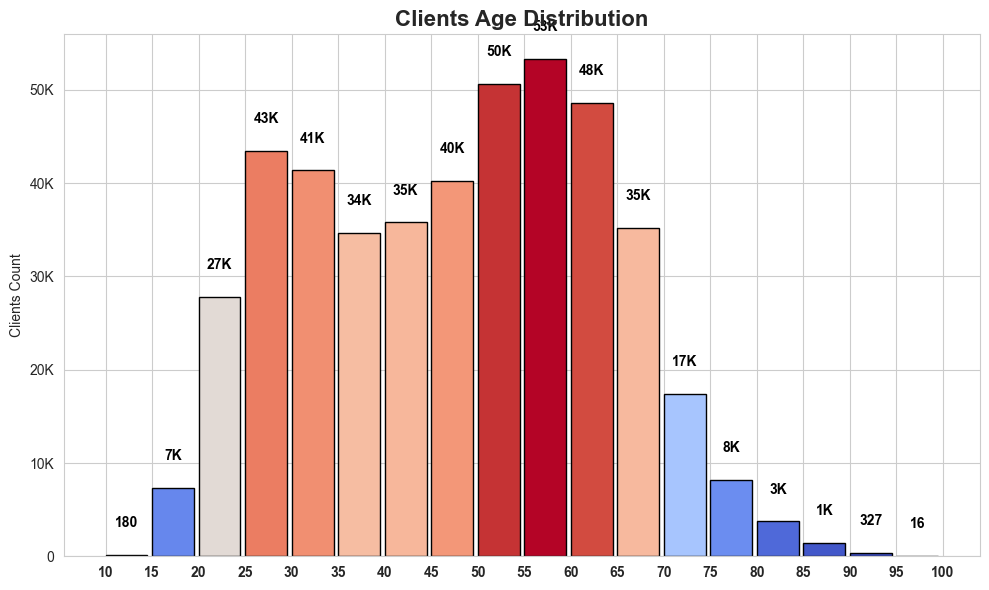

In [127]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# -----------------------------
# Prepare histogram data
# -----------------------------
ages = df_main['client_age'].dropna()
bins = range(10, 101, 5)
hist_counts, bin_edges = np.histogram(ages, bins=bins)

max_count = hist_counts.max()
min_count = hist_counts.min()

# -----------------------------
# Choose diverging colormap: blue -> red
# -----------------------------
cmap = cm.get_cmap('coolwarm')  # blue to red
norm = mcolors.Normalize(vmin=min_count, vmax=max_count)

# -----------------------------
# Plot histogram
# -----------------------------
fig, ax = plt.subplots(figsize=(10,6))

bars = []
for left_edge, count in zip(bin_edges[:-1], hist_counts):
    color = cmap(norm(count))
    bar = ax.bar(left_edge, count, width=4.5, color=color, edgecolor='black', align='edge')
    bars.append(bar)

# -----------------------------
# Add title and formatting
# -----------------------------
ax.set_title('Clients Age Distribution', fontsize=16, fontweight='bold')
ax.set_xlabel('')

# Make x-axis labels bold
ax.set_xticks(range(10, 101, 5))
ax.set_xticklabels(range(10, 101, 5), fontweight='bold')

# Format y-axis in K
def format_k(n, pos=None):
    if n >= 1000:
        return f'{int(n/1000)}K'
    return str(int(n))

ax.yaxis.set_major_formatter(mtick.FuncFormatter(format_k))
plt.ylabel('Clients Count')

# -----------------------------
# Add values above bars
# -----------------------------
for bar_group, left_edge in zip(bars, bin_edges[:-1]):
    bar = bar_group[0]
    height = bar.get_height()
    label = format_k(height)
    ax.text(
        bar.get_x() + bar.get_width()/2,
        height + 0.05*max_count,  # slightly above the bar
        label,
        ha='center',
        va='bottom',
        fontweight='bold',
        color='black'
    )

plt.tight_layout()
plt.show()


C:\Users\sboub\AppData\Local\Temp\ipykernel_23472\600939397.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('coolwarm')  # blue to red


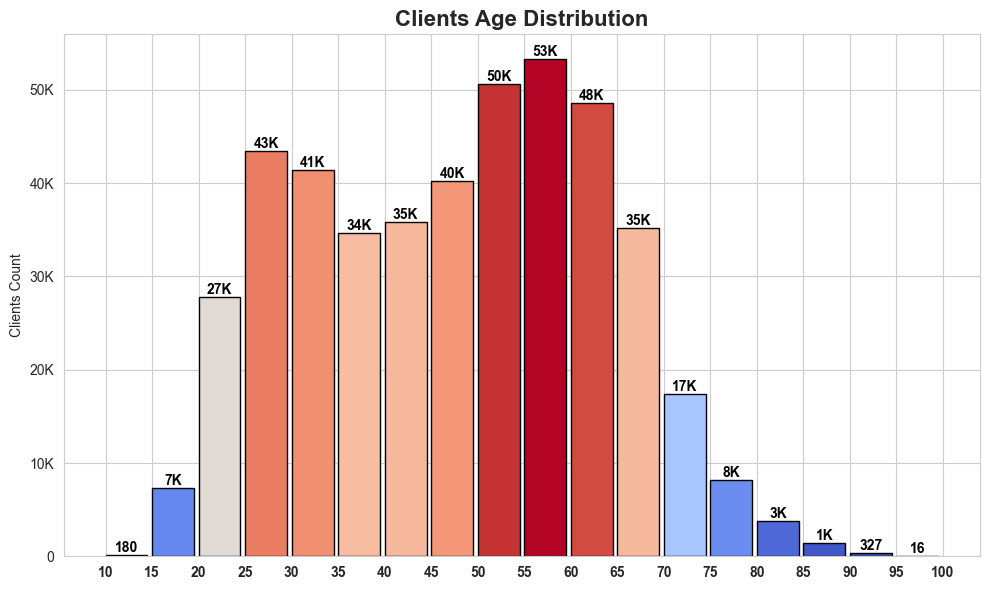

In [128]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# -----------------------------
# Prepare histogram data
# -----------------------------
ages = df_main['client_age'].dropna()
bins = range(10, 101, 5)
hist_counts, bin_edges = np.histogram(ages, bins=bins)

max_count = hist_counts.max()
min_count = hist_counts.min()

# -----------------------------
# Choose diverging colormap: blue -> red
# -----------------------------
cmap = cm.get_cmap('coolwarm')  # blue to red
norm = mcolors.Normalize(vmin=min_count, vmax=max_count)

# -----------------------------
# Plot histogram
# -----------------------------
fig, ax = plt.subplots(figsize=(10,6))

bars = []
for left_edge, count in zip(bin_edges[:-1], hist_counts):
    color = cmap(norm(count))
    bar = ax.bar(left_edge, count, width=4.5, color=color, edgecolor='black', align='edge')
    bars.append(bar)

# -----------------------------
# Add title and formatting
# -----------------------------
ax.set_title('Clients Age Distribution', fontsize=16, fontweight='bold')
ax.set_xlabel('')

# Make x-axis labels bold
ax.set_xticks(range(10, 101, 5))
ax.set_xticklabels(range(10, 101, 5), fontweight='bold')

# Format y-axis in K
def format_k(n, pos=None):
    if n >= 1000:
        return f'{int(n/1000)}K'
    return str(int(n))

ax.yaxis.set_major_formatter(mtick.FuncFormatter(format_k))
plt.ylabel('Clients Count')

# -----------------------------
# Add values above bars (fixed spacing)
# -----------------------------
for bar_group in bars:
    bar = bar_group[0]
    height = bar.get_height()
    label = format_k(height)
    ax.text(
        bar.get_x() + bar.get_width()/2,
        height + 5,  # fixed spacing above bar
        label,
        ha='center',
        va='bottom',
        fontweight='bold',
        color='black'
    )

plt.tight_layout()
plt.show()


C:\Users\sboub\AppData\Local\Temp\ipykernel_23472\1718830725.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('coolwarm')  # blue to red


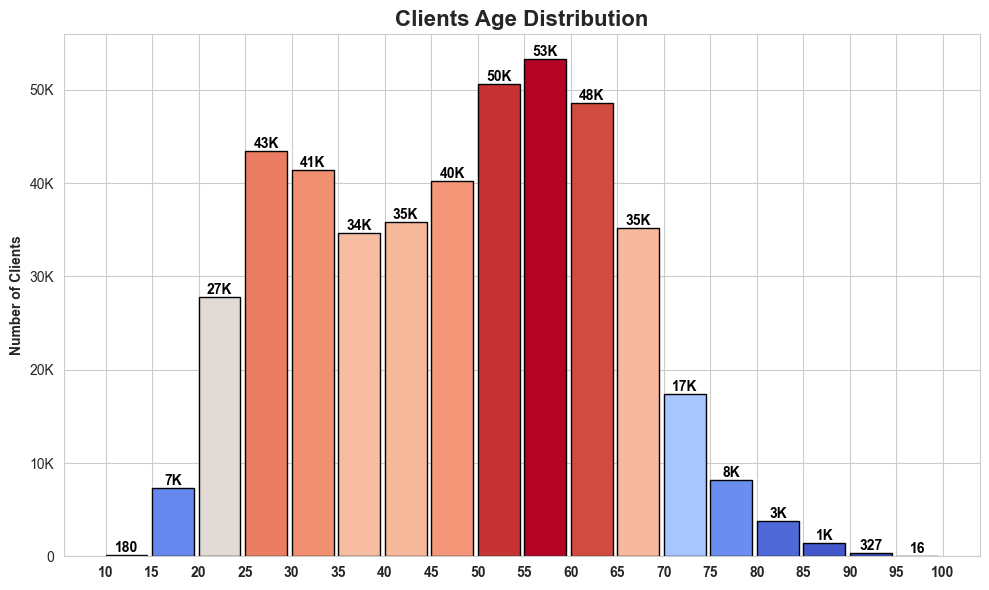

In [129]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# -----------------------------
# Prepare histogram data
# -----------------------------
ages = df_main['client_age'].dropna()
bins = range(10, 101, 5)
hist_counts, bin_edges = np.histogram(ages, bins=bins)

max_count = hist_counts.max()
min_count = hist_counts.min()

# -----------------------------
# Choose diverging colormap: blue -> red
# -----------------------------
cmap = cm.get_cmap('coolwarm')  # blue to red
norm = mcolors.Normalize(vmin=min_count, vmax=max_count)

# -----------------------------
# Plot histogram
# -----------------------------
fig, ax = plt.subplots(figsize=(10,6))

bars = []
for left_edge, count in zip(bin_edges[:-1], hist_counts):
    color = cmap(norm(count))
    bar = ax.bar(left_edge, count, width=4.5, color=color, edgecolor='black', align='edge')
    bars.append(bar)

# -----------------------------
# Add title and formatting
# -----------------------------
ax.set_title('Clients Age Distribution', fontsize=16, fontweight='bold')
ax.set_xlabel('')

# Make x-axis labels bold
ax.set_xticks(range(10, 101, 5))
ax.set_xticklabels(range(10, 101, 5), fontweight='bold')

# Format y-axis in K
def format_k(n, pos=None):
    if n >= 1000:
        return f'{int(n/1000)}K'
    return str(int(n))

ax.yaxis.set_major_formatter(mtick.FuncFormatter(format_k))
ax.set_ylabel('Number of Clients', fontweight='bold')  # Updated label

# -----------------------------
# Add values above bars (fixed spacing)
# -----------------------------
for bar_group in bars:
    bar = bar_group[0]
    height = bar.get_height()
    label = format_k(height)
    ax.text(
        bar.get_x() + bar.get_width()/2,
        height + 5,  # fixed spacing above bar
        label,
        ha='center',
        va='bottom',
        fontweight='bold',
        color='black'
    )

plt.tight_layout()
plt.show()


C:\Users\sboub\AppData\Local\Temp\ipykernel_23472\2433836854.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('coolwarm')  # blue to red


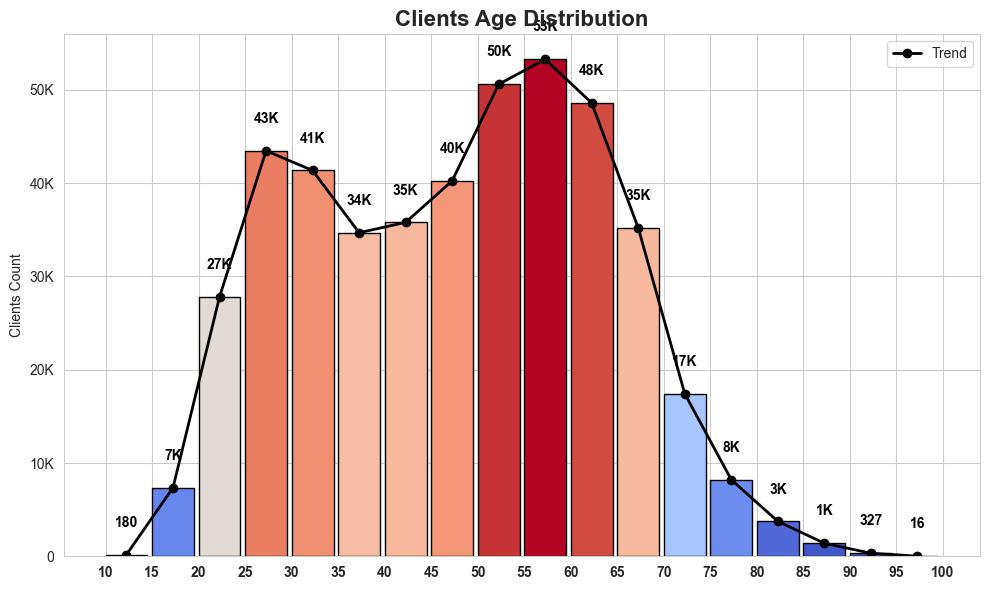

In [126]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# -----------------------------
# Prepare histogram data
# -----------------------------
ages = df_main['client_age'].dropna()
bins = range(10, 101, 5)
hist_counts, bin_edges = np.histogram(ages, bins=bins)

max_count = hist_counts.max()
min_count = hist_counts.min()

# -----------------------------
# Choose diverging colormap: blue -> red
# -----------------------------
cmap = cm.get_cmap('coolwarm')  # blue to red
norm = mcolors.Normalize(vmin=min_count, vmax=max_count)

# -----------------------------
# Plot histogram
# -----------------------------
fig, ax = plt.subplots(figsize=(10,6))

bars = []
for left_edge, count in zip(bin_edges[:-1], hist_counts):
    color = cmap(norm(count))
    bar = ax.bar(left_edge, count, width=4.5, color=color, edgecolor='black', align='edge')
    bars.append(bar)

# Add line following the histogram
ax.plot(bin_edges[:-1] + 2.25, hist_counts, color='black', marker='o', linewidth=2, label='Trend')

# Add title
ax.set_title('Clients Age Distribution', fontsize=16, fontweight='bold')
ax.set_xlabel('')

# Make x-axis labels bold
ax.set_xticks(range(10, 101, 5))
ax.set_xticklabels(range(10, 101, 5), fontweight='bold')

# Format y-axis in K
def format_k(n, pos=None):
    if n >= 1000:
        return f'{int(n/1000)}K'
    return str(int(n))

ax.yaxis.set_major_formatter(mtick.FuncFormatter(format_k))
plt.ylabel('Clients Count')

# -----------------------------
# Add values above bars (slightly higher)
# -----------------------------
for bar_group, left_edge in zip(bars, bin_edges[:-1]):
    bar = bar_group[0]
    height = bar.get_height()
    label = format_k(height)
    ax.text(
        bar.get_x() + bar.get_width()/2,
        height + 0.05*max_count,  # raise 5% of max count
        label,
        ha='center',
        va='bottom',
        fontweight='bold',
        color='black'
    )

# Add legend for the line
plt.legend()

plt.tight_layout()
plt.show()


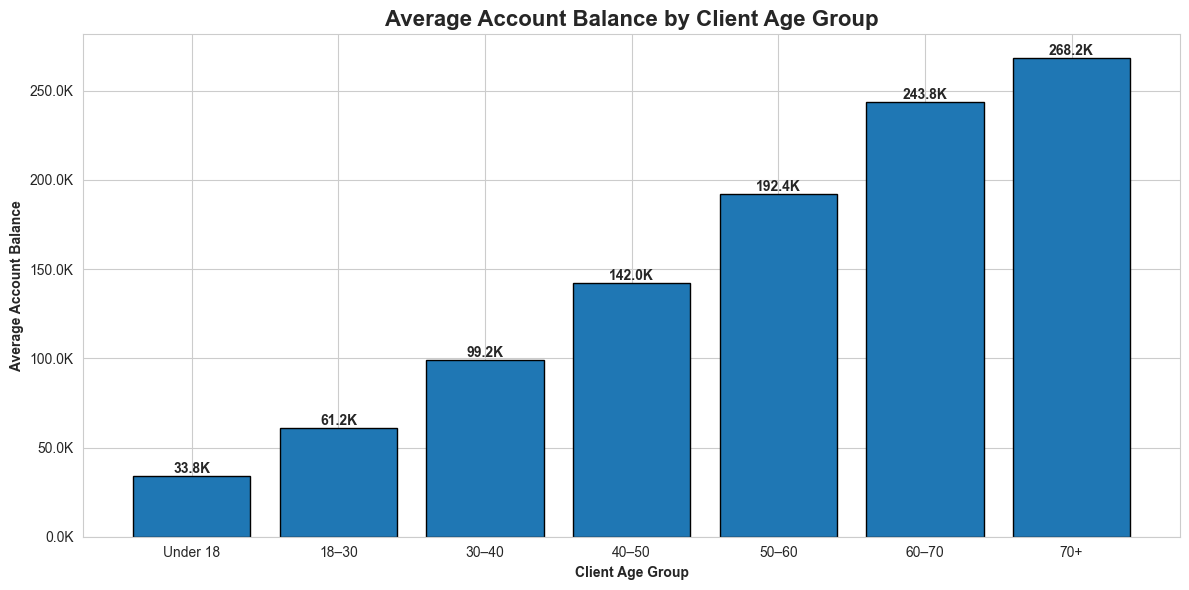

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# -----------------------------
# 1. Prepare data
# -----------------------------
df_plot = df_main[['client_age', 'account_balance']].dropna()

# Age group bins
bins = [0, 18, 30, 40, 50, 60, 70, 150]
labels = ['Under 18', '18–30', '30–40', '40–50', '50–60', '60–70', '70+']

df_plot['age_group'] = pd.cut(
    df_plot['client_age'],
    bins=bins,
    labels=labels,
    right=False
)

# -----------------------------
# 2. Average balance per age group
# -----------------------------
age_group_balance = (
    df_plot
    .groupby('age_group')['account_balance']
    .mean()
    .reset_index()
)

# -----------------------------
# 3. Plot
# -----------------------------
fig, ax = plt.subplots(figsize=(12, 6))

bars = ax.bar(
    age_group_balance['age_group'],
    age_group_balance['account_balance'],
    edgecolor='black'
)

# Titles and labels
ax.set_title(
    'Average Account Balance by Client Age Group',
    fontsize=16,
    fontweight='bold'
)
ax.set_xlabel('Client Age Group', fontweight='bold')
ax.set_ylabel('Average Account Balance', fontweight='bold')

# ✅ REAL K conversion (1000 → 1K)
ax.yaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x, pos: f'{x/1000:.1f}K')
)

# -----------------------------
# 4. Add value labels on bars
# -----------------------------
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height/1000:.1f}K',
        ha='center',
        va='bottom',
        fontweight='bold'
    )

plt.tight_layout()
plt.show()


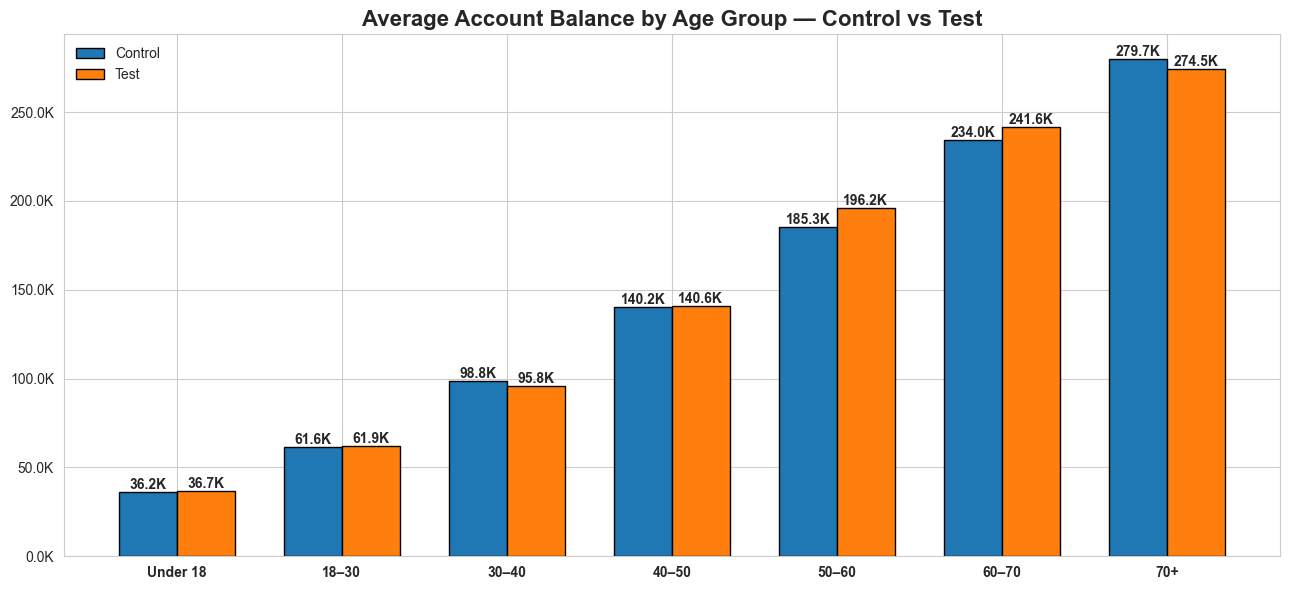

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

# -----------------------------
# 1. Prepare data
# -----------------------------
df_plot = df_main[['client_age', 'account_balance', 'test_group']].dropna()

# Age group bins
bins = [0, 18, 30, 40, 50, 60, 70, 150]
labels = ['Under 18', '18–30', '30–40', '40–50', '50–60', '60–70', '70+']

df_plot['age_group'] = pd.cut(
    df_plot['client_age'],
    bins=bins,
    labels=labels,
    right=False
)

# -----------------------------
# 2. Average balance per age group & test group
# -----------------------------
age_group_balance = (
    df_plot
    .groupby(['age_group', 'test_group'])['account_balance']
    .mean()
    .reset_index()
)

# Keep only Control & Test
age_group_balance = age_group_balance[
    age_group_balance['test_group'].isin(['Control', 'Test'])
]

# Pivot for plotting
pivot_df = age_group_balance.pivot(
    index='age_group',
    columns='test_group',
    values='account_balance'
)

# -----------------------------
# 3. Plot
# -----------------------------
fig, ax = plt.subplots(figsize=(13, 6))

x = np.arange(len(pivot_df.index))
width = 0.35

bars_control = ax.bar(
    x - width/2,
    pivot_df['Control'],
    width,
    label='Control',
    color='#1f77b4',
    edgecolor='black'
)

bars_test = ax.bar(
    x + width/2,
    pivot_df['Test'],
    width,
    label='Test',
    color='#ff7f0e',
    edgecolor='black'
)

# Titles and labels
ax.set_title(
    'Average Account Balance by Age Group — Control vs Test',
    fontsize=16,
    fontweight='bold'
)

ax.set_xticks(x)
ax.set_xticklabels(pivot_df.index, fontweight='bold')

# ✅ Proper K conversion
ax.yaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x, pos: f'{x/1000:.1f}K')
)

# -----------------------------
# 4. Value labels
# -----------------------------
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        if pd.notna(height):
            ax.text(
                bar.get_x() + bar.get_width()/2,
                height,
                f'{height/1000:.1f}K',
                ha='center',
                va='bottom',
                fontsize=10,
                fontweight='bold'
            )

add_labels(bars_control)
add_labels(bars_test)

# Legend
ax.legend(frameon=False)

plt.tight_layout()
plt.show()


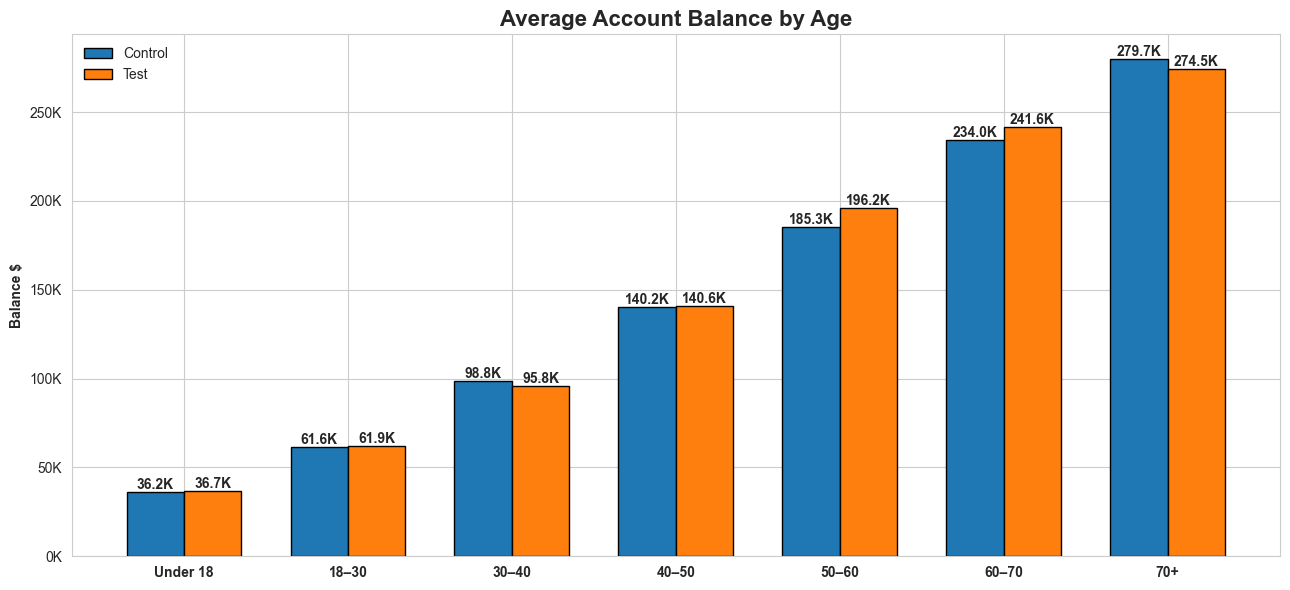

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

# -----------------------------
# 1. Prepare data
# -----------------------------
df_plot = df_main[['client_age', 'account_balance', 'test_group']].dropna()

bins = [0, 18, 30, 40, 50, 60, 70, 150]
labels = ['Under 18', '18–30', '30–40', '40–50', '50–60', '60–70', '70+']

df_plot['age_group'] = pd.cut(
    df_plot['client_age'],
    bins=bins,
    labels=labels,
    right=False
)

# -----------------------------
# 2. Average balance per age group & test group
# -----------------------------
age_group_balance = (
    df_plot
    .groupby(['age_group', 'test_group'])['account_balance']
    .mean()
    .reset_index()
)

age_group_balance = age_group_balance[
    age_group_balance['test_group'].isin(['Control', 'Test'])
]

pivot_df = age_group_balance.pivot(
    index='age_group',
    columns='test_group',
    values='account_balance'
)

# -----------------------------
# 3. Plot
# -----------------------------
fig, ax = plt.subplots(figsize=(13, 6))

x = np.arange(len(pivot_df.index))
width = 0.35

bars_control = ax.bar(
    x - width/2,
    pivot_df['Control'],
    width,
    label='Control',
    color='#1f77b4',
    edgecolor='black'
)

bars_test = ax.bar(
    x + width/2,
    pivot_df['Test'],
    width,
    label='Test',
    color='#ff7f0e',
    edgecolor='black'
)

ax.set_title(
    'Average Account Balance by Age',
    fontsize=16,
    fontweight='bold'
)

ax.set_ylabel("Balance $", fontweight='bold')

ax.set_xticks(x)
ax.set_xticklabels(pivot_df.index, fontweight='bold')

# ✅ Y-axis formatter without .0
ax.yaxis.set_major_formatter(
    mtick.FuncFormatter(
        lambda x, pos: f'{int(x/1000)}K' if (x/1000).is_integer() else f'{x/1000:.1f}K'
    )
)

# -----------------------------
# 4. Value labels
# -----------------------------
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        if pd.notna(height):
            label = (
                f'{int(height/1000)}K'
                if (height/1000).is_integer()
                else f'{height/1000:.1f}K'
            )
            ax.text(
                bar.get_x() + bar.get_width()/2,
                height,
                label,
                ha='center',
                va='bottom',
                fontsize=10,
                fontweight='bold'
            )

add_labels(bars_control)
add_labels(bars_test)

ax.legend(frameon=False)
plt.tight_layout()
plt.show()


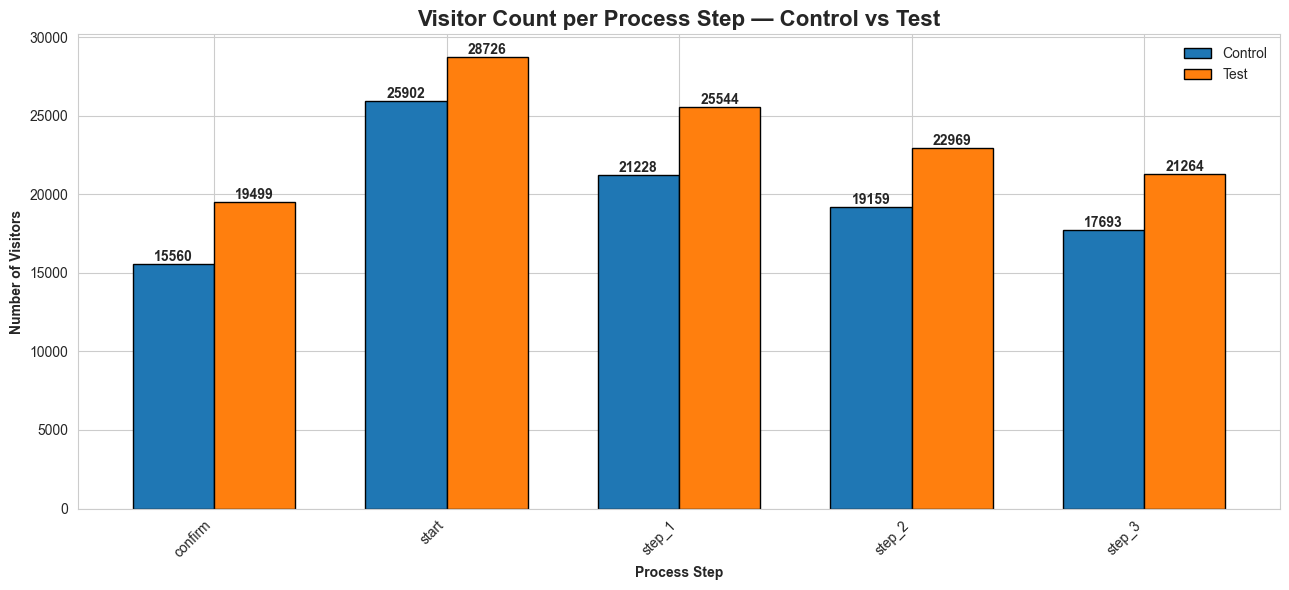

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# 1. Prepare data
# -----------------------------
df_plot = df_main[['visitor_id', 'process_step', 'test_group']].dropna()

# keep only Control & Test
df_plot = df_plot[df_plot['test_group'].isin(['Control', 'Test'])]

# unique visitors per step per group
visitor_counts = (
    df_plot
    .groupby(['process_step', 'test_group'])['visitor_id']
    .nunique()
    .reset_index()
)

# pivot for plotting
pivot_df = visitor_counts.pivot(
    index='process_step',
    columns='test_group',
    values='visitor_id'
).fillna(0)

# -----------------------------
# 2. Plot
# -----------------------------
fig, ax = plt.subplots(figsize=(13, 6))

x = np.arange(len(pivot_df.index))
width = 0.35

bars_control = ax.bar(
    x - width/2,
    pivot_df['Control'],
    width,
    label='Control',
    color='#1f77b4',
    edgecolor='black'
)

bars_test = ax.bar(
    x + width/2,
    pivot_df['Test'],
    width,
    label='Test',
    color='#ff7f0e',
    edgecolor='black'
)

ax.set_title('Visitor Count per Process Step — Control vs Test',
             fontsize=16, fontweight='bold')

ax.set_xlabel('Process Step', fontweight='bold')
ax.set_ylabel('Number of Visitors', fontweight='bold')

ax.set_xticks(x)
ax.set_xticklabels(pivot_df.index, rotation=45, ha='right')

# -----------------------------
# 3. Add labels
# -----------------------------
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width()/2,
            height,
            f'{int(height)}',
            ha='center',
            va='bottom',
            fontweight='bold'
        )

add_labels(bars_control)
add_labels(bars_test)

ax.legend(frameon=False)

plt.tight_layout()
plt.show()


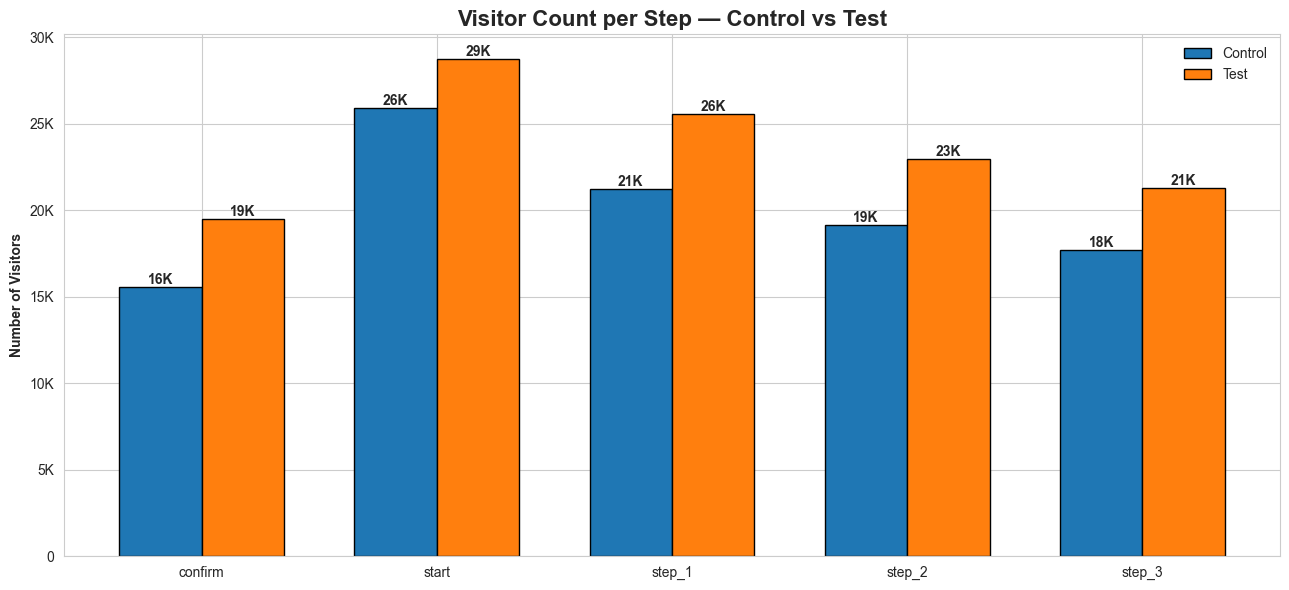

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick

# -----------------------------
# 1. Prepare data
# -----------------------------
df_plot = df_main[['visitor_id', 'process_step', 'test_group']].dropna()

df_plot = df_plot[df_plot['test_group'].isin(['Control', 'Test'])]

visitor_counts = (
    df_plot
    .groupby(['process_step', 'test_group'])['visitor_id']
    .nunique()
    .reset_index()
)

pivot_df = visitor_counts.pivot(
    index='process_step',
    columns='test_group',
    values='visitor_id'
).fillna(0)

# -----------------------------
# 2. Plot
# -----------------------------
fig, ax = plt.subplots(figsize=(13, 6))

x = np.arange(len(pivot_df.index))
width = 0.35

bars_control = ax.bar(
    x - width/2,
    pivot_df['Control'],
    width,
    label='Control',
    color='#1f77b4',
    edgecolor='black'
)

bars_test = ax.bar(
    x + width/2,
    pivot_df['Test'],
    width,
    label='Test',
    color='#ff7f0e',
    edgecolor='black'
)

ax.set_title('Visitor Count per Step — Control vs Test',
             fontsize=16, fontweight='bold')

# ❌ remove x-axis title
ax.set_xlabel('')
ax.set_ylabel('Number of Visitors', fontweight='bold')

# horizontal step names
ax.set_xticks(x)
ax.set_xticklabels(pivot_df.index, rotation=0, ha='center')

# -----------------------------
# 3. Y-axis → K format
# -----------------------------
ax.yaxis.set_major_formatter(
    mtick.FuncFormatter(lambda v, pos: f'{int(v/1000)}K' if v >= 1000 else int(v))
)

# -----------------------------
# 4. Labels above bars → rounded K
# -----------------------------
def format_k(v):
    if v >= 1000:
        return f'{int(round(v/1000))}K'
    return str(int(v))

def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width()/2,
            height,
            format_k(height),
            ha='center',
            va='bottom',
            fontweight='bold'
        )

add_labels(bars_control)
add_labels(bars_test)

ax.legend(frameon=False)

plt.tight_layout()
plt.show()


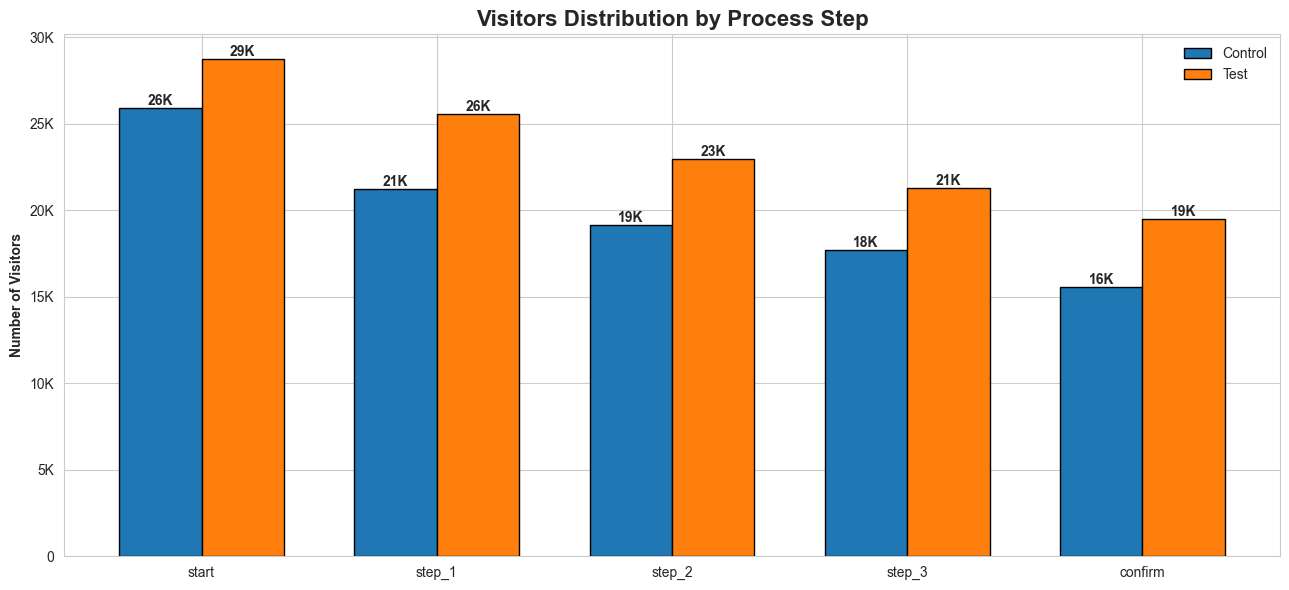

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick

# -----------------------------
# 1. Prepare data
# -----------------------------
df_plot = df_main[['visitor_id', 'process_step', 'test_group']].dropna()
df_plot = df_plot[df_plot['test_group'].isin(['Control', 'Test'])]

visitor_counts = (
    df_plot
    .groupby(['process_step', 'test_group'])['visitor_id']
    .nunique()
    .reset_index()
)

pivot_df = visitor_counts.pivot(
    index='process_step',
    columns='test_group',
    values='visitor_id'
).fillna(0)

# -----------------------------
# ✅ Force funnel order
# -----------------------------
step_order = ['start', 'step_1', 'step_2', 'step_3', 'confirm']

# keep only steps that exist in data
step_order = [s for s in step_order if s in pivot_df.index]

pivot_df = pivot_df.reindex(step_order)

# -----------------------------
# 2. Plot
# -----------------------------
fig, ax = plt.subplots(figsize=(13, 6))

x = np.arange(len(pivot_df.index))
width = 0.35

bars_control = ax.bar(
    x - width/2,
    pivot_df['Control'],
    width,
    label='Control',
    color='#1f77b4',
    edgecolor='black'
)

bars_test = ax.bar(
    x + width/2,
    pivot_df['Test'],
    width,
    label='Test',
    color='#ff7f0e',
    edgecolor='black'
)

ax.set_title('Visitors Distribution by Process Step',
             fontsize=16, fontweight='bold')

ax.set_xlabel('')
ax.set_ylabel('Number of Visitors', fontweight='bold')

# clean horizontal labels
ax.set_xticks(x)
ax.set_xticklabels(pivot_df.index, rotation=0, ha='center')

# -----------------------------
# 3. Y-axis → K format
# -----------------------------
ax.yaxis.set_major_formatter(
    mtick.FuncFormatter(lambda v, pos: f'{int(v/1000)}K' if v >= 1000 else int(v))
)

# -----------------------------
# 4. Labels above bars
# -----------------------------
def format_k(v):
    if v >= 1000:
        return f'{int(round(v/1000))}K'
    return str(int(v))

def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width()/2,
            height,
            format_k(height),
            ha='center',
            va='bottom',
            fontweight='bold'
        )

add_labels(bars_control)
add_labels(bars_test)

ax.legend(frameon=False)

plt.tight_layout()
plt.show()


<hr>

## PLOT 02.5: Clients Balance Distribution by Gender


<style>
h1 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h2 {
    text-align: left;
    color: black;
    font-weight: bold;
}
</style>

<style>
h3 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h4 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>
<hr>

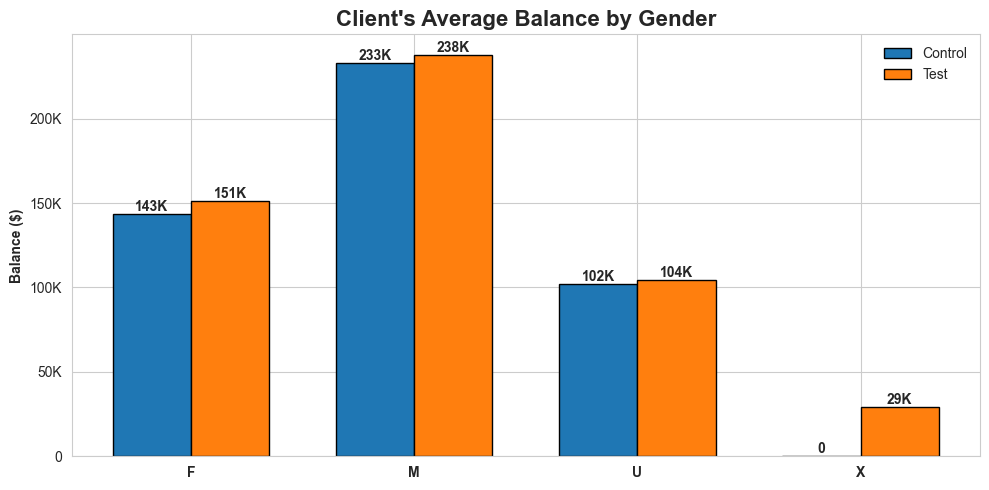

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

# -----------------------------
# 1. Prepare data
# -----------------------------
df_plot = df_main[['gender', 'account_balance', 'test_group']].dropna()

# keep only Control & Test
df_plot = df_plot[df_plot['test_group'].isin(['Control', 'Test'])]

# average balance per gender & group
gender_balance = (
    df_plot
    .groupby(['gender', 'test_group'])['account_balance']
    .mean()
    .reset_index()
)

# pivot for plotting
pivot_df = gender_balance.pivot(
    index='gender',
    columns='test_group',
    values='account_balance'
).fillna(0)

# -----------------------------
# 2. Plot
# -----------------------------
fig, ax = plt.subplots(figsize=(10, 5))

x = np.arange(len(pivot_df.index))
width = 0.35

bars_control = ax.bar(
    x - width/2,
    pivot_df['Control'],
    width,
    label='Control',
    color='#1f77b4',
    edgecolor='black'
)

bars_test = ax.bar(
    x + width/2,
    pivot_df['Test'],
    width,
    label='Test',
    color='#ff7f0e',
    edgecolor='black'
)

ax.set_title("Client's Average Balance by Gender",
             fontsize=16, fontweight='bold')

ax.set_ylabel('Balance ($)', fontweight='bold')

ax.set_xticks(x)
ax.set_xticklabels(pivot_df.index, fontweight='bold')

# -----------------------------
# 3. Y-axis → K format
# -----------------------------
ax.yaxis.set_major_formatter(
    mtick.FuncFormatter(lambda v, pos: f'{int(v/1000)}K' if v >= 1000 else int(v))
)

# -----------------------------
# 4. Labels above bars
# -----------------------------
def format_k(v):
    return f'{int(round(v/1000))}K' if v >= 1000 else str(int(v))

def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width()/2,
            height,
            format_k(height),
            ha='center',
            va='bottom',
            fontweight='bold'
        )

add_labels(bars_control)
add_labels(bars_test)

ax.legend(frameon=False)

plt.tight_layout()
plt.show()


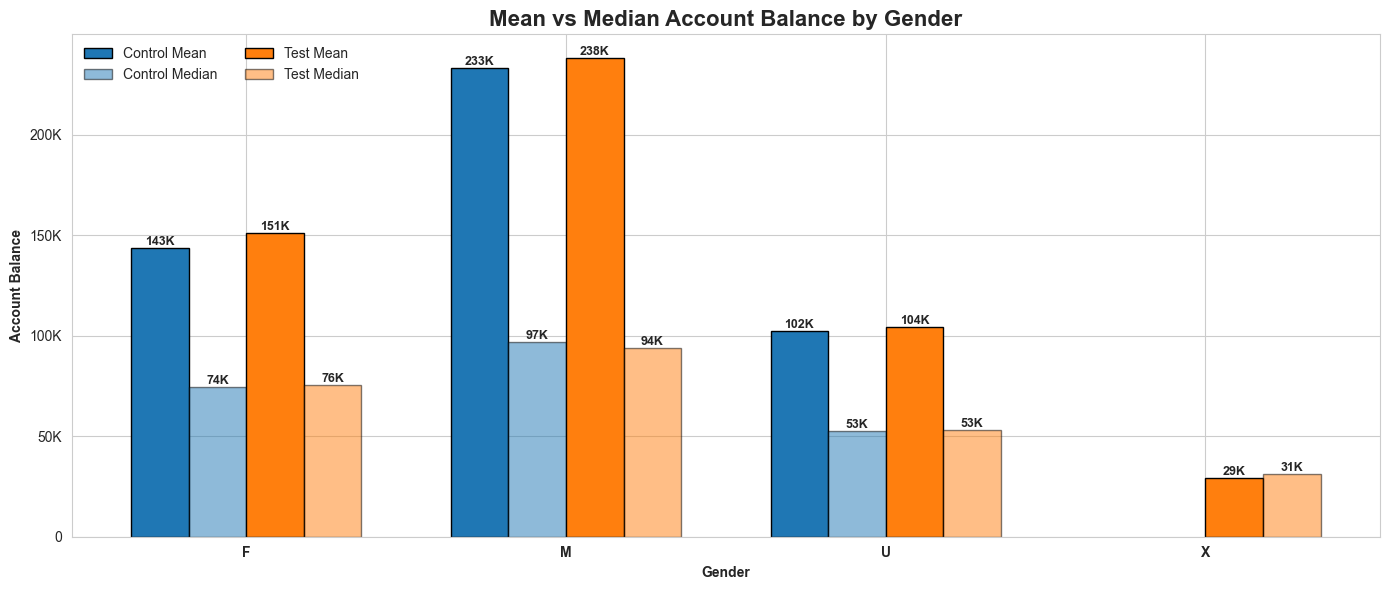

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

# -----------------------------
# 1. Prepare data
# -----------------------------
df_plot = df_main[['gender', 'account_balance', 'test_group']].dropna()
df_plot = df_plot[df_plot['test_group'].isin(['Control', 'Test'])]

# -----------------------------
# 2. Compute mean & median
# -----------------------------
stats_df = (
    df_plot
    .groupby(['gender', 'test_group'])['account_balance']
    .agg(['mean', 'median'])
)

# pivot
mean_df = stats_df['mean'].unstack('test_group')
median_df = stats_df['median'].unstack('test_group')

# ensure same gender order
genders = mean_df.index

# -----------------------------
# 3. Plot
# -----------------------------
x = np.arange(len(genders))
width = 0.18

fig, ax = plt.subplots(figsize=(14, 6))

bars_control_mean = ax.bar(
    x - 1.5*width,
    mean_df.get('Control'),
    width,
    label='Control Mean',
    color='#1f77b4',
    edgecolor='black'
)

bars_control_median = ax.bar(
    x - 0.5*width,
    median_df.get('Control'),
    width,
    label='Control Median',
    color='#1f77b4',
    alpha=0.5,
    edgecolor='black'
)

bars_test_mean = ax.bar(
    x + 0.5*width,
    mean_df.get('Test'),
    width,
    label='Test Mean',
    color='#ff7f0e',
    edgecolor='black'
)

bars_test_median = ax.bar(
    x + 1.5*width,
    median_df.get('Test'),
    width,
    label='Test Median',
    color='#ff7f0e',
    alpha=0.5,
    edgecolor='black'
)

# -----------------------------
# 4. Formatting
# -----------------------------
ax.set_title("Mean vs Median Account Balance by Gender",
             fontsize=16, fontweight='bold')

ax.set_xlabel('Gender', fontweight='bold')
ax.set_ylabel('Account Balance', fontweight='bold')

ax.set_xticks(x)
ax.set_xticklabels(genders, fontweight='bold')

# K formatter without decimals
ax.yaxis.set_major_formatter(
    mtick.FuncFormatter(lambda v, pos: f'{int(v/1000)}K' if v >= 1000 else int(v))
)

# -----------------------------
# 5. Labels
# -----------------------------
def format_k(v):
    if pd.isna(v):
        return ""
    return f'{int(round(v/1000))}K' if v >= 1000 else str(int(v))

def add_labels(bars):
    for bar in bars:
        h = bar.get_height()
        if pd.notna(h):
            ax.text(
                bar.get_x() + bar.get_width()/2,
                h,
                format_k(h),
                ha='center',
                va='bottom',
                fontsize=9,
                fontweight='bold'
            )

for b in [bars_control_mean, bars_control_median, bars_test_mean, bars_test_median]:
    add_labels(b)

ax.legend(frameon=False, ncol=2)

plt.tight_layout()
plt.show()


<hr>

## PLOT 03: Clients Age Distribution by gender


<style>
h1 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h2 {
    text-align: left;
    color: black;
    font-weight: bold;
}
</style>

<style>
h3 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h4 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>
<hr>

C:\Users\sboub\AppData\Local\Temp\ipykernel_2532\3204550642.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_vanguard_ab_test, x='gender', y='client_age',


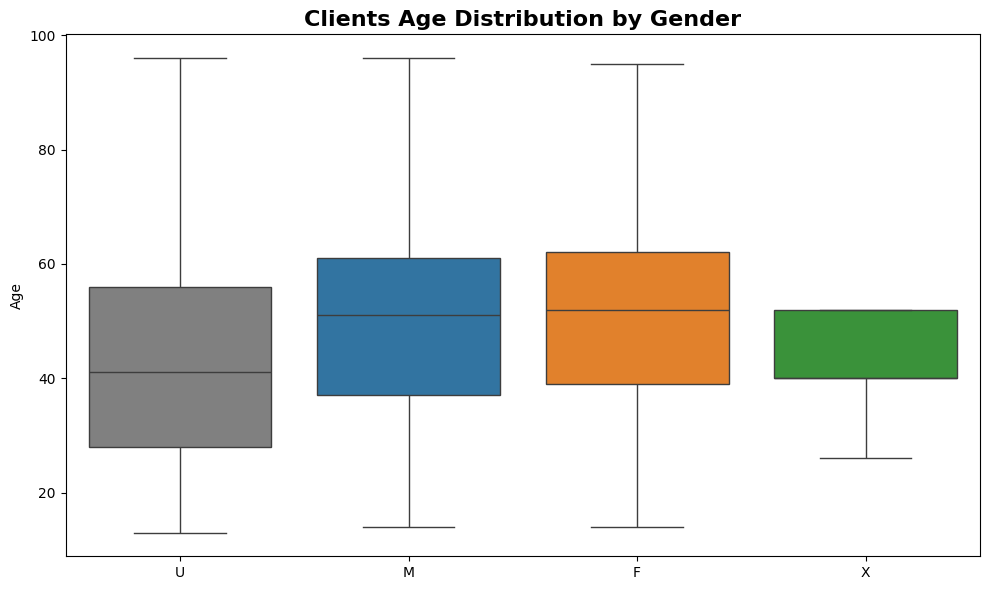

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(data=df_vanguard_ab_test, x='gender', y='client_age', 
            palette={'F':'#ff7f0e','M':'#1f77b4','X':'#2ca02c','U':'grey'})

plt.title('Clients Age Distribution by Gender', fontsize=16, fontweight='bold')
plt.xlabel('')
plt.ylabel('Age')
plt.tight_layout()
plt.show()


<hr>

## PLOT 04: Account Balance Distribution by gender


<style>
h1 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h2 {
    text-align: left;
    color: black;
    font-weight: bold;
}
</style>

<style>
h3 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h4 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>
<hr>

C:\Users\sboub\AppData\Local\Temp\ipykernel_2532\2484043273.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_vanguard_ab_test, x='gender', y='account_balance',


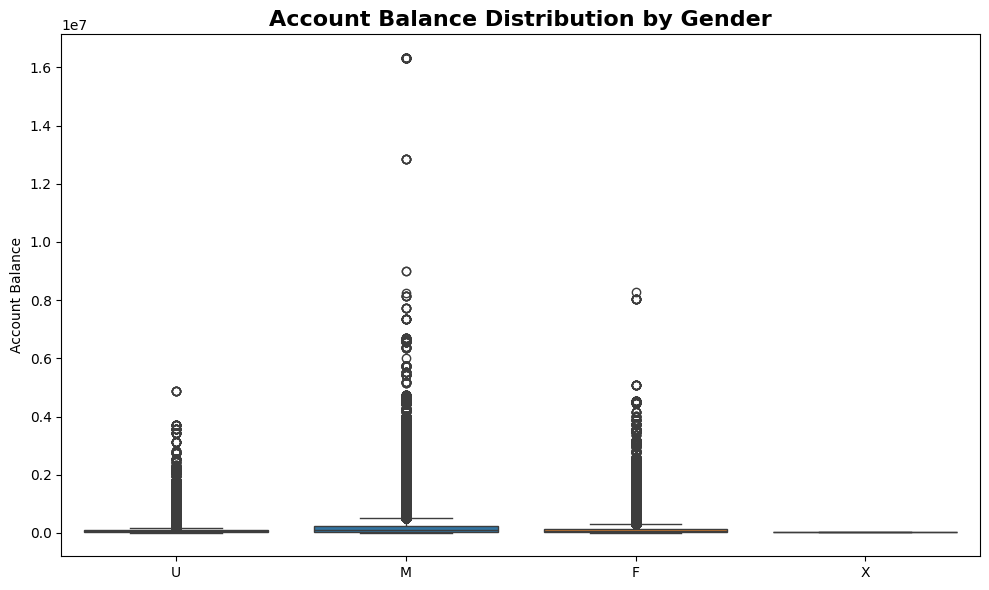

In [68]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_vanguard_ab_test, x='gender', y='account_balance',
            palette={'F':'#ff7f0e','M':'#1f77b4','X':'#2ca02c','U':'grey'})
plt.title('Account Balance Distribution by Gender', fontsize=16, fontweight='bold')
plt.xlabel('')
plt.ylabel('Account Balance')
plt.tight_layout()
plt.show()


<hr>

## PLOT 05: Account Balance Distribution by age


<style>
h1 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h2 {
    text-align: left;
    color: black;
    font-weight: bold;
}
</style>

<style>
h3 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h4 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>
<hr>

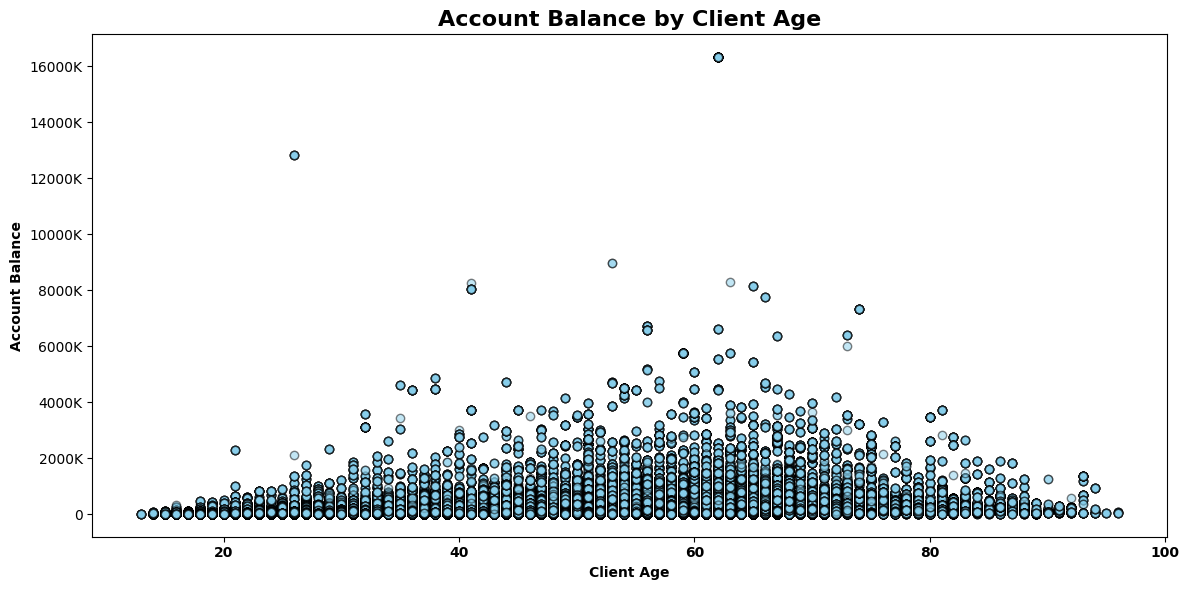

In [69]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Drop rows with missing values
df_plot = df_vanguard_ab_test[['client_age','account_balance']].dropna()

plt.figure(figsize=(12,6))
plt.scatter(df_plot['client_age'], df_plot['account_balance'], alpha=0.5, color='skyblue', edgecolor='black')

plt.title('Account Balance by Client Age', fontsize=16, fontweight='bold')
plt.xlabel('Client Age', fontweight='bold')
plt.ylabel('Account Balance', fontweight='bold')

# Format y-axis in K
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda n, pos: f'{int(n/1000)}K' if n >= 1000 else int(n)))

# Make x-axis ticks bold
plt.xticks(fontweight='bold')

plt.tight_layout()
plt.show()


<hr>

## PLOT 06: Average Account Balance Distribution by age


<style>
h1 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h2 {
    text-align: left;
    color: black;
    font-weight: bold;
}
</style>

<style>
h3 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h4 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>
<hr>

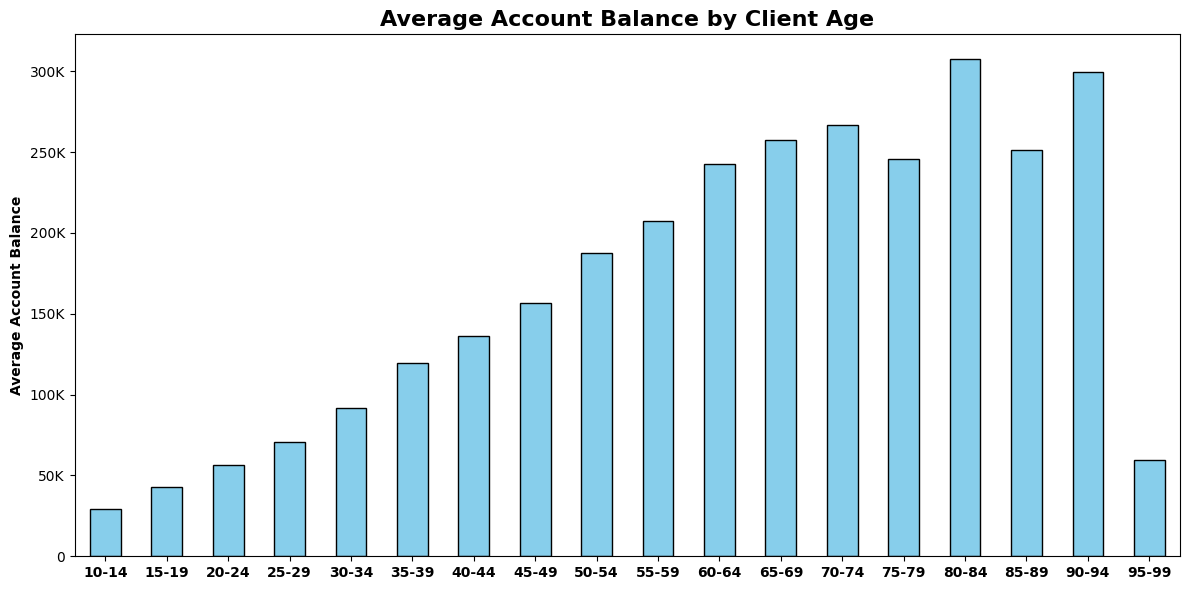

In [70]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd

# Drop missing values
df_plot = df_vanguard_ab_test[['client_age','account_balance']].dropna()

# Create 5-year age bins
bins = np.arange(10, 101, 5)
labels = [f'{b}-{b+4}' for b in bins[:-1]]
df_plot['age_bin'] = pd.cut(df_plot['client_age'], bins=bins, labels=labels, include_lowest=True)

# Compute average account_balance per age bin
avg_balance = df_plot.groupby('age_bin')['account_balance'].mean()

# Plot bar chart
fig, ax = plt.subplots(figsize=(12,6))
avg_balance.plot(kind='bar', color='skyblue', edgecolor='black', ax=ax)

# Add title
ax.set_title('Average Account Balance by Client Age', fontsize=16, fontweight='bold')

# X-axis labels bold
ax.set_xticklabels(avg_balance.index, rotation=0, fontweight='bold')
ax.set_xlabel('')
ax.set_ylabel('Average Account Balance', fontweight='bold')

# Format y-axis in K
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda n, pos: f'{int(n/1000)}K' if n >= 1000 else int(n)))

plt.tight_layout()
plt.show()


<hr>

## PLOT 07: Distribution of Account Balance by age v1


<style>
h1 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h2 {
    text-align: left;
    color: black;
    font-weight: bold;
}
</style>

<style>
h3 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h4 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>
<hr>

In [77]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd

# Drop missing values
df_plot = df_vanguard_ab_test[['client_age', 'account_balance']].dropna()

# Define custom age bins and labels
bins = [0, 18, 30, 40, 50, 60, 70, np.inf]  # np.inf covers 70+
labels = ['<18', '18-30', '30-40', '40-50', '50-60', '60-70', '70+']

# Bin the ages
df_plot['age_group'] = pd.cut(df_plot['client_age'], bins=bins, labels=labels, right=False)

# Aggregate total account balance per age group
age_group_balance = df_plot.groupby('age_group')['account_balance'].sum().reindex(labels)

# Plot histogram (bar plot since we have custom bins)
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(age_group_balance.index, age_group_balance.values, edgecolor='black', color='#1f77b4')

# Titles and labels
ax.set_title('Distribution of Account Balance by Age Group', fontsize=16, fontweight='bold')
ax.set_xlabel('Age Group', fontweight='bold')
ax.set_ylabel('Total Account Balance (K)', fontweight='bold')

# Format y-axis in thousands
ax.yaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x, pos: f'{x*1e-3:.0f}K')
)

plt.tight_layout()
plt.show()


NameError: name 'df_vanguard_ab_test' is not defined

<hr>

## PLOT 07: Distribution of Account Balance by age v2


<style>
h1 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h2 {
    text-align: left;
    color: black;
    font-weight: bold;
}
</style>

<style>
h3 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h4 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>
<hr>

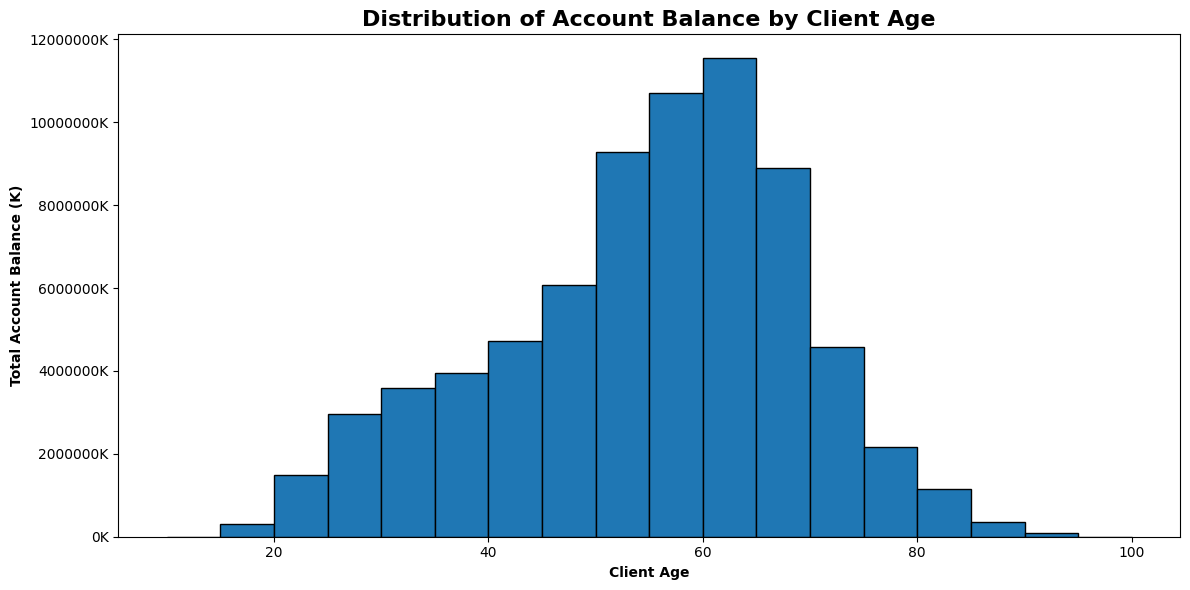

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd

# Drop missing values
df_plot = df_vanguard_ab_test[['client_age', 'account_balance']].dropna()

# Create 5-year age bins
bins = np.arange(10, 101, 5)

# Plot histogram
fig, ax = plt.subplots(figsize=(12, 6))

ax.hist(
    df_plot['client_age'],
    bins=bins,
    weights=df_plot['account_balance'],
    edgecolor='black'
)

# Titles and labels
ax.set_title('Distribution of Account Balance by Client Age', fontsize=16, fontweight='bold')
ax.set_xlabel('Client Age', fontweight='bold')
ax.set_ylabel('Total Account Balance (K)', fontweight='bold')

# ✅ Format y-axis in thousands (K)
ax.yaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x, pos: f'{x/1000:.0f}K')
)

plt.tight_layout()
plt.show()


<hr>

## PLOT 08.5: Average Time Spent on each Process Step by Test Group  


<style>
h1 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h2 {
    text-align: left;
    color: black;
    font-weight: bold;
}
</style>

<style>
h3 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h4 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>
<hr>

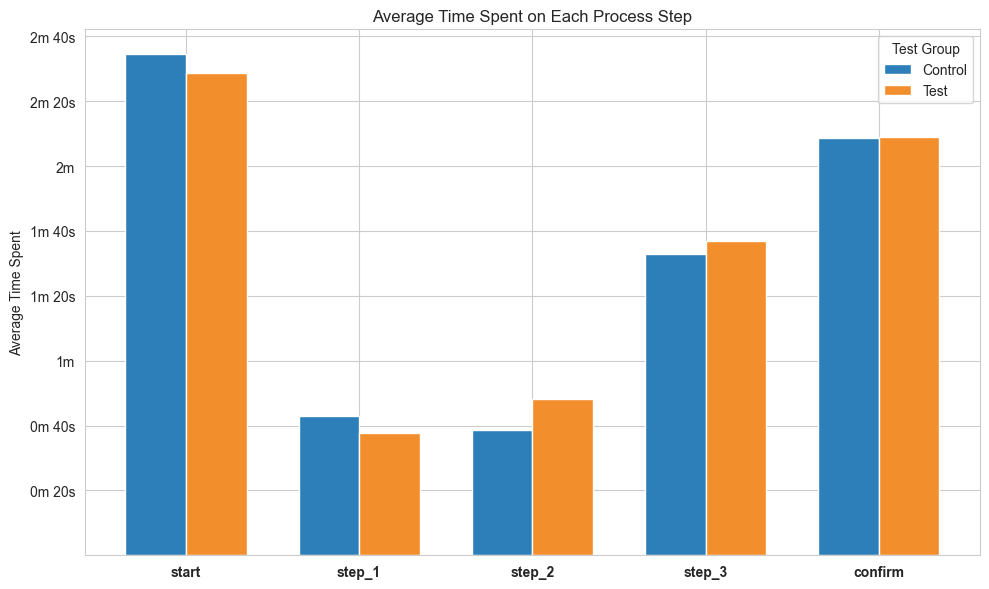

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick

# ===============================
# Load cleaned dataset
# ===============================
df = pd.read_csv("../data/clean/df_vanguard_ab_test_clean_v2.csv")

# ===============================
# Enforce process step order
# ===============================
step_order = ['start', 'step_1', 'step_2', 'step_3', 'confirm']

df['process_step'] = pd.Categorical(
    df['process_step'],
    categories=step_order,
    ordered=True
)

# ===============================
# Create datetime column
# ===============================
df['datetime'] = pd.to_datetime(
    df['date'].astype(str) + ' ' + df['time'].astype(str)
)

# ===============================
# Sort and calculate time spent
# ===============================
df = df.sort_values(by=['visitor_id', 'visit_id', 'datetime'])

df['time_spent_sec'] = (
    df.groupby(['visitor_id', 'visit_id'])['datetime']
      .diff()
      .dt.total_seconds()
)

# Drop first step of each visit (no previous step)
df = df.dropna(subset=['time_spent_sec'])

# ===============================
# Average time per step & test group
# ===============================
avg_time = (
    df.groupby(['process_step', 'test_group'], observed=True)['time_spent_sec']
      .mean()
      .reset_index()
)

# ===============================
# Add numeric step order (Tableau-safe)
# ===============================
step_order_map = {
    'start': 1,
    'step_1': 2,
    'step_2': 3,
    'step_3': 4,
    'confirm': 5
}

avg_time['step_order'] = avg_time['process_step'].map(step_order_map)

# ===============================
# Save for Tableau
# ===============================
avg_time.to_csv(
    "../data/clean/avg_time_spent_by_step_and_group.csv",
    index=False
)

# ===============================
# Pivot for plotting
# ===============================
avg_time_pivot = avg_time.pivot(
    index='process_step',
    columns='test_group',
    values='time_spent_sec'
)

# ===============================
# Plot
# ===============================
plot_order = ['Control', 'Test']
colors_map = {
    'Control': '#2c7fb8',
    'Test': '#f28e2b',
    'grey': '#a0a0a0'
}

fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(avg_time_pivot))
width = 0.35

for i, group in enumerate(plot_order):
    values = avg_time_pivot[group] if group in avg_time_pivot else pd.Series(
        [np.nan] * len(avg_time_pivot),
        index=avg_time_pivot.index
    )

    bar_colors = [
        colors_map['grey'] if pd.isna(v) else colors_map[group]
        for v in values
    ]

    ax.bar(
        x + i * width,
        values.fillna(0),
        width,
        label=group,
        color=bar_colors
    )

# ===============================
# Axes formatting
# ===============================
ax.set_xticks(x + width / 2)
ax.set_xticklabels(avg_time_pivot.index, fontweight='bold')

def sec_to_min_sec(x, pos=None):
    if x == 0:
        return ""
    minutes = int(x // 60)
    seconds = int(x % 60)
    return f"{minutes}m" if seconds == 0 else f"{minutes}m {seconds}s"

ax.yaxis.set_major_formatter(mtick.FuncFormatter(sec_to_min_sec))

ax.set_ylabel("Average Time Spent")
ax.set_title("Average Time Spent on Each Process Step")
ax.legend(title="Test Group")

plt.tight_layout()
plt.show()


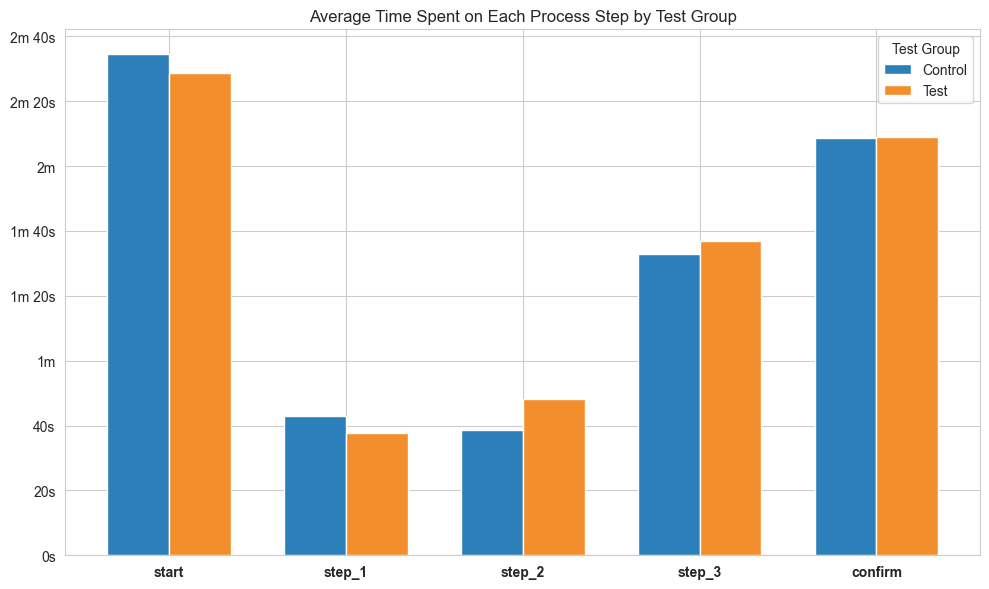

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick

# ===============================
# Load cleaned dataset
# ===============================
df = pd.read_csv("../data/clean/df_vanguard_ab_test_clean_v2.csv")

# ===============================
# Enforce process step order
# ===============================
step_order = ['start', 'step_1', 'step_2', 'step_3', 'confirm']

df['process_step'] = pd.Categorical(
    df['process_step'],
    categories=step_order,
    ordered=True
)

# ===============================
# Create datetime column
# ===============================
df['datetime'] = pd.to_datetime(
    df['date'].astype(str) + ' ' + df['time'].astype(str)
)

# ===============================
# Sort and calculate time spent
# ===============================
df = df.sort_values(by=['visitor_id', 'visit_id', 'datetime'])

df['time_spent_sec'] = (
    df.groupby(['visitor_id', 'visit_id'])['datetime']
      .diff()
      .dt.total_seconds()
)

# Drop first step of each visit (no previous step)
df = df.dropna(subset=['time_spent_sec'])

# ===============================
# Average time per step & test group
# ===============================
avg_time = (
    df.groupby(['process_step', 'test_group'], observed=True)['time_spent_sec']
      .mean()
      .reset_index()
)

# ===============================
# Add numeric step order (Tableau-safe)
# ===============================
step_order_map = {
    'start': 1,
    'step_1': 2,
    'step_2': 3,
    'step_3': 4,
    'confirm': 5
}

avg_time['step_order'] = avg_time['process_step'].map(step_order_map)

# ===============================
# Save for Tableau
# ===============================
avg_time.to_csv(
    "../data/clean/avg_time_spent_by_step_and_group.csv",
    index=False
)

# ===============================
# Pivot for plotting
# ===============================
avg_time_pivot = avg_time.pivot(
    index='process_step',
    columns='test_group',
    values='time_spent_sec'
)

# ===============================
# Plot
# ===============================
plot_order = ['Control', 'Test']
colors_map = {
    'Control': '#2c7fb8',
    'Test': '#f28e2b',
    'grey': '#a0a0a0'
}

fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(avg_time_pivot))
width = 0.35

for i, group in enumerate(plot_order):
    values = avg_time_pivot[group] if group in avg_time_pivot else pd.Series(
        [np.nan] * len(avg_time_pivot),
        index=avg_time_pivot.index
    )

    bar_colors = [
        colors_map['grey'] if pd.isna(v) else colors_map[group]
        for v in values
    ]

    ax.bar(
        x + i * width,
        values.fillna(0),
        width,
        label=group,
        color=bar_colors
    )

# ===============================
# Axes formatting
# ===============================
ax.set_xticks(x + width / 2)
ax.set_xticklabels(avg_time_pivot.index, fontweight='bold')

# New formatter for your requirements
def sec_to_min_sec(x, pos=None):
    seconds = int(x % 60)
    minutes = int(x // 60)
    
    if minutes == 0 and seconds == 0:
        return "0s"
    elif minutes == 0:
        return f"{seconds}s"
    elif seconds == 0:
        return f"{minutes}m"
    else:
        return f"{minutes}m {seconds}s"

ax.yaxis.set_major_formatter(mtick.FuncFormatter(sec_to_min_sec))

ax.set_title("Average Time Spent on Each Process Step by Test Group")
ax.legend(title="Test Group")

plt.tight_layout()
plt.show()


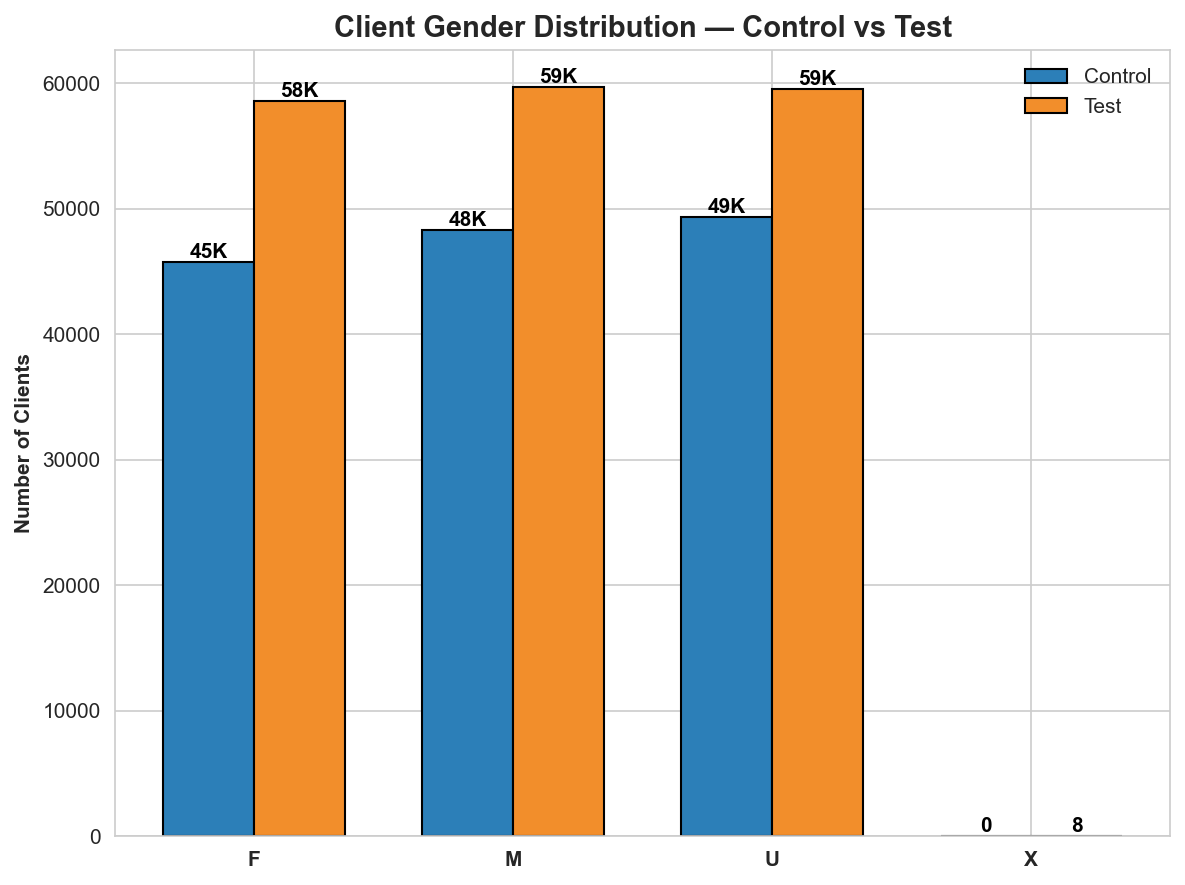

In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick

# -----------------------------
# 1. Prepare data
# -----------------------------
df_plot = df_main[['gender', 'test_group']].dropna()
df_plot = df_plot[df_plot['test_group'].isin(['Control', 'Test'])]

# Count clients by gender and test group
counts = df_plot.groupby(['gender', 'test_group']).size().unstack(fill_value=0)
genders = counts.index.tolist()

# -----------------------------
# 2. Plot grouped bar chart
# -----------------------------
x = np.arange(len(genders))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 6), dpi=150)  # high-res

bars_control = ax.bar(
    x - width/2,
    counts['Control'],
    width,
    color='#2c7fb8',
    edgecolor='black',
    label='Control'
)

bars_test = ax.bar(
    x + width/2,
    counts['Test'],
    width,
    color='#f28e2b',
    edgecolor='black',
    label='Test'
)

# -----------------------------
# 3. Add numbers above bars
# -----------------------------
def format_count(n):
    return f"{int(n/1000)}K" if n >= 1000 else str(int(n))

for bar_group in [bars_control, bars_test]:
    for bar in bar_group:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width()/2,
            height + 2,  # offset above bar
            format_count(height),
            ha='center',
            va='bottom',
            fontweight='bold',
            color='black'
        )

# -----------------------------
# 4. Formatting
# -----------------------------
ax.set_xticks(x)
ax.set_xticklabels(genders, fontweight='bold')
ax.set_ylabel("Number of Clients", fontweight='bold')
ax.set_title("Client Gender Distribution — Control vs Test", fontsize=14, fontweight='bold')
ax.legend(frameon=False)

plt.tight_layout()
plt.show()


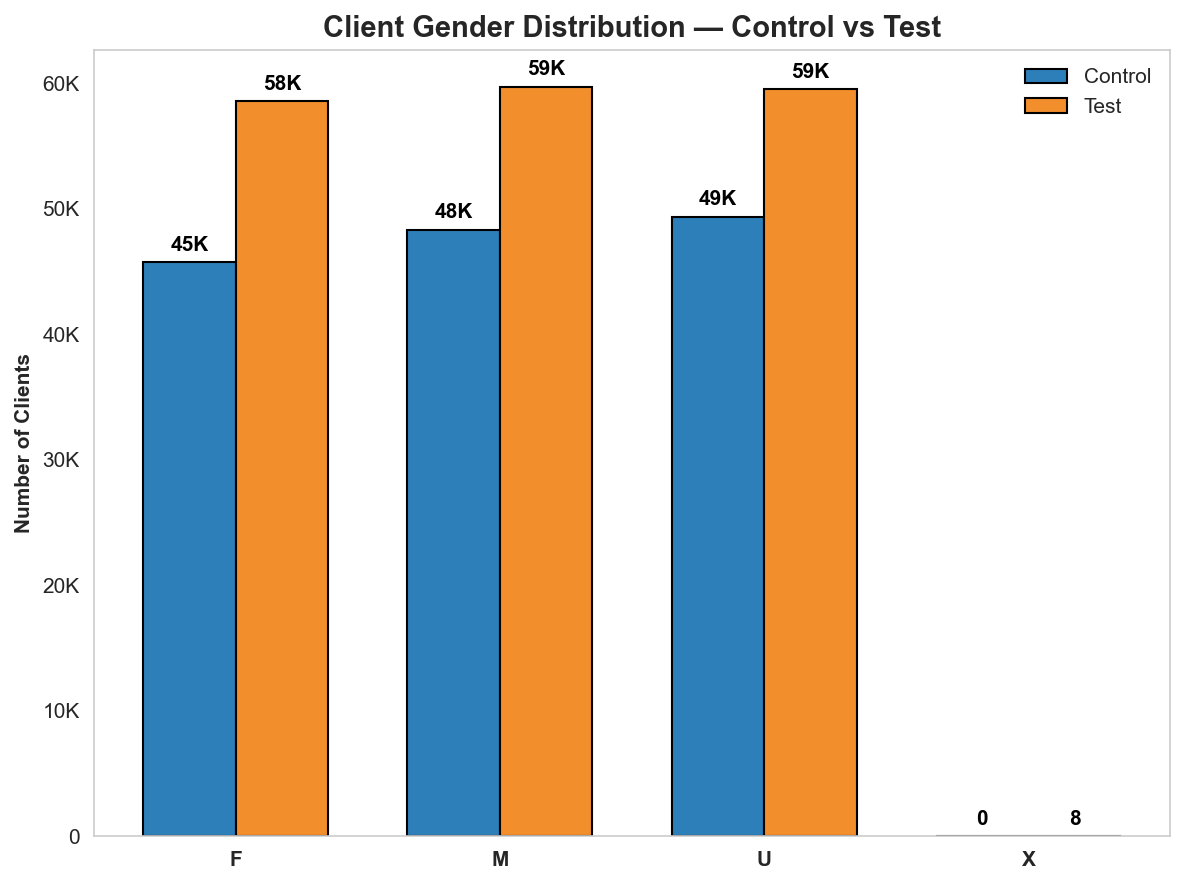

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick

# -----------------------------
# 1. Prepare data
# -----------------------------
df_plot = df_main[['gender', 'test_group']].dropna()
df_plot = df_plot[df_plot['test_group'].isin(['Control', 'Test'])]

# Count clients by gender and test group
counts = df_plot.groupby(['gender', 'test_group']).size().unstack(fill_value=0)
genders = counts.index.tolist()

# -----------------------------
# 2. Plot grouped bar chart
# -----------------------------
x = np.arange(len(genders))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 6), dpi=150)  # high-res

bars_control = ax.bar(
    x - width/2,
    counts['Control'],
    width,
    color='#2c7fb8',
    edgecolor='black',
    label='Control'
)

bars_test = ax.bar(
    x + width/2,
    counts['Test'],
    width,
    color='#f28e2b',
    edgecolor='black',
    label='Test'
)

# -----------------------------
# 3. Add numbers above bars
# -----------------------------
def format_k(n, pos=None):
    if n >= 1000:
        return f'{int(n/1000)}K'
    return str(int(n))

for bar_group in [bars_control, bars_test]:
    for bar in bar_group:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width()/2,
            height + max(counts.values.flatten())*0.01,  # small offset above bar
            format_k(height),
            ha='center',
            va='bottom',
            fontweight='bold',
            color='black'
        )

# -----------------------------
# 4. Formatting
# -----------------------------
ax.set_xticks(x)
ax.set_xticklabels(genders, fontweight='bold')
ax.set_ylabel("Number of Clients", fontweight='bold')
ax.set_title("Client Gender Distribution — Control vs Test", fontsize=14, fontweight='bold')
ax.legend(frameon=False)

# Apply K-format to y-axis and remove gridlines
ax.yaxis.set_major_formatter(mtick.FuncFormatter(format_k))
ax.grid(False)

plt.tight_layout()
plt.show()


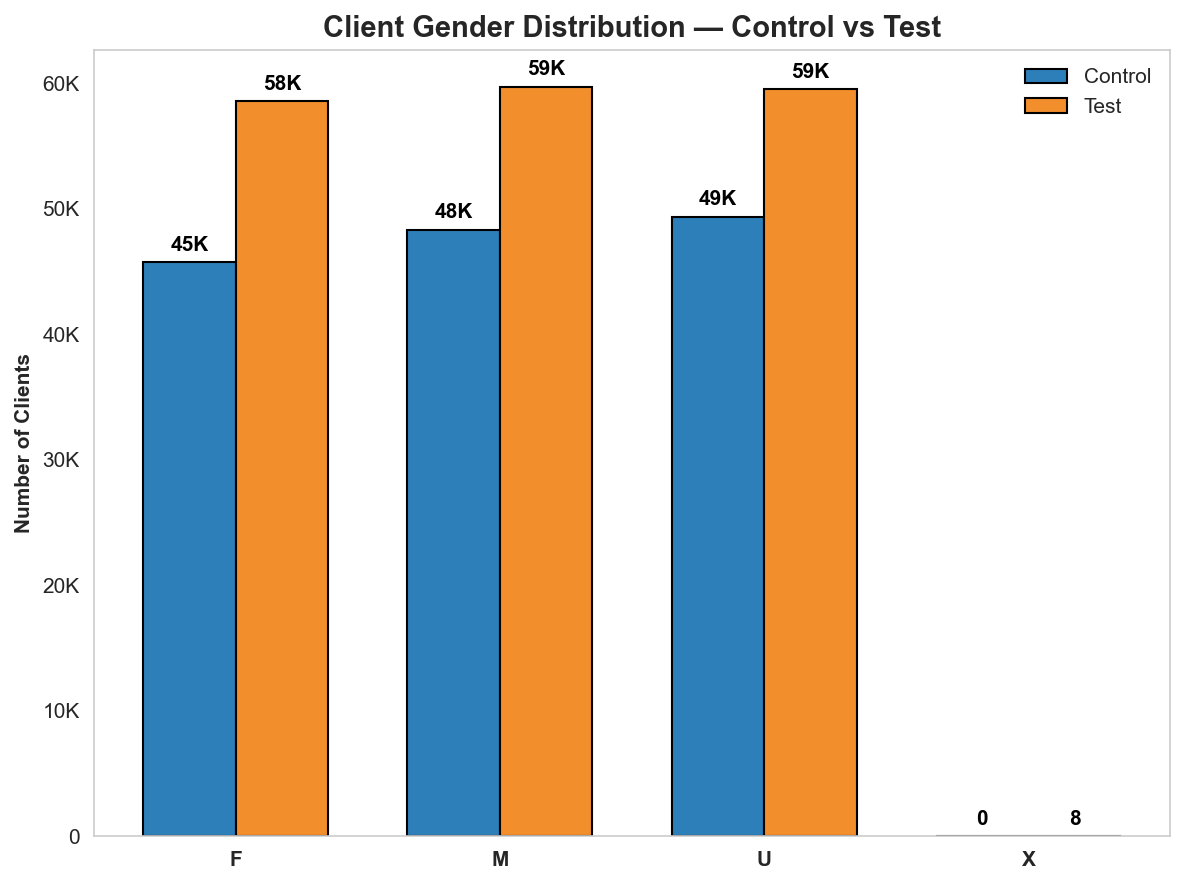

In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick

# -----------------------------
# 1. Prepare data
# -----------------------------
df_plot = df_main[['gender', 'test_group']].dropna()
df_plot = df_plot[df_plot['test_group'].isin(['Control', 'Test'])]

# Count clients by gender and test group
counts = df_plot.groupby(['gender', 'test_group']).size().unstack(fill_value=0)
genders = counts.index.tolist()

# -----------------------------
# 2. Plot grouped bar chart
# -----------------------------
x = np.arange(len(genders))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 6), dpi=150)  # high-res

bars_control = ax.bar(
    x - width/2,
    counts['Control'],
    width,
    color='#2c7fb8',
    edgecolor='black',
    label='Control'
)

bars_test = ax.bar(
    x + width/2,
    counts['Test'],
    width,
    color='#f28e2b',
    edgecolor='black',
    label='Test'
)

# -----------------------------
# 3. Add numbers above bars
# -----------------------------
def format_k(n, pos=None):
    if n >= 1000:
        return f'{int(n/1000)}K'
    return str(int(n))

for bar_group in [bars_control, bars_test]:
    for bar in bar_group:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width()/2,
            height + max(counts.values.flatten())*0.01,  # small offset above bar
            format_k(height),
            ha='center',
            va='bottom',
            fontweight='bold',
            color='black'
        )

# -----------------------------
# 4. Formatting
# -----------------------------
ax.set_xticks(x)
ax.set_xticklabels(genders, fontweight='bold')
ax.set_ylabel("Number of Clients", fontweight='bold')
ax.set_title("Client Gender Distribution — Control vs Test", fontsize=14, fontweight='bold')
ax.legend(frameon=False)

# Apply K-format to y-axis and remove gridlines
ax.yaxis.set_major_formatter(mtick.FuncFormatter(format_k))
ax.grid(False)

plt.tight_layout()
plt.show()


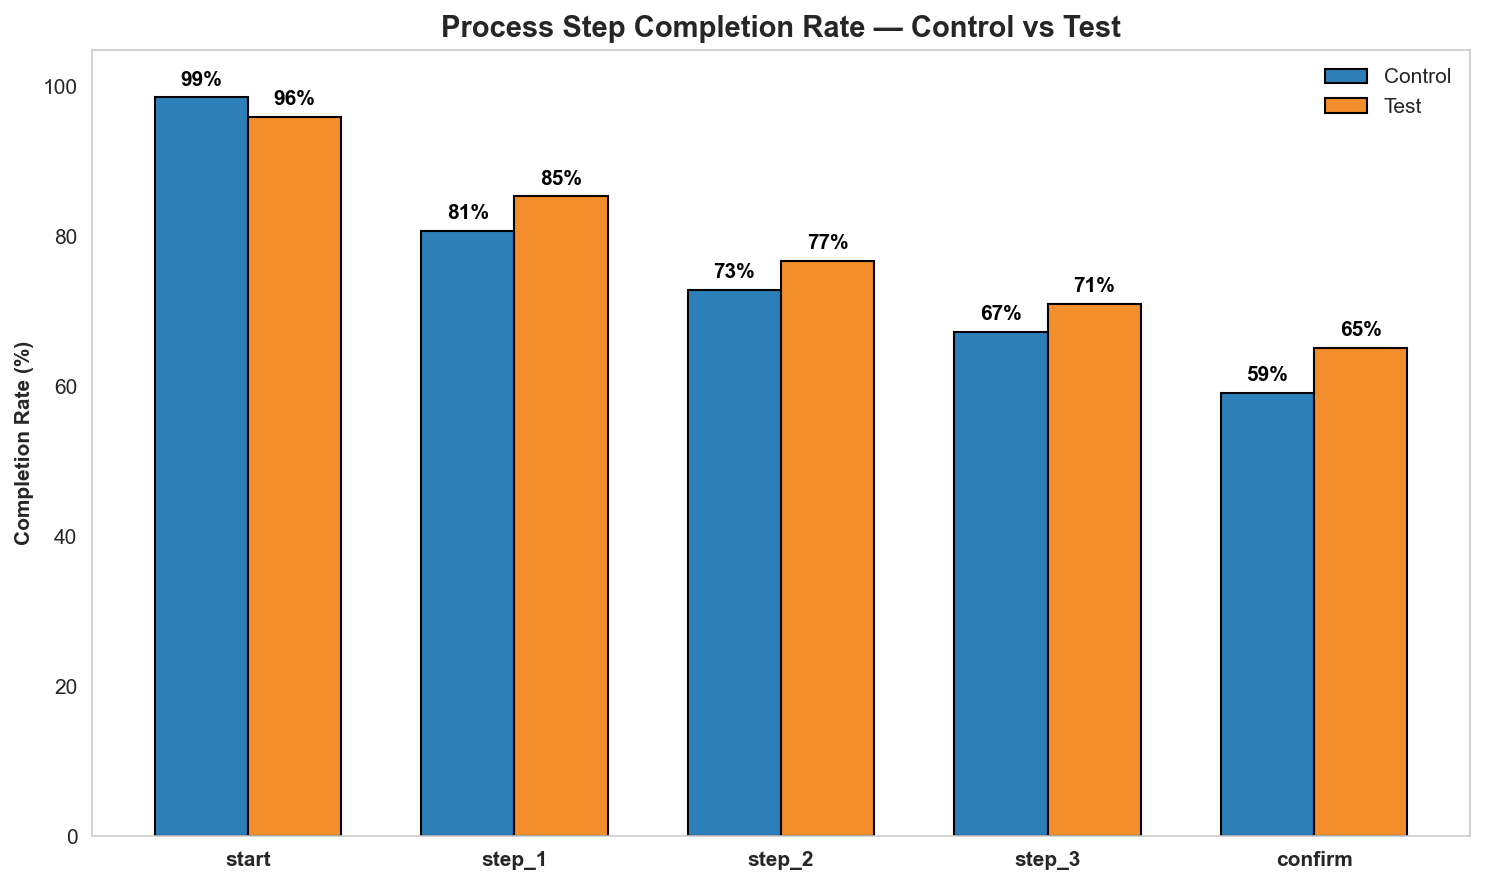

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick

# -----------------------------
# 1. Prepare data
# -----------------------------
# Keep only relevant columns
df_plot = df_main[['visitor_id', 'visit_id', 'process_step', 'test_group']].dropna()
df_plot = df_plot[df_plot['test_group'].isin(['Control', 'Test'])]

# Enforce process step order
step_order = ['start', 'step_1', 'step_2', 'step_3', 'confirm']
df_plot['process_step'] = pd.Categorical(df_plot['process_step'], categories=step_order, ordered=True)

# Count total visitors per group
total_visitors = df_plot.groupby('test_group')['visitor_id'].nunique()

# Count completed per step per group
completion_counts = df_plot.groupby(['process_step', 'test_group'])['visitor_id'].nunique().unstack(fill_value=0)

# Calculate completion rate (%)
completion_rate = completion_counts.divide(total_visitors, axis=1) * 100

# -----------------------------
# 2. Plot
# -----------------------------
x = np.arange(len(step_order))
width = 0.35

fig, ax = plt.subplots(figsize=(10,6), dpi=150)

bars_control = ax.bar(
    x - width/2,
    completion_rate['Control'],
    width,
    color='#2c7fb8',
    edgecolor='black',
    label='Control'
)

bars_test = ax.bar(
    x + width/2,
    completion_rate['Test'],
    width,
    color='#f28e2b',
    edgecolor='black',
    label='Test'
)

# -----------------------------
# 3. Add numbers above bars
# -----------------------------
for bar_group in [bars_control, bars_test]:
    for bar in bar_group:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width()/2,
            height + 1,  # small offset
            f'{height:.0f}%',  # rounded percentage
            ha='center',
            va='bottom',
            fontweight='bold',
            color='black'
        )

# -----------------------------
# 4. Formatting
# -----------------------------
ax.set_xticks(x)
ax.set_xticklabels(step_order, fontweight='bold')
ax.set_ylabel("Completion Rate (%)", fontweight='bold')
ax.set_ylim(0, 105)  # allow space for labels above bars
ax.set_title("Process Step Completion Rate — Control vs Test", fontsize=14, fontweight='bold')
ax.legend(frameon=False)
ax.grid(False)

plt.tight_layout()
plt.show()


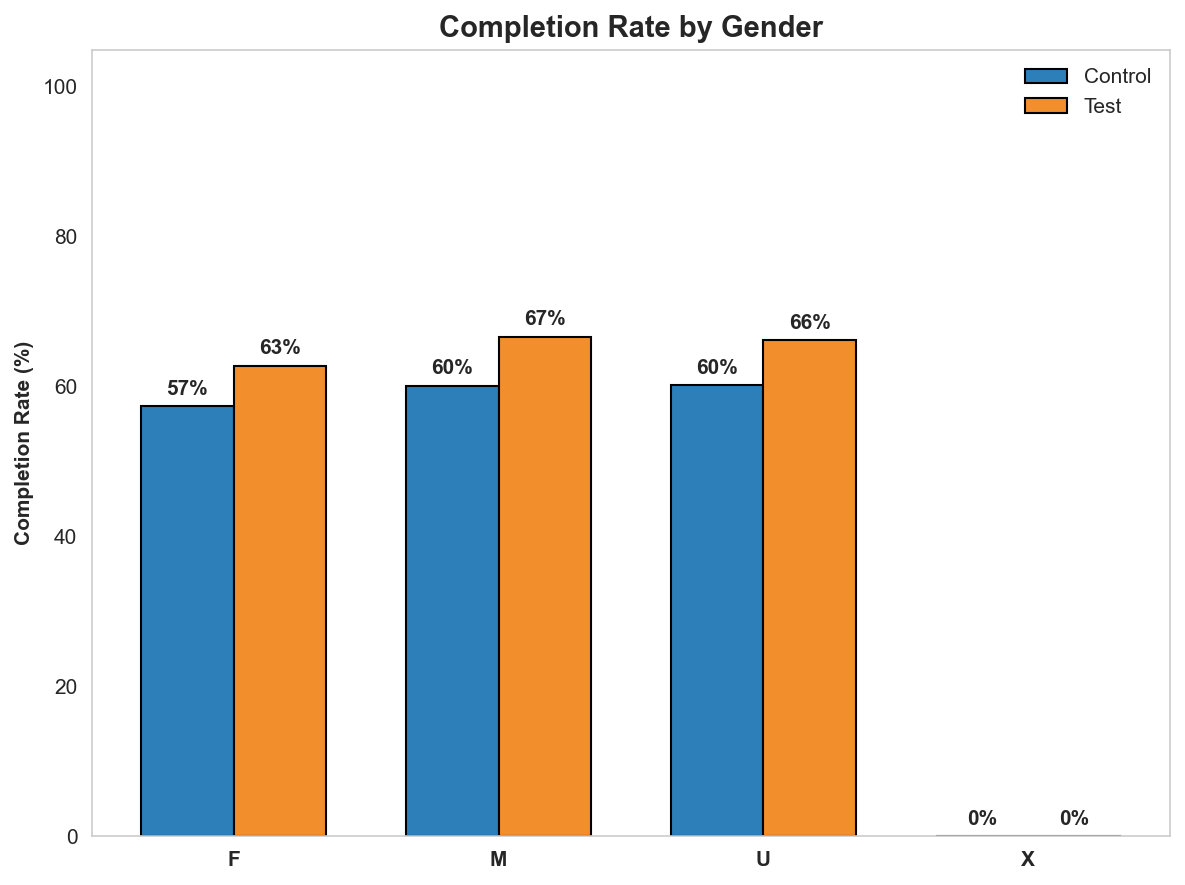

In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# 1. Prepare data
# -----------------------------
# Keep only relevant columns
df_plot = df_main[['visitor_id', 'process_step', 'test_group', 'gender']].dropna()
df_plot = df_plot[df_plot['test_group'].isin(['Control', 'Test'])]

# Define steps in order
step_order = ['start', 'step_1', 'step_2', 'step_3', 'confirm']
df_plot['process_step'] = pd.Categorical(df_plot['process_step'], categories=step_order, ordered=True)

# Total visitors per gender & group
total_visitors = df_plot.groupby(['gender', 'test_group'])['visitor_id'].nunique().unstack(fill_value=0)

# Count visitors who reached "confirm" per gender & group
completed_confirm = df_plot[df_plot['process_step'] == 'confirm'].groupby(['gender', 'test_group'])['visitor_id'].nunique().unstack(fill_value=0)

# Completion rate (%)
completion_rate = (completed_confirm / total_visitors * 100).fillna(0)

# -----------------------------
# 2. Plot
# -----------------------------
genders = completion_rate.index
x = np.arange(len(genders))
width = 0.35

fig, ax = plt.subplots(figsize=(8,6), dpi=150)

bars_control = ax.bar(
    x - width/2,
    completion_rate['Control'],
    width,
    color='#2c7fb8',
    edgecolor='black',
    label='Control'
)

bars_test = ax.bar(
    x + width/2,
    completion_rate['Test'],
    width,
    color='#f28e2b',
    edgecolor='black',
    label='Test'
)

# -----------------------------
# 3. Add numbers above bars
# -----------------------------
for bar_group in [bars_control, bars_test]:
    for bar in bar_group:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width()/2,
            height + 1,  # small offset
            f'{height:.0f}%',
            ha='center',
            va='bottom',
            fontweight='bold'
        )

# -----------------------------
# 4. Formatting
# -----------------------------
ax.set_xticks(x)
ax.set_xticklabels(genders, fontweight='bold')
ax.set_ylabel("Completion Rate (%)", fontweight='bold')
ax.set_ylim(0, 105)
ax.set_title("Completion Rate by Gender", fontsize=14, fontweight='bold')
ax.legend(frameon=False)
ax.grid(False)

plt.tight_layout()
plt.show()


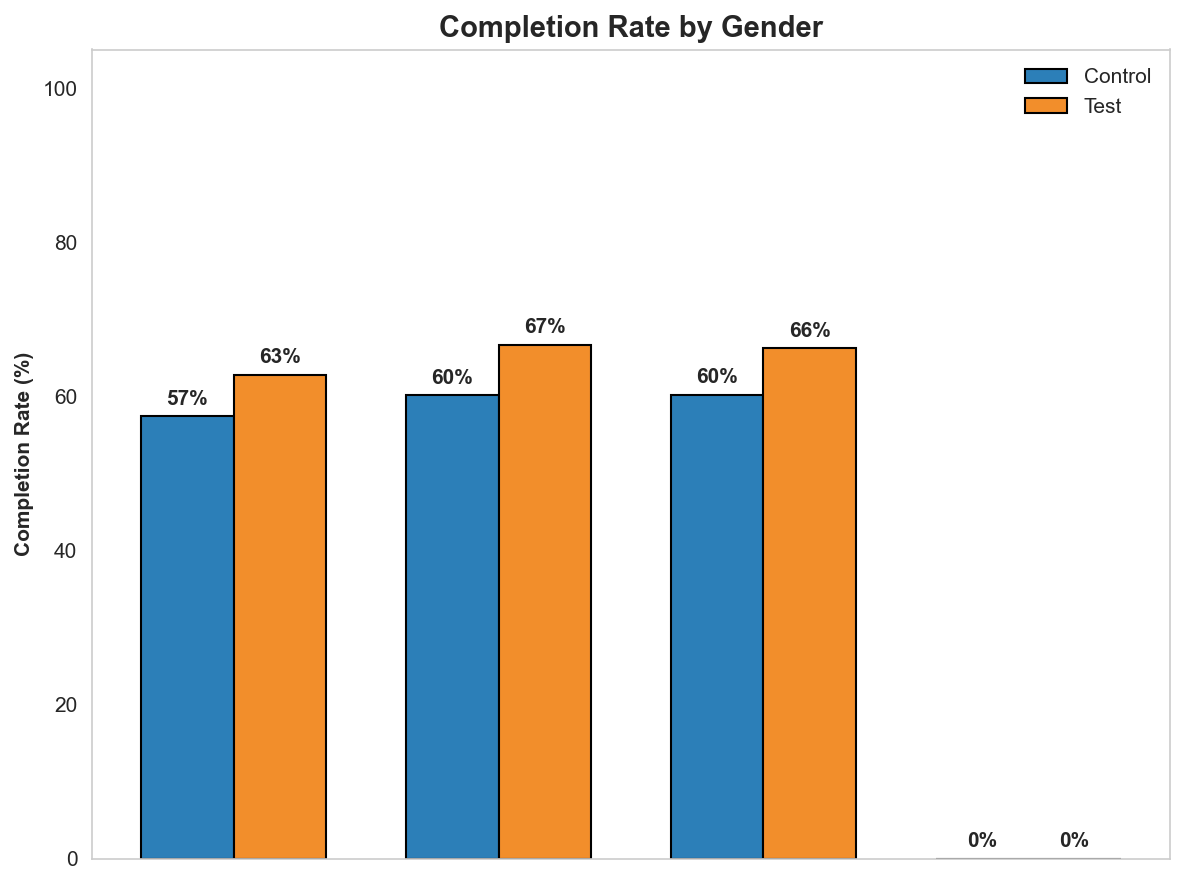

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# 1. Prepare data
# -----------------------------
# Keep only relevant columns
df_plot = df_main[['visitor_id', 'process_step', 'test_group', 'gender']].dropna()
df_plot = df_plot[df_plot['test_group'].isin(['Control', 'Test'])]

# Define steps in order
step_order = ['start', 'step_1', 'step_2', 'step_3', 'confirm']
df_plot['process_step'] = pd.Categorical(df_plot['process_step'], categories=step_order, ordered=True)

# Total visitors per gender & group
total_visitors = df_plot.groupby(['gender', 'test_group'])['visitor_id'].nunique().unstack(fill_value=0)

# Count visitors who reached "confirm" per gender & group
completed_confirm = df_plot[df_plot['process_step'] == 'confirm'].groupby(['gender', 'test_group'])['visitor_id'].nunique().unstack(fill_value=0)

# Completion rate (%)
completion_rate = (completed_confirm / total_visitors * 100).fillna(0)

# -----------------------------
# 2. Plot
# -----------------------------
genders = completion_rate.index
x = np.arange(len(genders))
width = 0.35

fig, ax = plt.subplots(figsize=(8,6), dpi=150)

bars_control = ax.bar(
    x - width/2,
    completion_rate['Control'],
    width,
    color='#2c7fb8',
    edgecolor='black',
    label='Control'
)

bars_test = ax.bar(
    x + width/2,
    completion_rate['Test'],
    width,
    color='#f28e2b',
    edgecolor='black',
    label='Test'
)

# -----------------------------
# 3. Add numbers above bars
# -----------------------------
for bar_group in [bars_control, bars_test]:
    for bar in bar_group:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width()/2,
            height + 1,  # small offset above bar
            f'{height:.0f}%',
            ha='center',
            va='bottom',
            fontweight='bold'
        )

# -----------------------------
# 4. Formatting
# -----------------------------
ax.set_xticks(x)
ax.set_xticklabels([''] * len(genders))  # hide x-axis labels
ax.set_ylabel("Completion Rate (%)", fontweight='bold')
ax.set_ylim(0, 105)
ax.set_title("Completion Rate by Gender", fontsize=14, fontweight='bold')
ax.legend(frameon=False)
ax.grid(False)  # remove gridlines

plt.tight_layout()
plt.show()


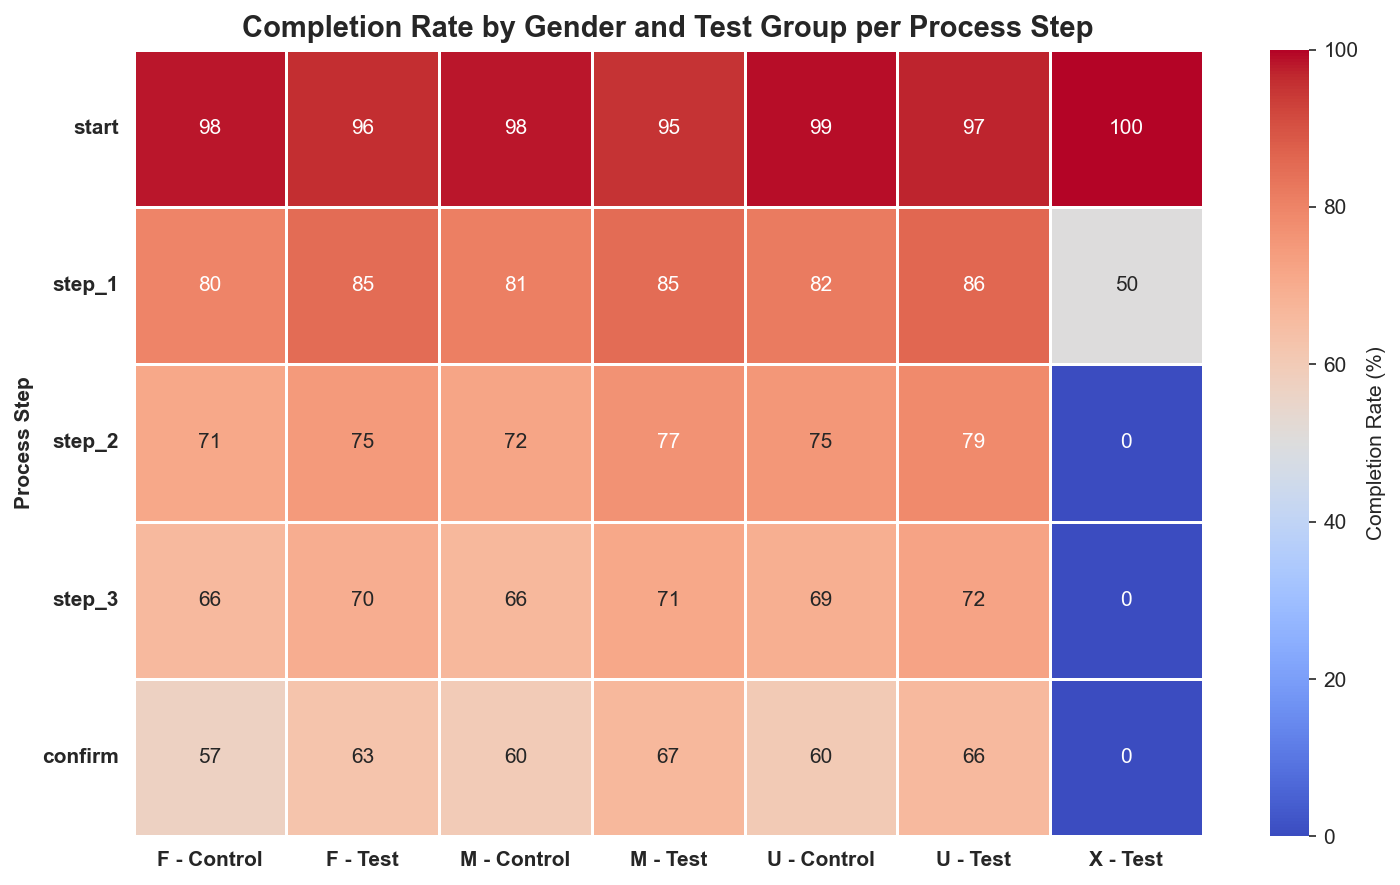

In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# 1. Prepare data
# -----------------------------
df_plot = df_main[['visitor_id', 'process_step', 'test_group', 'gender']].dropna()
df_plot = df_plot[df_plot['test_group'].isin(['Control', 'Test'])]

# Define process steps order
step_order = ['start', 'step_1', 'step_2', 'step_3', 'confirm']
df_plot['process_step'] = pd.Categorical(df_plot['process_step'], categories=step_order, ordered=True)

# Total visitors per gender & group
total_visitors = df_plot.groupby(['gender', 'test_group'])['visitor_id'].nunique().reset_index()
total_visitors.rename(columns={'visitor_id': 'total_visitors'}, inplace=True)

# Visitors who reached each step
completion = (
    df_plot.groupby(['process_step', 'gender', 'test_group'])['visitor_id']
           .nunique()
           .reset_index()
           .rename(columns={'visitor_id': 'step_visitors'})
)

# Merge to compute completion rate (%)
completion = completion.merge(total_visitors, on=['gender', 'test_group'])
completion['completion_rate'] = completion['step_visitors'] / completion['total_visitors'] * 100

# Pivot for heatmap: rows = process_step, columns = gender + test_group
completion['col_label'] = completion['gender'] + ' - ' + completion['test_group']
heatmap_data = completion.pivot(index='process_step', columns='col_label', values='completion_rate')

# -----------------------------
# 2. Plot heatmap
# -----------------------------
plt.figure(figsize=(10, 6), dpi=150)
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".0f",
    cmap='coolwarm',  # red -> blue
    cbar_kws={'label': 'Completion Rate (%)'},
    linewidths=0.5,
    linecolor='white'
)

plt.title("Completion Rate by Gender and Test Group per Process Step", fontsize=14, fontweight='bold')
plt.ylabel("Process Step", fontweight='bold')
plt.xlabel("")
plt.yticks(rotation=0, fontweight='bold')
plt.xticks(fontweight='bold')

plt.tight_layout()
plt.show()


In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# 1. Prepare data
# -----------------------------
df_plot = df_main[['visitor_id', 'process_step', 'test_group', 'gender']].dropna()
df_plot = df_plot[df_plot['test_group'].isin(['Control', 'Test'])]

# Define steps order
step_order = ['start', 'step_1', 'step_2', 'step_3', 'confirm']
df_plot['process_step'] = pd.Categorical(df_plot['process_step'], categories=step_order, ordered=True)

# Compute average time spent per step, gender, test group
# For example, if you have 'time_spent_sec' column
avg_time = (
    df_plot.groupby(['process_step', 'gender', 'test_group'])['time_spent_sec']
           .mean()
           .reset_index()
)

# -----------------------------
# 2. Pivot for plotting
# -----------------------------
# Rows = process_step, Columns = gender + test_group
avg_time['col_label'] = avg_time['gender'] + ' - ' + avg_time['test_group']
heatmap_data = avg_time.pivot(index='process_step', columns='col_label', values='time_spent_sec')

# -----------------------------
# 3. Plot grouped bar chart
# -----------------------------
colors = {
    'Control': '#2c7fb8', 
    'Test': '#f28e2b'
}

x = np.arange(len(step_order))
width = 0.2  # width of each bar
fig, ax = plt.subplots(figsize=(12,6), dpi=150)

genders = df_plot['gender'].unique()
bars = []

for i, gender in enumerate(genders):
    for j, group in enumerate(['Control', 'Test']):
        col = f"{gender} - {group}"
        if col in heatmap_data:
            bar = ax.bar(
                x + (i*2 + j - 1.5)*width,  # position bars per gender/group
                heatmap_data[col],
                width,
                label=col,
                color=colors[group]
            )
            bars.append(bar)

# -----------------------------
# 4. Add numbers above bars
# -----------------------------
for bar_group in bars:
    for bar in bar_group:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width()/2,
            height + 2,
            f'{int(height)}',
            ha='center',
            va='bottom',
            fontweight='bold'
        )

# -----------------------------
# 5. Formatting
# -----------------------------
ax.set_xticks(x)
ax.set_xticklabels(step_order, fontweight='bold')
ax.set_ylabel("Time Spent (sec)", fontweight='bold')
ax.set_title("Average Time Spent per Process Step by Gender and Test Group", fontsize=14, fontweight='bold')

# Legend
ax.legend(frameon=False)

plt.tight_layout()
plt.show()


KeyError: 'Column not found: time_spent_sec'

C:\Users\sboub\AppData\Local\Temp\ipykernel_23472\2959767224.py:25: RuntimeWarning: invalid value encountered in scalar divide
  lambda row: row['visitor_id'] / start_counts[row['gender'], row['test_group']] * 100,


ValueError: cannot convert float NaN to integer

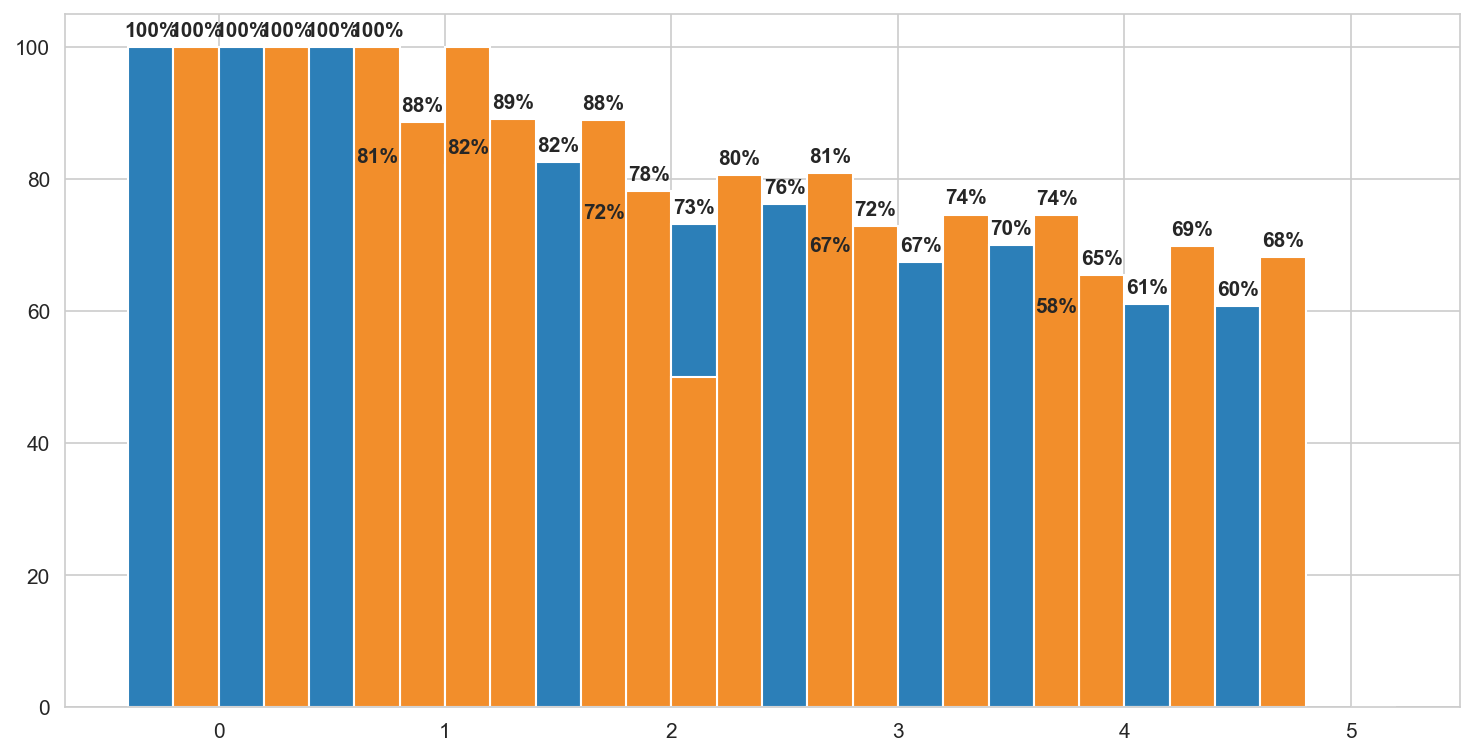

In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# Prepare data
# -----------------------------
df_plot = df_main[['visitor_id', 'process_step', 'test_group', 'gender']].dropna()
df_plot = df_plot[df_plot['test_group'].isin(['Control', 'Test'])]

step_order = ['start', 'step_1', 'step_2', 'step_3', 'confirm']
df_plot['process_step'] = pd.Categorical(df_plot['process_step'], categories=step_order, ordered=True)

# Total visitors per gender & group
total_visitors = df_plot.groupby(['gender', 'test_group'])['visitor_id'].nunique().unstack(fill_value=0)

# Count visitors who reached each step per gender & group
visitors_per_step = df_plot.groupby(['process_step', 'gender', 'test_group'])['visitor_id'].nunique().reset_index()

# Compute completion rate relative to the start step
start_counts = visitors_per_step[visitors_per_step['process_step'] == 'start']
start_counts = start_counts.set_index(['gender', 'test_group'])['visitor_id']

visitors_per_step['completion_rate'] = visitors_per_step.apply(
    lambda row: row['visitor_id'] / start_counts[row['gender'], row['test_group']] * 100,
    axis=1
)

# Pivot for plotting
heatmap_data = visitors_per_step.pivot(index='process_step', columns=['gender','test_group'], values='completion_rate')

# -----------------------------
# Plot grouped bar chart
# -----------------------------
colors = {'Control':'#2c7fb8', 'Test':'#f28e2b'}
x = np.arange(len(step_order))
width = 0.2

fig, ax = plt.subplots(figsize=(12,6), dpi=150)

bars = []

for i, gender in enumerate(heatmap_data.columns.levels[0]):
    for j, group in enumerate(['Control','Test']):
        if (gender, group) in heatmap_data.columns:
            y = heatmap_data[(gender, group)]
            bar = ax.bar(x + (i*2 + j - 1.5)*width, y, width, color=colors[group], label=f"{gender}-{group}")
            bars.append(bar)

# Add numbers above bars
for bar_group in bars:
    for bar in bar_group:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 1, f"{int(height)}%", ha='center', va='bottom', fontweight='bold')

# Formatting
ax.set_xticks(x)
ax.set_xticklabels(step_order, fontweight='bold')
ax.set_ylabel("Completion Rate (%)", fontweight='bold')
ax.set_title("Completion Rate per Step by Gender and Test Group", fontsize=14, fontweight='bold')
ax.legend(frameon=False)

plt.tight_layout()
plt.show()


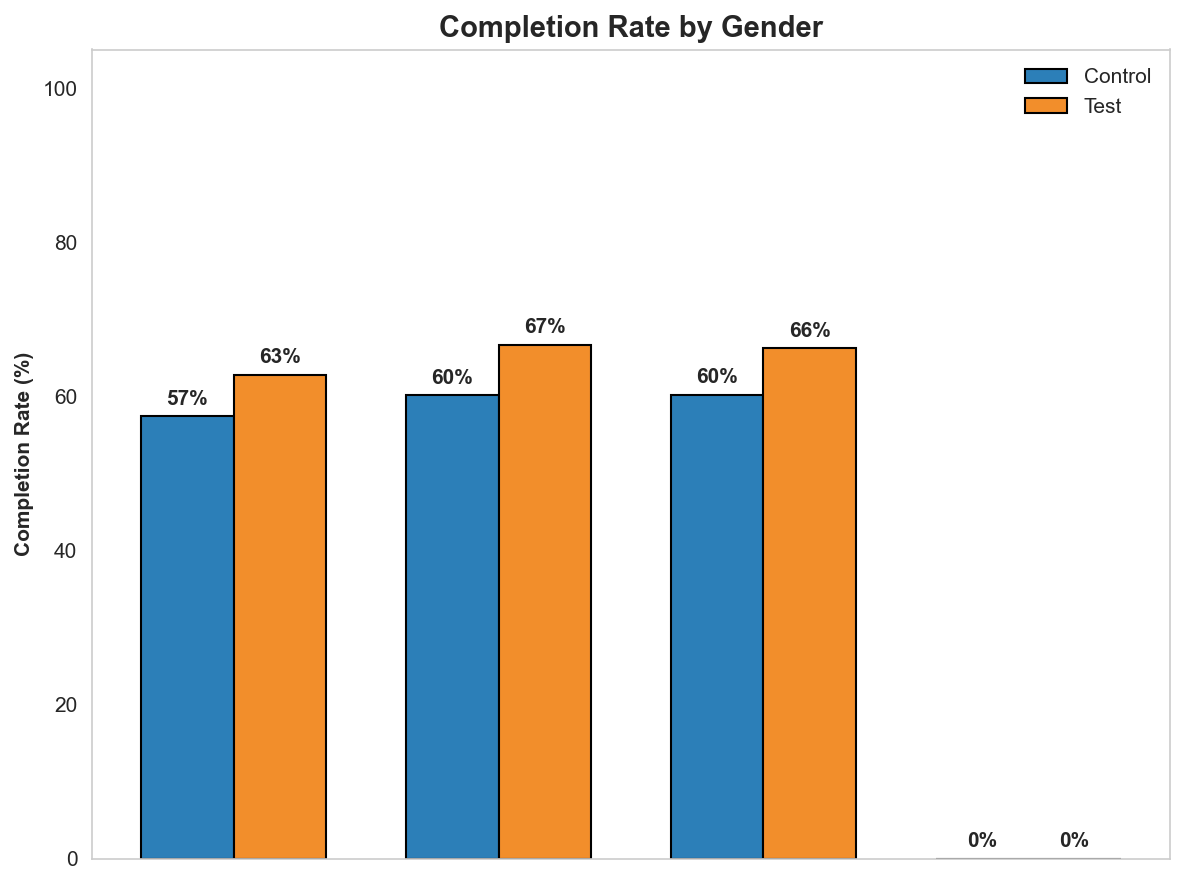

In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# 1. Prepare data
# -----------------------------
# Keep only relevant columns
df_plot = df_main[['visitor_id', 'process_step', 'test_group', 'gender']].dropna()
df_plot = df_plot[df_plot['test_group'].isin(['Control', 'Test'])]

# Define steps in order
step_order = ['start', 'step_1', 'step_2', 'step_3', 'confirm']
df_plot['process_step'] = pd.Categorical(df_plot['process_step'], categories=step_order, ordered=True)

# Total visitors per gender & group
total_visitors = df_plot.groupby(['gender', 'test_group'])['visitor_id'].nunique().unstack(fill_value=0)

# Count visitors who reached "confirm" per gender & group
completed_confirm = df_plot[df_plot['process_step'] == 'confirm'].groupby(['gender', 'test_group'])['visitor_id'].nunique().unstack(fill_value=0)

# Completion rate (%)
completion_rate = (completed_confirm / total_visitors * 100).fillna(0)

# -----------------------------
# 2. Plot
# -----------------------------
genders = completion_rate.index
x = np.arange(len(genders))
width = 0.35

fig, ax = plt.subplots(figsize=(8,6), dpi=150)

bars_control = ax.bar(
    x - width/2,
    completion_rate['Control'],
    width,
    color='#2c7fb8',
    edgecolor='black',
    label='Control'
)

bars_test = ax.bar(
    x + width/2,
    completion_rate['Test'],
    width,
    color='#f28e2b',
    edgecolor='black',
    label='Test'
)

# -----------------------------
# 3. Add numbers above bars
# -----------------------------
for bar_group in [bars_control, bars_test]:
    for bar in bar_group:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width()/2,
            height + 1,  # small offset above bar
            f'{height:.0f}%',
            ha='center',
            va='bottom',
            fontweight='bold'
        )

# -----------------------------
# 4. Formatting
# -----------------------------
ax.set_xticks(x)
ax.set_xticklabels([''] * len(genders))  # hide x-axis labels
ax.set_ylabel("Completion Rate (%)", fontweight='bold')
ax.set_ylim(0, 105)
ax.set_title("Completion Rate by Gender", fontsize=14, fontweight='bold')
ax.legend(frameon=False)
ax.grid(False)  # remove gridlines

plt.tight_layout()
plt.show()


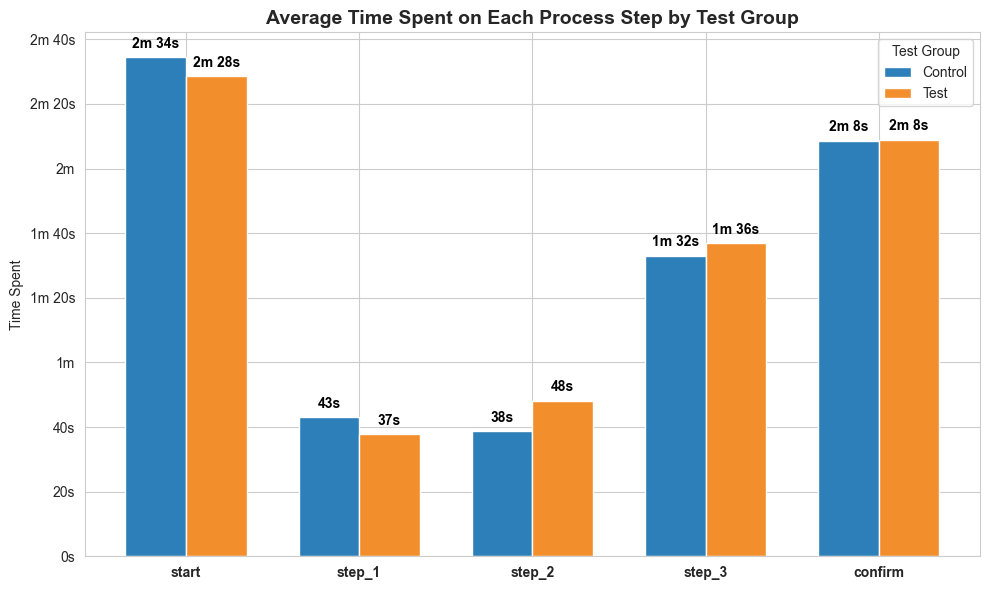

In [132]:
# ===============================
# Plot
# ===============================
plot_order = ['Control', 'Test']
colors_map = {
    'Control': '#2c7fb8',
    'Test': '#f28e2b',
    'grey': '#a0a0a0'
}

fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(avg_time_pivot))
width = 0.35

bars = []  # store bars for labeling

for i, group in enumerate(plot_order):
    values = avg_time_pivot[group] if group in avg_time_pivot else pd.Series(
        [np.nan] * len(avg_time_pivot),
        index=avg_time_pivot.index
    )

    bar_colors = [
        colors_map['grey'] if pd.isna(v) else colors_map[group]
        for v in values
    ]

    b = ax.bar(
        x + i * width,
        values.fillna(0),
        width,
        label=group,
        color=bar_colors
    )
    bars.append(b)

# ===============================
# Add numbers above bars
# ===============================
def sec_to_min_sec_label(x):
    seconds = int(x % 60)
    minutes = int(x // 60)
    if minutes == 0 and seconds == 0:
        return "0s"
    elif minutes == 0:
        return f"{seconds}s"
    elif seconds == 0:
        return f"{minutes}m"
    else:
        return f"{minutes}m {seconds}s"

for b_group in bars:
    for bar in b_group:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height + 2,  # small offset above the bar
                sec_to_min_sec_label(height),
                ha='center',
                va='bottom',
                fontweight='bold',
                color='black'
            )

# ===============================
# Axes formatting
# ===============================
ax.set_xticks(x + width / 2)
ax.set_xticklabels(avg_time_pivot.index, fontweight='bold')

ax.yaxis.set_major_formatter(mtick.FuncFormatter(sec_to_min_sec))
ax.set_title("Average Time Spent on Each Process Step by Test Group", fontsize=14, fontweight='bold')
ax.set_ylabel("Time Spent")
ax.legend(title="Test Group")

plt.tight_layout()
plt.show()


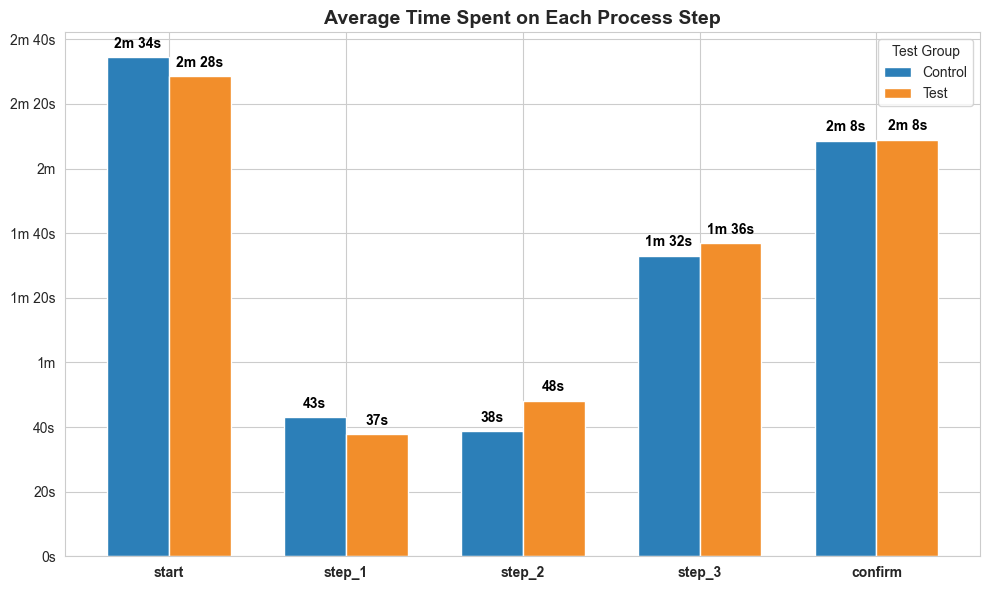

In [137]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

# ===============================
# Plot setup
# ===============================
plot_order = ['Control', 'Test']
colors_map = {
    'Control': '#2c7fb8',
    'Test': '#f28e2b',
    'grey': '#a0a0a0'
}

fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(avg_time_pivot))
width = 0.35

bars = []  # store bars for labeling

for i, group in enumerate(plot_order):
    values = avg_time_pivot[group] if group in avg_time_pivot else pd.Series(
        [np.nan] * len(avg_time_pivot),
        index=avg_time_pivot.index
    )

    bar_colors = [
        colors_map['grey'] if pd.isna(v) else colors_map[group]
        for v in values
    ]

    b = ax.bar(
        x + i * width,
        values.fillna(0),
        width,
        label=group,
        color=bar_colors
    )
    bars.append(b)

# ===============================
# Add numbers above bars
# ===============================
def sec_to_min_sec_label(x, pos=None):  # include pos=None for FuncFormatter
    seconds = int(x % 60)
    minutes = int(x // 60)
    if minutes == 0 and seconds == 0:
        return "0s"
    elif minutes == 0:
        return f"{seconds}s"
    elif seconds == 0:
        return f"{minutes}m"
    else:
        return f"{minutes}m {seconds}s"

for b_group in bars:
    for bar in b_group:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height + 2,  # small offset above bar
                sec_to_min_sec_label(height),
                ha='center',
                va='bottom',
                fontweight='bold',
                color='black'
            )

# ===============================
# Axes formatting
# ===============================
ax.set_xticks(x + width / 2)
ax.set_xticklabels(avg_time_pivot.index, fontweight='bold')

ax.yaxis.set_major_formatter(mtick.FuncFormatter(sec_to_min_sec_label))
ax.set_title("Average Time Spent on Each Process Step", fontsize=14, fontweight='bold')
ax.legend(title="Test Group")

plt.tight_layout()
plt.show()


In [134]:
# ===============================
# Add numbers above bars
# ===============================
def sec_to_min_sec_label(x, pos=None):  # <-- add pos=None
    seconds = int(x % 60)
    minutes = int(x // 60)
    if minutes == 0 and seconds == 0:
        return "0s"
    elif minutes == 0:
        return f"{seconds}s"
    elif seconds == 0:
        return f"{minutes}m"
    else:
        return f"{minutes}m {seconds}s"

for b_group in bars:
    for bar in b_group:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height + 2,  # offset above the bar
                sec_to_min_sec_label(height),
                ha='center',
                va='bottom',
                fontweight='bold',
                color='black'
            )

# ===============================
# Axes formatting
# ===============================
ax.yaxis.set_major_formatter(mtick.FuncFormatter(sec_to_min_sec_label))


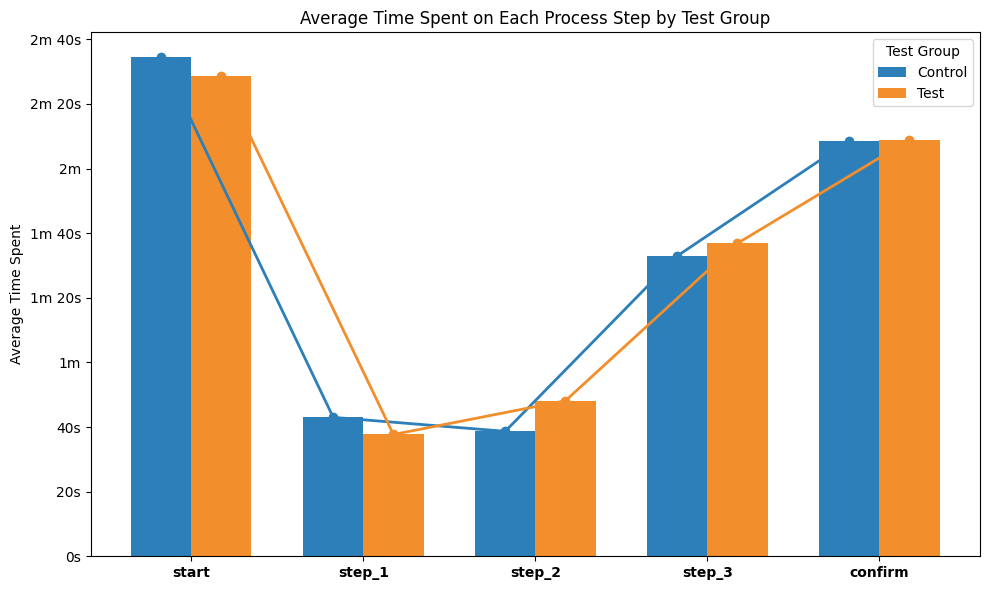

In [ ]:
# ===============================
# Plot
# ===============================
plot_order = ['Control', 'Test']
colors_map = {
    'Control': '#2c7fb8',
    'Test': '#f28e2b',
    'grey': '#a0a0a0'
}

fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(avg_time_pivot))
width = 0.35

for i, group in enumerate(plot_order):
    values = avg_time_pivot[group] if group in avg_time_pivot else pd.Series(
        [np.nan] * len(avg_time_pivot),
        index=avg_time_pivot.index
    )

    bar_colors = [
        colors_map['grey'] if pd.isna(v) else colors_map[group]
        for v in values
    ]

    # Draw bars
    bars = ax.bar(
        x + i * width,
        values.fillna(0),
        width,
        label=group,
        color=bar_colors
    )

    # Draw line connecting bar tops
    ax.plot(
        x + i * width,                 # x positions
        values.fillna(0),              # y positions
        color=colors_map[group],       # same color as bars
        marker='o',                    # show marker on each step
        linewidth=2
    )

# ===============================
# Axes formatting
# ===============================
ax.set_xticks(x + width / 2)
ax.set_xticklabels(avg_time_pivot.index, fontweight='bold')

def sec_to_min_sec(x, pos=None):
    seconds = int(x % 60)
    minutes = int(x // 60)
    
    if minutes == 0 and seconds == 0:
        return "0s"
    elif minutes == 0:
        return f"{seconds}s"
    elif seconds == 0:
        return f"{minutes}m"
    else:
        return f"{minutes}m {seconds}s"

ax.yaxis.set_major_formatter(mtick.FuncFormatter(sec_to_min_sec))

ax.set_ylabel("Average Time Spent")
ax.set_title("Average Time Spent on Each Process Step by Test Group")
ax.legend(title="Test Group")

plt.tight_layout()
plt.show()


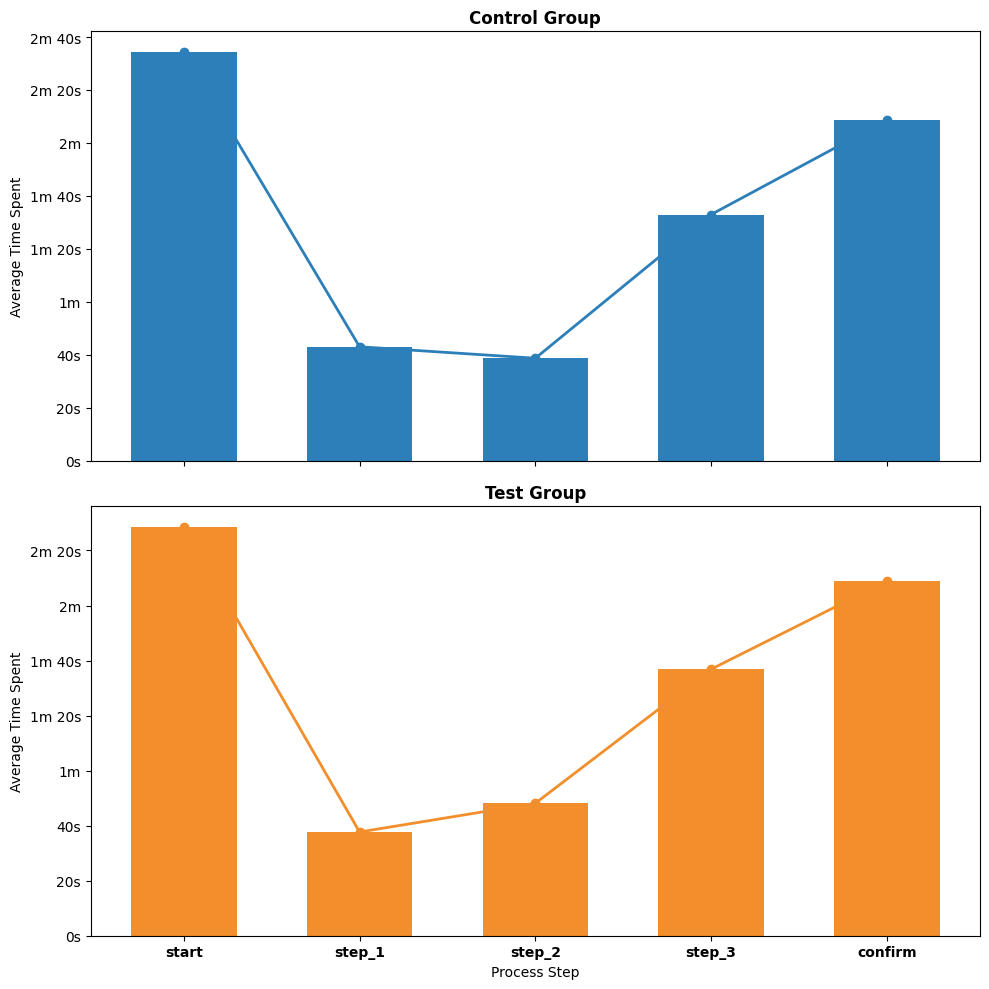

In [ ]:
# ===============================
# Two-row bar + line chart
# ===============================
plot_order = ['Control', 'Test']
colors_map = {
    'Control': '#2c7fb8',
    'Test': '#f28e2b',
    'grey': '#a0a0a0'
}

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10), sharex=True)

x = np.arange(len(avg_time_pivot))
width = 0.6  # full width since only one group per row

for ax, group in zip(axes, plot_order):
    values = avg_time_pivot[group] if group in avg_time_pivot else pd.Series(
        [np.nan] * len(avg_time_pivot),
        index=avg_time_pivot.index
    )
    
    bar_colors = [
        colors_map['grey'] if pd.isna(v) else colors_map[group]
        for v in values
    ]
    
    # Draw bars
    ax.bar(
        x,
        values.fillna(0),
        width,
        color=bar_colors,
        label=group
    )
    
    # Draw line connecting bar tops
    ax.plot(
        x,
        values.fillna(0),
        color=colors_map[group],
        marker='o',
        linewidth=2
    )
    
    ax.set_title(f"{group} Group", fontweight='bold')
    ax.set_ylabel("Average Time Spent")
    ax.legend().set_visible(False)  # remove duplicate legend per subplot

# ===============================
# X-axis formatting
# ===============================
axes[-1].set_xticks(x)
axes[-1].set_xticklabels(avg_time_pivot.index, fontweight='bold')

def sec_to_min_sec(x, pos=None):
    seconds = int(x % 60)
    minutes = int(x // 60)
    
    if minutes == 0 and seconds == 0:
        return "0s"
    elif minutes == 0:
        return f"{seconds}s"
    elif seconds == 0:
        return f"{minutes}m"
    else:
        return f"{minutes}m {seconds}s"

for ax in axes:
    ax.yaxis.set_major_formatter(mtick.FuncFormatter(sec_to_min_sec))

plt.xlabel("Process Step")
plt.tight_layout()
plt.show()


<hr>

## PLOT 09: Total Visit Duration: Control vs Test Groups V1


<style>
h1 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h2 {
    text-align: left;
    color: black;
    font-weight: bold;
}
</style>

<style>
h3 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h4 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>
<hr>

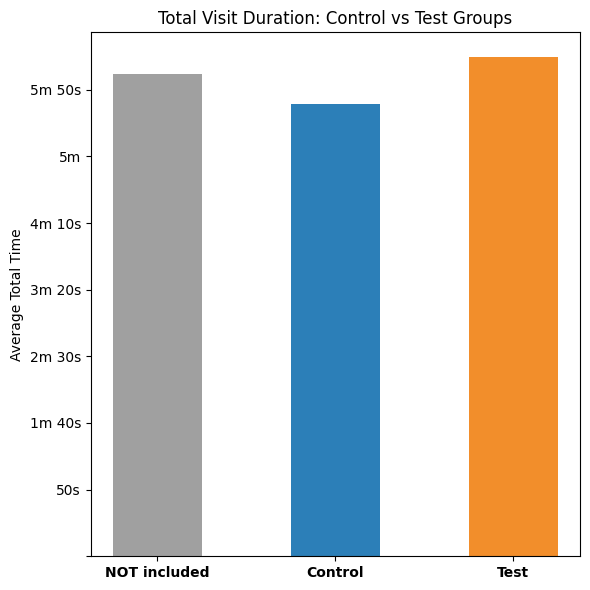

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the cleaned dataset
df = pd.read_csv("../data/clean/df_vanguard_ab_test_clean_v2.csv")

# Combine date and time into datetime
df['datetime'] = pd.to_datetime(df['date'].astype(str) + ' ' + df['time'].astype(str))

# Sort and calculate time spent per step
df = df.sort_values(by=['visitor_id', 'visit_id', 'datetime'])
df['time_spent_sec'] = df.groupby(['visitor_id', 'visit_id'])['datetime'].diff().dt.total_seconds()

# Drop first step per visit
df = df.dropna(subset=['time_spent_sec'])

# Total time per visit
total_time_per_visit = df.groupby(['visitor_id', 'visit_id', 'test_group'])['time_spent_sec'].sum().reset_index()

# Average total time per test group
avg_total_time = total_time_per_visit.groupby('test_group')['time_spent_sec'].mean().reset_index()

# Desired order
order = ['NOT included', 'Control', 'Test']
avg_total_time = avg_total_time.set_index('test_group').reindex(order, fill_value=0).reset_index()

# Colors
colors_map = {'Control': '#2c7fb8', 'Test': '#f28e2b', 'NOT included': '#a0a0a0'}

# Plot
x = np.arange(len(avg_total_time))
fig, ax = plt.subplots(figsize=(6, 6))

bars = ax.bar(
    x,
    avg_total_time['time_spent_sec'],
    color=[colors_map[g] for g in avg_total_time['test_group']],
    width=0.5
)

# Y-axis formatter
def sec_to_min_sec(x, pos=None):
    if x == 0:
        return ""  # Hide zero
    minutes = int(x // 60)
    seconds = int(x % 60)
    if minutes == 0:        # Under 1 minute
        return f"{seconds}s"
    elif seconds == 0:      # Exact minutes
        return f"{minutes}m"
    else:
        return f"{minutes}m {seconds}s"

ax.yaxis.set_major_formatter(plt.FuncFormatter(sec_to_min_sec))

# X-axis
ax.set_xticks(x)
ax.set_xticklabels(avg_total_time['test_group'], fontweight='bold')

# Labels and title
ax.set_ylabel("Average Total Time")
ax.set_title("Total Visit Duration: Control vs Test Groups")

plt.tight_layout()
plt.show()


<hr>

## PLOT 09: Total Visit Duration: Control vs Test Groups V2


<style>
h1 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h2 {
    text-align: left;
    color: black;
    font-weight: bold;
}
</style>

<style>
h3 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h4 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>
<hr>

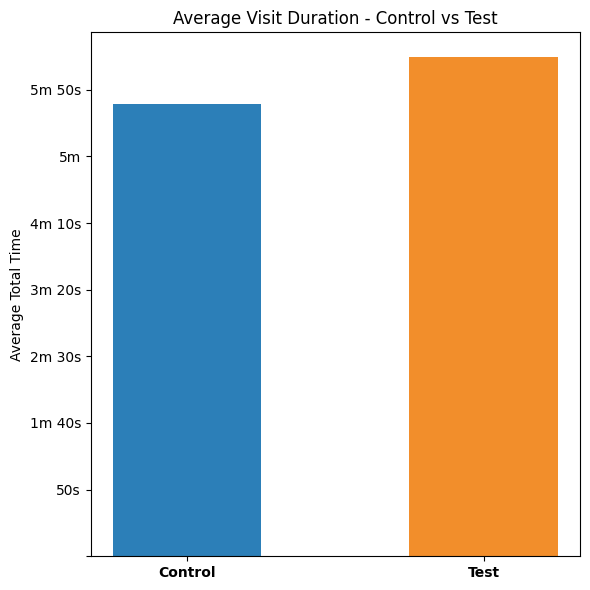

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the cleaned dataset
df = pd.read_csv("../data/clean/df_vanguard_ab_test_clean_v2.csv")

# Combine date and time into datetime
df['datetime'] = pd.to_datetime(df['date'].astype(str) + ' ' + df['time'].astype(str))

# Sort and calculate time spent per step
df = df.sort_values(by=['visitor_id', 'visit_id', 'datetime'])
df['time_spent_sec'] = (
    df.groupby(['visitor_id', 'visit_id'])['datetime']
      .diff()
      .dt.total_seconds()
)

# Drop first step per visit
df = df.dropna(subset=['time_spent_sec'])

# Total time per visit
total_time_per_visit = (
    df.groupby(['visitor_id', 'visit_id', 'test_group'])['time_spent_sec']
      .sum()
      .reset_index()
)

# Average total time per test group
avg_total_time = (
    total_time_per_visit.groupby('test_group')['time_spent_sec']
    .mean()
    .reset_index()
)

# Remove "NOT included"
avg_total_time = avg_total_time[avg_total_time['test_group'] != 'NOT included']

# Desired order
order = ['Control', 'Test']
avg_total_time = (
    avg_total_time.set_index('test_group')
    .reindex(order)
    .reset_index()
)

# Colors
colors_map = {
    'Control': '#2c7fb8',
    'Test': '#f28e2b'
}

# Plot
x = np.arange(len(avg_total_time))
fig, ax = plt.subplots(figsize=(6, 6))

ax.bar(
    x,
    avg_total_time['time_spent_sec'],
    color=[colors_map[g] for g in avg_total_time['test_group']],
    width=0.5
)

# Y-axis formatter
def sec_to_min_sec(x, pos=None):
    if x == 0:
        return ""
    minutes = int(x // 60)
    seconds = int(x % 60)
    if minutes == 0:
        return f"{seconds}s"
    elif seconds == 0:
        return f"{minutes}m"
    else:
        return f"{minutes}m {seconds}s"

ax.yaxis.set_major_formatter(plt.FuncFormatter(sec_to_min_sec))

# X-axis
ax.set_xticks(x)
ax.set_xticklabels(avg_total_time['test_group'], fontweight='bold')

# Labels and title
ax.set_ylabel("Average Total Time")
ax.set_title("Average Visit Duration - Control vs Test")

plt.tight_layout()
plt.show()


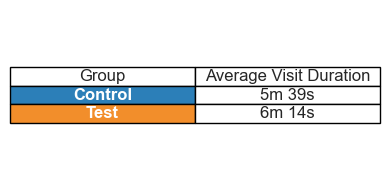

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

# --- assume avg_total_time is already computed as in your code ---

# Convert seconds to readable "Xm Ys" format
def sec_to_min_sec(x):
    minutes = int(x // 60)
    seconds = int(x % 60)
    if minutes == 0:
        return f"{seconds}s"
    elif seconds == 0:
        return f"{minutes}m"
    else:
        return f"{minutes}m {seconds}s"

avg_total_time['formatted_time'] = avg_total_time['time_spent_sec'].apply(sec_to_min_sec)

# Prepare table data
table_data = avg_total_time[['test_group', 'formatted_time']].values.tolist()

# Create figure
fig, ax = plt.subplots(figsize=(4, 2))
ax.axis('tight')
ax.axis('off')

# Add table
table = ax.table(
    cellText=table_data,
    colLabels=['Group', 'Average Visit Duration'],
    cellLoc='center',
    loc='center'
)

# Color the group cells
for i, group in enumerate(avg_total_time['test_group']):
    color = '#2c7fb8' if group == 'Control' else '#f28e2b'
    table[(i+1, 0)].set_facecolor(color)
    table[(i+1, 0)].set_text_props(weight='bold', color='white')

# Set table font size
table.auto_set_font_size(False)
table.set_fontsize(12)

plt.tight_layout()
plt.show()


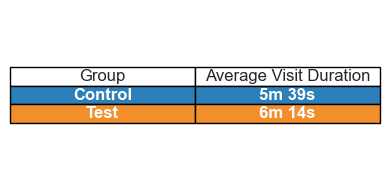

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# --- assume avg_total_time is already computed ---

# Convert seconds to readable "Xm Ys" format
def sec_to_min_sec(x):
    minutes = int(x // 60)
    seconds = int(x % 60)
    if minutes == 0:
        return f"{seconds}s"
    elif seconds == 0:
        return f"{minutes}m"
    else:
        return f"{minutes}m {seconds}s"

avg_total_time['formatted_time'] = avg_total_time['time_spent_sec'].apply(sec_to_min_sec)

# Prepare table data
table_data = avg_total_time[['test_group', 'formatted_time']].values.tolist()

# Create figure
fig, ax = plt.subplots(figsize=(4, 2))
ax.axis('tight')
ax.axis('off')

# Add table
table = ax.table(
    cellText=table_data,
    colLabels=['Group', 'Average Visit Duration'],
    cellLoc='center',
    loc='center'
)

# Color the cells and make text bold
for i, group in enumerate(avg_total_time['test_group']):
    color = '#2c7fb8' if group == 'Control' else '#f28e2b'
    # Color group cell
    table[(i+1, 0)].set_facecolor(color)
    table[(i+1, 0)].set_text_props(weight='bold', color='white')
    # Color duration cell
    table[(i+1, 1)].set_facecolor(color)
    table[(i+1, 1)].set_text_props(weight='bold', color='white')

# Set table font size
table.auto_set_font_size(False)
table.set_fontsize(12)

plt.tight_layout()
plt.show()


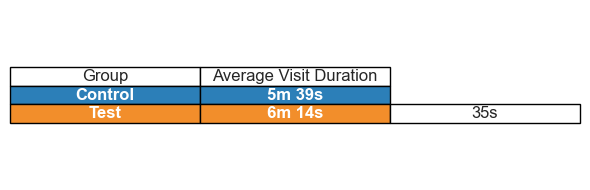

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# --- assume avg_total_time is already computed ---

# Convert seconds to readable "Xm Ys" format
def sec_to_min_sec(x):
    minutes = int(x // 60)
    seconds = int(x % 60)
    if minutes == 0:
        return f"{seconds}s"
    elif seconds == 0:
        return f"{minutes}m"
    else:
        return f"{minutes}m {seconds}s"

avg_total_time['formatted_time'] = avg_total_time['time_spent_sec'].apply(sec_to_min_sec)

# Compute difference (Test - Control)
difference_sec = avg_total_time.loc[1, 'time_spent_sec'] - avg_total_time.loc[0, 'time_spent_sec']
difference_str = sec_to_min_sec(difference_sec)

# Prepare table data: difference will be in one cell (rowspan)
table_data = [
    [avg_total_time.loc[0, 'test_group'], avg_total_time.loc[0, 'formatted_time'], ''],
    [avg_total_time.loc[1, 'test_group'], avg_total_time.loc[1, 'formatted_time'], difference_str]
]

# Create figure
fig, ax = plt.subplots(figsize=(6, 2))
ax.axis('tight')
ax.axis('off')

# Add table
table = ax.table(
    cellText=table_data,
    colLabels=['Group', 'Average Visit Duration', 'Difference (Test - Control)'],
    cellLoc='center',
    loc='center'
)

# Color the group and duration cells
for i, group in enumerate(avg_total_time['test_group']):
    color = '#2c7fb8' if group == 'Control' else '#f28e2b'
    # Group cell
    table[(i+1, 0)].set_facecolor(color)
    table[(i+1, 0)].set_text_props(weight='bold', color='white')
    # Duration cell
    table[(i+1, 1)].set_facecolor(color)
    table[(i+1, 1)].set_text_props(weight='bold', color='white')

# Merge the difference cell across the two rows
table[(0, 2)].visible_edges = 'open'  # hide top cell edges
table[(1, 2)].visible_edges = 'open'  # hide bottom cell edges
table[(0, 2)].set_facecolor('#6c757d')  # gray background
table[(0, 2)].set_text_props(weight='bold', color='white')
table[(0, 2)].get_text().set_text(difference_str)
table[(0, 2)].get_text().set_multialignment('center')

# Remove the text from the second row of that column
table[(1, 2)].get_text().set_text('')

# Set table font size
table.auto_set_font_size(False)
table.set_fontsize(12)

plt.tight_layout()
plt.show()


<hr>

## PLOT 09: Average Visit Duration: Control vs Test Groups V3


<style>
h1 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h2 {
    text-align: left;
    color: black;
    font-weight: bold;
}
</style>

<style>
h3 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h4 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>
<hr>

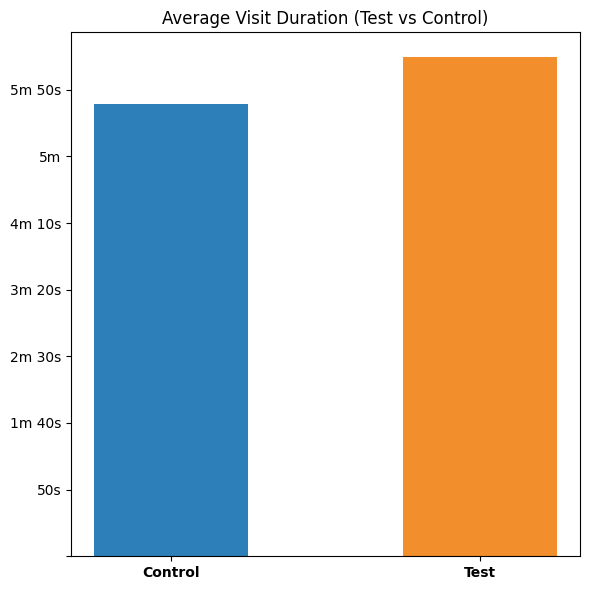

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data
df = pd.read_csv("../data/clean/df_vanguard_ab_test_clean_v2.csv")

# Combine date and time into datetime
df['datetime'] = pd.to_datetime(df['date'].astype(str) + ' ' + df['time'].astype(str))

# Sort and calculate time spent per step
df = df.sort_values(by=['visitor_id', 'visit_id', 'datetime'])
df['time_spent_sec'] = (
    df.groupby(['visitor_id', 'visit_id'])['datetime']
      .diff()
      .dt.total_seconds()
)

# Drop first step per visit
df = df.dropna(subset=['time_spent_sec'])

# Total duration per visit
total_time_per_visit = (
    df.groupby(['visitor_id', 'visit_id', 'test_group'])['time_spent_sec']
      .sum()
      .reset_index()
)

# Average visit duration per group
avg_visit_duration = (
    total_time_per_visit
    .groupby('test_group')['time_spent_sec']
    .mean()
    .reset_index()
)

# Remove NOT included
avg_visit_duration = avg_visit_duration[
    avg_visit_duration['test_group'] != 'NOT included'
]

# Order
order = ['Control', 'Test']
avg_visit_duration = (
    avg_visit_duration.set_index('test_group')
    .reindex(order)
    .reset_index()
)

# Colors
colors_map = {
    'Control': '#2c7fb8',
    'Test': '#f28e2b'
}

# Plot
x = np.arange(len(avg_visit_duration))
fig, ax = plt.subplots(figsize=(6, 6))

ax.bar(
    x,
    avg_visit_duration['time_spent_sec'],
    color=[colors_map[g] for g in avg_visit_duration['test_group']],
    width=0.5
)

# Y-axis formatter
def sec_to_min_sec(x, pos=None):
    if x == 0:
        return ""
    minutes = int(x // 60)
    seconds = int(x % 60)
    if minutes == 0:
        return f"{seconds}s"
    elif seconds == 0:
        return f"{minutes}m"
    else:
        return f"{minutes}m {seconds}s"

ax.yaxis.set_major_formatter(plt.FuncFormatter(sec_to_min_sec))

# X-axis
ax.set_xticks(x)
ax.set_xticklabels(avg_visit_duration['test_group'], fontweight='bold')

# Labels and title
ax.set_title("Average Visit Duration (Test vs Control)")

plt.tight_layout()
plt.show()


<hr>

## PLOT 09: Average Visit Duration: Control vs Test Groups V4


<style>
h1 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h2 {
    text-align: left;
    color: black;
    font-weight: bold;
}
</style>

<style>
h3 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h4 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>
<hr>

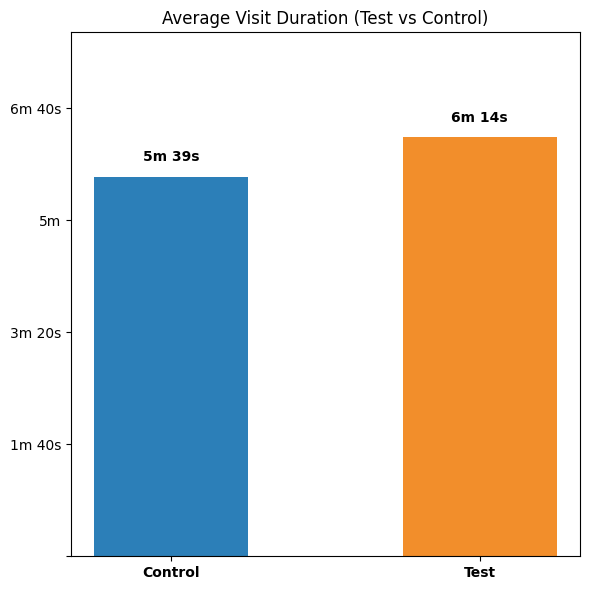

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data
df = pd.read_csv("../data/clean/df_vanguard_ab_test_clean_v2.csv")

# Combine date and time into datetime
df['datetime'] = pd.to_datetime(df['date'].astype(str) + ' ' + df['time'].astype(str))

# Sort and calculate time spent per step
df = df.sort_values(by=['visitor_id', 'visit_id', 'datetime'])
df['time_spent_sec'] = (
    df.groupby(['visitor_id', 'visit_id'])['datetime']
      .diff()
      .dt.total_seconds()
)

# Drop first step per visit
df = df.dropna(subset=['time_spent_sec'])

# Total duration per visit
total_time_per_visit = (
    df.groupby(['visitor_id', 'visit_id', 'test_group'])['time_spent_sec']
      .sum()
      .reset_index()
)

# Average visit duration per group
avg_visit_duration = (
    total_time_per_visit
    .groupby('test_group')['time_spent_sec']
    .mean()
    .reset_index()
)

# Remove NOT included
avg_visit_duration = avg_visit_duration[
    avg_visit_duration['test_group'] != 'NOT included'
]

# Order
order = ['Control', 'Test']
avg_visit_duration = (
    avg_visit_duration.set_index('test_group')
    .reindex(order)
    .reset_index()
)

# Colors
colors_map = {
    'Control': '#2c7fb8',
    'Test': '#f28e2b'
}

# Plot
x = np.arange(len(avg_visit_duration))
fig, ax = plt.subplots(figsize=(6, 6))

ax.bar(
    x,
    avg_visit_duration['time_spent_sec'],
    color=[colors_map[g] for g in avg_visit_duration['test_group']],
    width=0.5
)

# Y-axis formatter
def sec_to_min_sec(x, pos=None):
    if x == 0:
        return ""
    minutes = int(x // 60)
    seconds = int(x % 60)
    if minutes == 0:
        return f"{seconds}s"
    elif seconds == 0:
        return f"{minutes}m"
    else:
        return f"{minutes}m {seconds}s"

ax.yaxis.set_major_formatter(plt.FuncFormatter(sec_to_min_sec))

# X-axis
ax.set_xticks(x)
ax.set_xticklabels(avg_visit_duration['test_group'], fontweight='bold')

# Title
ax.set_title("Average Visit Duration (Test vs Control)")

# ---- ADD LABELS ABOVE BARS ----
max_val = avg_visit_duration['time_spent_sec'].max()

for i, val in enumerate(avg_visit_duration['time_spent_sec']):
    minutes = int(val // 60)
    seconds = int(val % 60)

    if minutes == 0:
        label = f"{seconds}s"
    elif seconds == 0:
        label = f"{minutes}m"
    else:
        label = f"{minutes}m {seconds}s"

    ax.text(
        i,
        val + max_val * 0.03,
        label,
        ha='center',
        va='bottom',
        fontweight='bold'
    )

# ---- FIX: ADD HEADROOM ----
ax.set_ylim(0, max_val * 1.25)

plt.tight_layout()
plt.show()


<hr>

## PLOT 09: Average Visit Duration: Control vs Test Groups V5


<style>
h1 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h2 {
    text-align: left;
    color: black;
    font-weight: bold;
}
</style>

<style>
h3 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h4 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>
<hr>

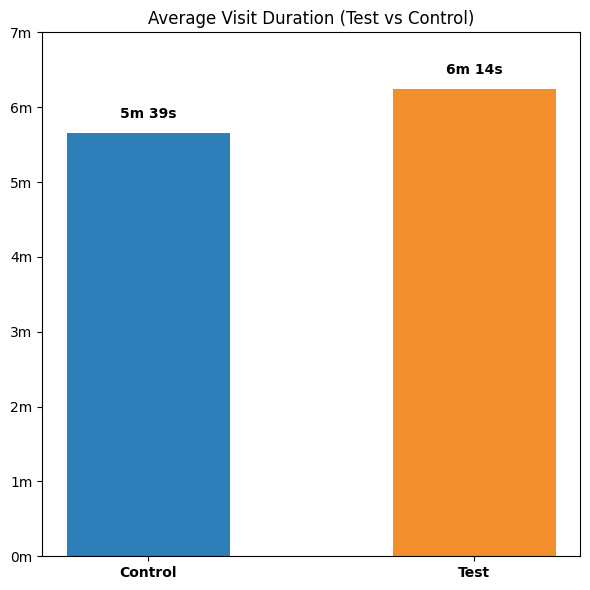

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data
df = pd.read_csv("../data/clean/df_vanguard_ab_test_clean_v2.csv")

# Combine date and time into datetime
df['datetime'] = pd.to_datetime(df['date'].astype(str) + ' ' + df['time'].astype(str))

# Sort and calculate time spent per step
df = df.sort_values(by=['visitor_id', 'visit_id', 'datetime'])
df['time_spent_sec'] = (
    df.groupby(['visitor_id', 'visit_id'])['datetime']
      .diff()
      .dt.total_seconds()
)

# Drop first step per visit
df = df.dropna(subset=['time_spent_sec'])

# Total duration per visit
total_time_per_visit = (
    df.groupby(['visitor_id', 'visit_id', 'test_group'])['time_spent_sec']
      .sum()
      .reset_index()
)

# Average visit duration per group
avg_visit_duration = (
    total_time_per_visit
    .groupby('test_group')['time_spent_sec']
    .mean()
    .reset_index()
)

# Remove NOT included
avg_visit_duration = avg_visit_duration[
    avg_visit_duration['test_group'] != 'NOT included'
]

# Order
order = ['Control', 'Test']
avg_visit_duration = (
    avg_visit_duration.set_index('test_group')
    .reindex(order)
    .reset_index()
)

# Colors
colors_map = {'Control': '#2c7fb8', 'Test': '#f28e2b'}

# Plot
x = np.arange(len(avg_visit_duration))
fig, ax = plt.subplots(figsize=(6, 6))

ax.bar(
    x,
    avg_visit_duration['time_spent_sec'],
    color=[colors_map[g] for g in avg_visit_duration['test_group']],
    width=0.5
)

# ---- Y-AXIS: FIXED MINUTE TICKS (0m → 7m) ----
ax.set_yticks(np.arange(0, 8 * 60, 60))  # 0m to 7m
ax.set_ylim(0, 7 * 60)

def sec_to_min(x, pos=None):
    return f"{int(x // 60)}m"

ax.yaxis.set_major_formatter(plt.FuncFormatter(sec_to_min))

# X-axis
ax.set_xticks(x)
ax.set_xticklabels(avg_visit_duration['test_group'], fontweight='bold')

# Title
ax.set_title("Average Visit Duration (Test vs Control)")

# ---- LABELS ABOVE BARS ----
for i, val in enumerate(avg_visit_duration['time_spent_sec']):
    minutes = int(val // 60)
    seconds = int(val % 60)
    label = f"{minutes}m {seconds}s" if seconds else f"{minutes}m"

    ax.text(
        i,
        val + 10,
        label,
        ha='center',
        va='bottom',
        fontweight='bold'
    )

plt.tight_layout()
plt.show()


<hr>

## PLOT 09.5: Clients Distribution - Control vs Test V1

<style>
h1 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h2 {
    text-align: left;
    color: black;
    font-weight: bold;
}
</style>

<style>
h3 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h4 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>
<hr>

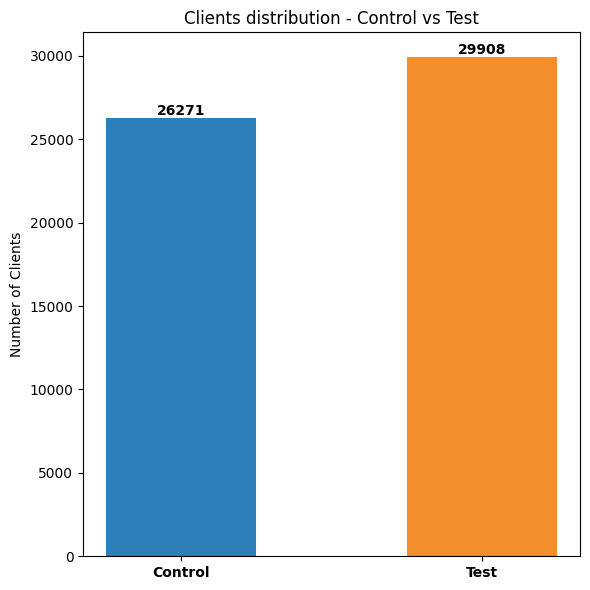

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data
df = pd.read_csv("../data/clean/df_vanguard_ab_test_clean_v2.csv")

# Count unique visitors per test group
clients_per_group = (
    df.groupby('test_group')['visitor_id']
      .nunique()
      .reset_index()
      .rename(columns={'visitor_id': 'num_clients'})
)

# Remove "NOT included"
clients_per_group = clients_per_group[clients_per_group['test_group'] != 'NOT included']

# Order
order = ['Control', 'Test']
clients_per_group = clients_per_group.set_index('test_group').reindex(order).reset_index()

# Colors
colors_map = {'Control': '#2c7fb8', 'Test': '#f28e2b'}

# Plot
x = np.arange(len(clients_per_group))
fig, ax = plt.subplots(figsize=(6, 6))

bars = ax.bar(
    x,
    clients_per_group['num_clients'],
    color=[colors_map[g] for g in clients_per_group['test_group']],
    width=0.5
)

# Add numbers on top of bars
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 2,  # small offset above the bar
        f'{int(height)}',
        ha='center',
        va='bottom',
        fontweight='bold'
    )

# X-axis
ax.set_xticks(x)
ax.set_xticklabels(clients_per_group['test_group'], fontweight='bold')

# Labels and title
ax.set_ylabel("Number of Clients")
ax.set_title("Clients distribution - Control vs Test")

plt.tight_layout()
plt.show()

# Number of clients in the Control group = 26_271
# Number of clients in the Test group = 29_908
# Total number of clients in this A/B Test = 56_179

<hr>

## PLOT 09.5: Clients Distribution - Control vs Test V2

<style>
h1 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h2 {
    text-align: left;
    color: black;
    font-weight: bold;
}
</style>

<style>
h3 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h4 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>
<hr>

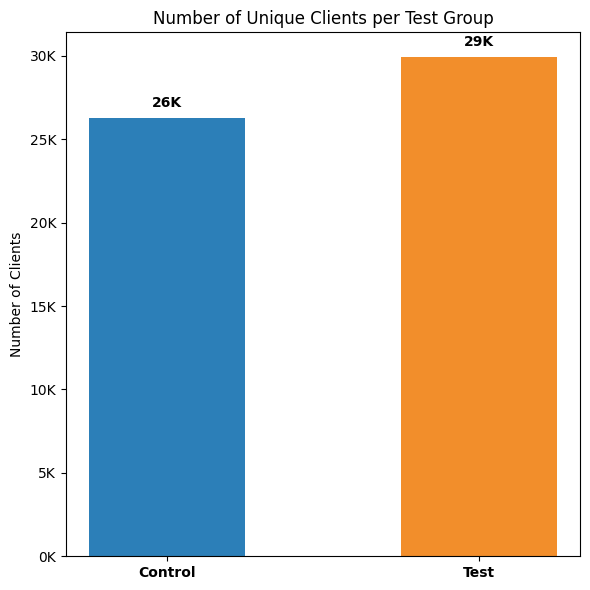

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data
df = pd.read_csv("../data/clean/df_vanguard_ab_test_clean_v2.csv")

# Count unique visitors per test group
clients_per_group = (
    df.groupby('test_group')['visitor_id']
      .nunique()
      .reset_index()
      .rename(columns={'visitor_id': 'num_clients'})
)

# Remove "NOT included"
clients_per_group = clients_per_group[clients_per_group['test_group'] != 'NOT included']

# Order
order = ['Control', 'Test']
clients_per_group = clients_per_group.set_index('test_group').reindex(order).reset_index()

# Colors
colors_map = {'Control': '#2c7fb8', 'Test': '#f28e2b'}

# Plot
x = np.arange(len(clients_per_group))
fig, ax = plt.subplots(figsize=(6, 6))

bars = ax.bar(
    x,
    clients_per_group['num_clients'],
    color=[colors_map[g] for g in clients_per_group['test_group']],
    width=0.5
)

# Add numbers on top of bars
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 500,  # offset above bar
        f'{int(height/1000)}K',  # format as K
        ha='center',
        va='bottom',
        fontweight='bold'
    )

# X-axis
ax.set_xticks(x)
ax.set_xticklabels(clients_per_group['test_group'], fontweight='bold')

# Y-axis formatter to show K
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x/1000)}K'))

# Labels and title
ax.set_ylabel("Number of Clients")
ax.set_title("Number of Unique Clients per Test Group")

plt.tight_layout()
plt.show()

# Number of clients in the Control group = 26_271
# Number of clients in the Test group = 29_908
# Total number of clients in this A/B Test = 56_179


<hr>

## PLOT 10: NOT included vs included groups in A/B Test V1


<style>
h1 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h2 {
    text-align: left;
    color: black;
    font-weight: bold;
}
</style>

<style>
h3 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h4 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>
<hr>

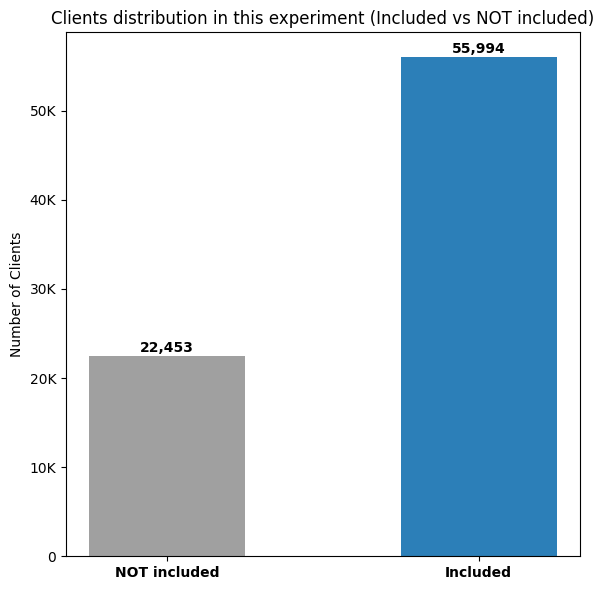

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick

# Load the cleaned dataset
df = pd.read_csv("../data/clean/df_vanguard_ab_test_clean_v2.csv")

# Create 'Included' vs 'NOT included'
df['group'] = df['test_group'].apply(lambda x: 'NOT included' if x == 'NOT included' else 'Included')

# Count unique visitors per group
client_counts = df.groupby('group')['visitor_id'].nunique().reset_index()

# Ensure order: NOT included first
order = ['NOT included', 'Included']
client_counts = client_counts.set_index('group').reindex(order, fill_value=0).reset_index()

# Colors
colors_map = {'NOT included': '#a0a0a0', 'Included': '#2c7fb8'}

# Plot
x = np.arange(len(client_counts))
fig, ax = plt.subplots(figsize=(6, 6))

bars = ax.bar(
    x,
    client_counts['visitor_id'],
    color=[colors_map[g] for g in client_counts['group']],
    width=0.5
)

# Y-axis formatter to display thousands as K without decimals
def thousands_formatter(x, pos=None):
    if x >= 1000:
        return f"{int(x/1000)}K"  # e.g., 30000 -> 30K
    return str(int(x))

ax.yaxis.set_major_formatter(mtick.FuncFormatter(thousands_formatter))

# X-axis
ax.set_xticks(x)
ax.set_xticklabels(client_counts['group'], fontweight='bold')

# Labels and title
ax.set_ylabel("Number of Clients")
ax.set_title("Clients distribution in this experiment (Included vs NOT included)")

# Add numbers on top of bars
for i, v in enumerate(client_counts['visitor_id']):
    ax.text(i, v + 500, f"{v:,}", ha='center', fontweight='bold')  # formatted with commas

plt.tight_layout()
plt.show()


<hr>

## PLOT 10: NOT included vs included groups in A/B Test V2


<style>
h1 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h2 {
    text-align: left;
    color: black;
    font-weight: bold;
}
</style>

<style>
h3 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h4 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>
<hr>

In [90]:
import pandas as pd

# Load the cleaned dataset
df = pd.read_csv("../data/clean/df_vanguard_ab_test_clean_v2.csv")

# Create 'Included' vs 'NOT included'
df['group'] = df['test_group'].apply(lambda x: 'NOT included' if x == 'NOT included' else 'Included')

# Count unique visitors per group
client_counts = df.groupby('group')['visitor_id'].nunique().reset_index()
client_counts.rename(columns={'visitor_id': 'Number of Clients'}, inplace=True)

# Ensure order: NOT included first
order = ['NOT included', 'Included']
client_counts = client_counts.set_index('group').reindex(order, fill_value=0).reset_index()

# Add percentage column of the whole data
total_clients = client_counts['Number of Clients'].sum()
client_counts['Percentage of the Whole Data'] = (
    (client_counts['Number of Clients'] / total_clients * 100).round(1).astype(str) + '%'
)

# Display table
display(client_counts)


group  Number of Clients Percentage of the Whole Data
0  NOT included              22453                        28.6%
1      Included              55994                        71.4%

<hr>

## PLOT 10: NOT included vs included groups in A/B Test V3


<style>
h1 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h2 {
    text-align: left;
    color: black;
    font-weight: bold;
}
</style>

<style>
h3 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h4 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>
<hr>

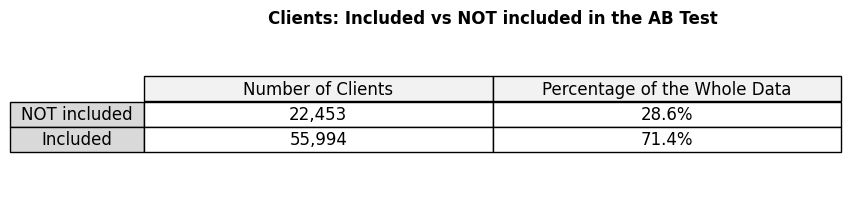

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned dataset
df = pd.read_csv("../data/clean/df_vanguard_ab_test_clean_v2.csv")

# Create 'Included' vs 'NOT included'
df['group'] = df['test_group'].apply(lambda x: 'NOT included' if x == 'NOT included' else 'Included')

# Count unique visitors per group
client_counts = df.groupby('group')['visitor_id'].nunique().reset_index()
client_counts.rename(columns={'visitor_id': 'Number of Clients'}, inplace=True)

# Ensure order
order = ['NOT included', 'Included']
client_counts = client_counts.set_index('group').reindex(order, fill_value=0).reset_index()

# Add percentage column of the whole data
total_clients = client_counts['Number of Clients'].sum()
client_counts['Percentage of the Whole Data'] = (client_counts['Number of Clients'] / total_clients * 100).round(1)

# Prepare data for plotting
data = client_counts.set_index('group')[['Number of Clients', 'Percentage of the Whole Data']]

# Plot a table-style heatmap
fig, ax = plt.subplots(figsize=(6, 2))
ax.axis('off')  # hide axes

# Create table
table_data = data.values
columns = data.columns
rows = data.index

# Create cell text with numbers + percentages nicely
cell_text = [
    [f"{int(table_data[i,j]):,}" if j == 0 else f"{table_data[i,j]}%" for j in range(len(columns))]
    for i in range(len(rows))
]

# Create table
table = ax.table(
    cellText=cell_text,
    rowLabels=rows,
    colLabels=columns,
    cellLoc='center',
    rowLoc='center',
    loc='center',
    colColours=['#f2f2f2']*len(columns),
    rowColours=['#d9d9d9']*len(rows)
)

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.5, 1.5)

plt.title("Clients: Included vs NOT included in the AB Test", fontweight='bold', pad=10)
plt.show()


<hr>

## PLOT 10: NOT included vs included groups in A/B Test V4


<style>
h1 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h2 {
    text-align: left;
    color: black;
    font-weight: bold;
}
</style>

<style>
h3 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h4 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>
<hr>

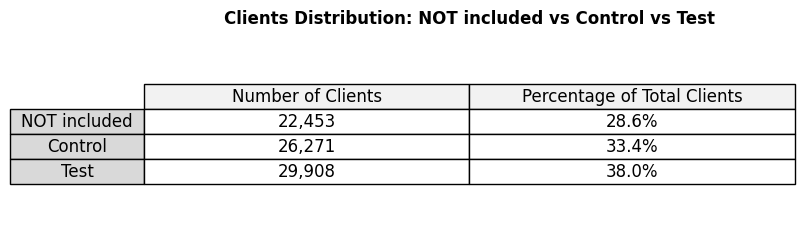

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned dataset
df = pd.read_csv("../data/clean/df_vanguard_ab_test_clean_v2.csv")

# Count unique visitors per test group
client_counts = (
    df.groupby('test_group')['visitor_id']
      .nunique()
      .reset_index()
      .rename(columns={'visitor_id': 'Number of Clients'})
)

# Ensure order
order = ['NOT included', 'Control', 'Test']
client_counts = client_counts.set_index('test_group').reindex(order, fill_value=0).reset_index()

# Add percentage column (of total clients)
total_clients = client_counts['Number of Clients'].sum()
client_counts['Percentage of Total Clients'] = (
    client_counts['Number of Clients'] / total_clients * 100
).round(1)

# Prepare data for table
data = client_counts.set_index('test_group')[['Number of Clients', 'Percentage of Total Clients']]

# Plot table-style figure
fig, ax = plt.subplots(figsize=(6, 2.5))
ax.axis('off')

# Format cell text
cell_text = [
    [f"{int(val):,}" if col == 'Number of Clients' else f"{val}%"
     for col, val in zip(data.columns, row)]
    for row in data.values
]

# Create table
table = ax.table(
    cellText=cell_text,
    rowLabels=data.index,
    colLabels=data.columns,
    cellLoc='center',
    rowLoc='center',
    loc='center',
    colColours=['#f2f2f2'] * len(data.columns),
    rowColours=['#d9d9d9'] * len(data.index)
)

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.4, 1.5)

plt.title("Clients Distribution: NOT included vs Control vs Test", fontweight='bold', pad=10)
plt.show()


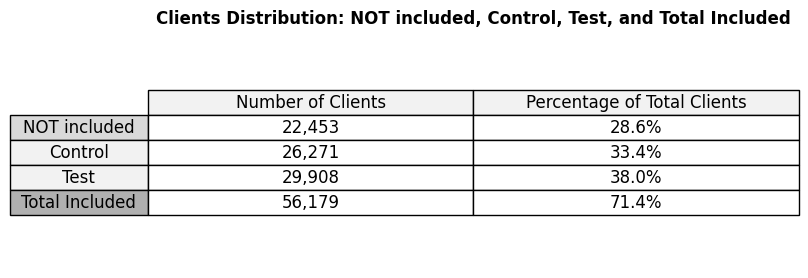

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned dataset
df = pd.read_csv("../data/clean/df_vanguard_ab_test_clean_v2.csv")

# Count unique visitors per test group
client_counts = (
    df.groupby('test_group')['visitor_id']
      .nunique()
      .reset_index()
      .rename(columns={'visitor_id': 'Number of Clients'})
)

# Ensure order
order = ['NOT included', 'Control', 'Test']
client_counts = client_counts.set_index('test_group').reindex(order, fill_value=0).reset_index()

# Add "Total Included" row (Control + Test)
total_included = client_counts.loc[client_counts['test_group'].isin(['Control','Test']), 'Number of Clients'].sum()
client_counts = pd.concat([
    client_counts,
    pd.DataFrame([{'test_group': 'Total Included', 'Number of Clients': total_included}])
], ignore_index=True)

# Add percentage column (of total clients)
total_clients = client_counts.loc[client_counts['test_group'] != 'Total Included', 'Number of Clients'].sum()
client_counts['Percentage of Total Clients'] = (
    client_counts['Number of Clients'] / total_clients * 100
).round(1)

# Prepare data for table
data = client_counts.set_index('test_group')[['Number of Clients', 'Percentage of Total Clients']]

# Plot table-style figure
fig, ax = plt.subplots(figsize=(6, 3))
ax.axis('off')

# Format cell text
cell_text = [
    [f"{int(val):,}" if col == 'Number of Clients' else f"{val}%"
     for col, val in zip(data.columns, row)]
    for row in data.values
]

# Row colors: light grey for NOT included, blue for Control/Test, darker grey for Total Included
row_colors = []
for idx in data.index:
    if idx == 'NOT included':
        row_colors.append('#d9d9d9')
    elif idx == 'Total Included':
        row_colors.append('#b0b0b0')
    else:
        row_colors.append('#f2f2f2')

# Create table
table = ax.table(
    cellText=cell_text,
    rowLabels=data.index,
    colLabels=data.columns,
    cellLoc='center',
    rowLoc='center',
    loc='center',
    colColours=['#f2f2f2'] * len(data.columns),
    rowColours=row_colors
)

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.4, 1.5)

plt.title("Clients Distribution: NOT included, Control, Test, and Total Included", fontweight='bold', pad=10)
plt.show()


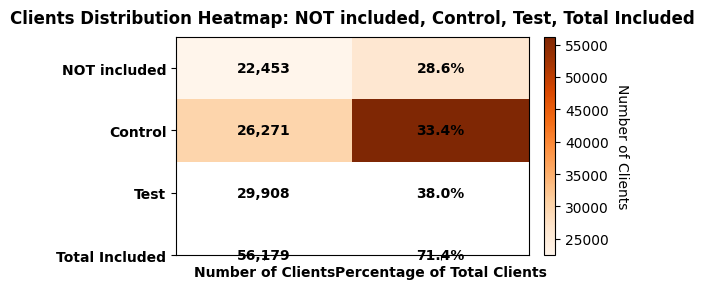

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the cleaned dataset
df = pd.read_csv("../data/clean/df_vanguard_ab_test_clean_v2.csv")

# Count unique visitors per test group
client_counts = (
    df.groupby('test_group')['visitor_id']
      .nunique()
      .reset_index()
      .rename(columns={'visitor_id': 'Number of Clients'})
)

# Ensure order
order = ['NOT included', 'Control', 'Test']
client_counts = client_counts.set_index('test_group').reindex(order, fill_value=0).reset_index()

# Add "Total Included" row (Control + Test)
total_included = client_counts.loc[client_counts['test_group'].isin(['Control','Test']), 'Number of Clients'].sum()
client_counts = pd.concat([
    client_counts,
    pd.DataFrame([{'test_group': 'Total Included', 'Number of Clients': total_included}])
], ignore_index=True)

# Add percentage column (of total clients excluding NOT included)
total_clients = client_counts.loc[client_counts['test_group'] != 'Total Included', 'Number of Clients'].sum()
client_counts['Percentage of Total Clients'] = (
    client_counts['Number of Clients'] / total_clients * 100
).round(1)

# Prepare data for heatmap
data = client_counts.set_index('test_group')[['Number of Clients', 'Percentage of Total Clients']]

# Create heatmap
fig, ax = plt.subplots(figsize=(6, 3))

# Use imshow for heatmap (color intensity based on Number of Clients)
heatmap = ax.imshow(data['Number of Clients'].values.reshape(-1, 2), cmap='Oranges', aspect='auto')

# Add annotations
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        val = data.iloc[i, j]
        if j == 0:  # Number of Clients
            text = f"{int(val):,}"
        else:       # Percentage
            text = f"{val}%"
        ax.text(j, i, text, ha='center', va='center', fontweight='bold', color='black')

# Set ticks
ax.set_xticks(np.arange(data.shape[1]))
ax.set_xticklabels(data.columns, fontweight='bold')
ax.set_yticks(np.arange(data.shape[0]))
ax.set_yticklabels(data.index, fontweight='bold')

# Add colorbar for reference
cbar = plt.colorbar(heatmap, ax=ax, fraction=0.05, pad=0.04)
cbar.set_label('Number of Clients', rotation=270, labelpad=15)

plt.title("Clients Distribution Heatmap: NOT included, Control, Test, Total Included", fontweight='bold', pad=10)
plt.tight_layout()
plt.show()


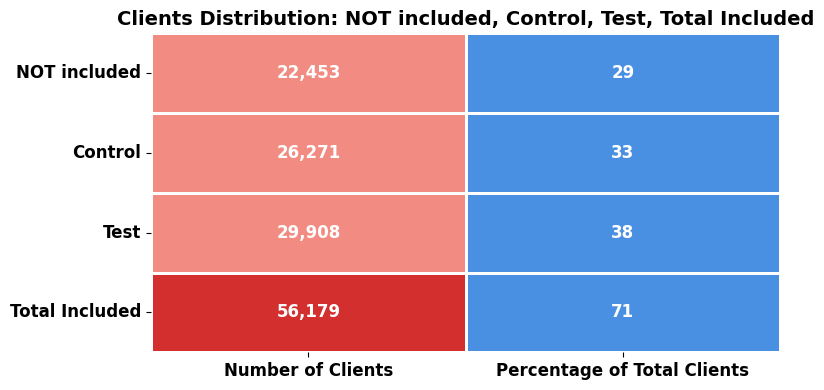

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("../data/clean/df_vanguard_ab_test_clean_v2.csv")

# Count unique visitors per test group
client_counts = (
    df.groupby('test_group')['visitor_id']
      .nunique()
      .reset_index()
      .rename(columns={'visitor_id': 'Number of Clients'})
)

# Ensure order
order = ['NOT included', 'Control', 'Test']
client_counts = client_counts.set_index('test_group').reindex(order, fill_value=0).reset_index()

# Add "Total Included" row (Control + Test)
total_included = client_counts.loc[client_counts['test_group'].isin(['Control','Test']), 'Number of Clients'].sum()
client_counts = pd.concat([
    client_counts,
    pd.DataFrame([{'test_group': 'Total Included', 'Number of Clients': total_included}])
], ignore_index=True)

# Add percentage column (of total clients excluding NOT included)
total_clients = client_counts.loc[client_counts['test_group'] != 'Total Included', 'Number of Clients'].sum()
client_counts['Percentage of Total Clients'] = (
    client_counts['Number of Clients'] / total_clients * 100
).round(1)

# Prepare data
data = client_counts.set_index('test_group')[['Number of Clients', 'Percentage of Total Clients']]

# Create a color map: blue for NOT included, red gradient for included
cmap = ['#4a90e2', '#f28b82', '#f28b82', '#d32f2f']  # Blue, Light Red, Light Red, Dark Red

# Create a figure
fig, ax = plt.subplots(figsize=(8, 4))

# Plot heatmap using seaborn
sns.heatmap(
    data,
    annot=True,
    fmt=',.0f',  # integers for number of clients
    cmap=sns.color_palette(cmap),
    linewidths=1,
    linecolor='white',
    cbar=False,
    annot_kws={"fontsize":12, "fontweight":'bold'}
)

# Adjust labels and title
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_title("Clients Distribution: NOT included, Control, Test, Total Included", fontsize=14, fontweight='bold')
ax.set_yticklabels(data.index, rotation=0, fontsize=12, fontweight='bold')
ax.set_xticklabels(data.columns, fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


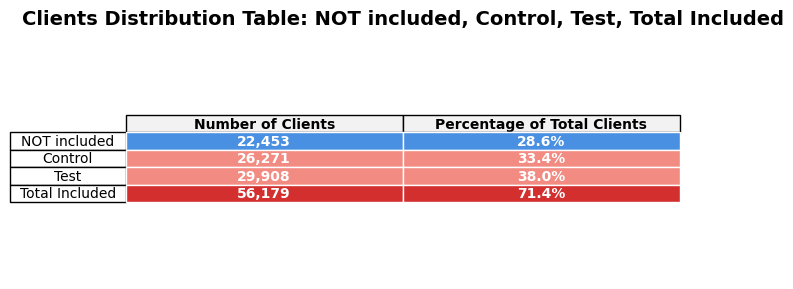

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned dataset
df = pd.read_csv("../data/clean/df_vanguard_ab_test_clean_v2.csv")

# Count unique visitors per test group
client_counts = (
    df.groupby('test_group')['visitor_id']
      .nunique()
      .reset_index()
      .rename(columns={'visitor_id': 'Number of Clients'})
)

# Ensure order
order = ['NOT included', 'Control', 'Test']
client_counts = client_counts.set_index('test_group').reindex(order, fill_value=0).reset_index()

# Add "Total Included" row (Control + Test)
total_included = client_counts.loc[client_counts['test_group'].isin(['Control','Test']), 'Number of Clients'].sum()
client_counts = pd.concat([
    client_counts,
    pd.DataFrame([{'test_group': 'Total Included', 'Number of Clients': total_included}])
], ignore_index=True)

# Add percentage column (of total clients excluding NOT included)
total_clients = client_counts.loc[client_counts['test_group'] != 'Total Included', 'Number of Clients'].sum()
client_counts['Percentage of Total Clients'] = (
    client_counts['Number of Clients'] / total_clients * 100
).round(1)

# Prepare data for table
data = client_counts.set_index('test_group')[['Number of Clients', 'Percentage of Total Clients']]

# Create figure
fig, ax = plt.subplots(figsize=(7, 3))
ax.axis('off')  # hide axes

# Define row colors
row_colors = {
    'NOT included': '#4a90e2',   # blue
    'Control': '#f28b82',        # light red
    'Test': '#f28b82',           # light red
    'Total Included': '#d32f2f'  # dark red
}

# Create table
cell_text = []
row_labels = data.index.tolist()
for row in row_labels:
    cell_text.append([
        f"{int(data.loc[row, 'Number of Clients']):,}",
        f"{data.loc[row, 'Percentage of Total Clients']}%"
    ])

table = ax.table(
    cellText=cell_text,
    rowLabels=row_labels,
    colLabels=data.columns,
    cellLoc='center',
    rowLoc='center',
    loc='center'
)

# Apply colors
for i, row in enumerate(row_labels):
    for j in range(len(data.columns)):
        table[(i+1, j)].set_facecolor(row_colors[row])
        table[(i+1, j)].set_edgecolor('white')
        table[(i+1, j)].set_text_props(weight='bold', color='white')

# Header style
for j in range(len(data.columns)):
    table[(0, j)].set_facecolor('#f2f2f2')
    table[(0, j)].set_text_props(weight='bold', color='black')

plt.title("Clients Distribution Table: NOT included, Control, Test, Total Included", fontsize=14, fontweight='bold', pad=10)
plt.tight_layout()
plt.show()


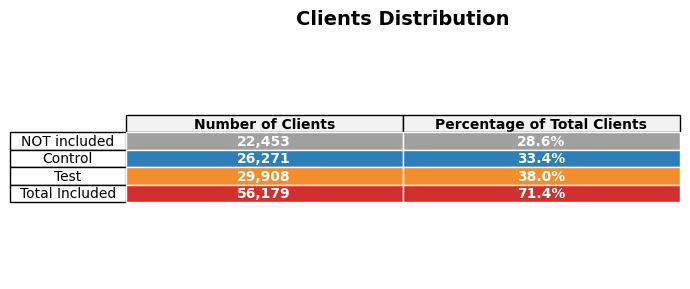

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned dataset
df = pd.read_csv("../data/clean/df_vanguard_ab_test_clean_v2.csv")

# Count unique visitors per test group
client_counts = (
    df.groupby('test_group')['visitor_id']
      .nunique()
      .reset_index()
      .rename(columns={'visitor_id': 'Number of Clients'})
)

# Ensure order
order = ['NOT included', 'Control', 'Test']
client_counts = client_counts.set_index('test_group').reindex(order, fill_value=0).reset_index()

# Add "Total Included" row (Control + Test)
total_included = client_counts.loc[client_counts['test_group'].isin(['Control','Test']), 'Number of Clients'].sum()
client_counts = pd.concat([
    client_counts,
    pd.DataFrame([{'test_group': 'Total Included', 'Number of Clients': total_included}])
], ignore_index=True)

# Add percentage column (of total clients excluding NOT included)
total_clients = client_counts.loc[client_counts['test_group'] != 'Total Included', 'Number of Clients'].sum()
client_counts['Percentage of Total Clients'] = (
    client_counts['Number of Clients'] / total_clients * 100
).round(1)

# Prepare data for table
data = client_counts.set_index('test_group')[['Number of Clients', 'Percentage of Total Clients']]

# Create figure
fig, ax = plt.subplots(figsize=(7, 3))
ax.axis('off')  # hide axes

# Define row colors exactly as requested
row_colors = {
    'NOT included': '#a0a0a0',   # grey
    'Control': '#2c7fb8',        # blue
    'Test': '#f28e2b',           # red-orange
    'Total Included': '#d32f2f'  # darker red
}

# Create table
cell_text = []
row_labels = data.index.tolist()
for row in row_labels:
    cell_text.append([
        f"{int(data.loc[row, 'Number of Clients']):,}",
        f"{data.loc[row, 'Percentage of Total Clients']}%"
    ])

table = ax.table(
    cellText=cell_text,
    rowLabels=row_labels,
    colLabels=data.columns,
    cellLoc='center',
    rowLoc='center',
    loc='center'
)

# Apply colors
for i, row in enumerate(row_labels):
    for j in range(len(data.columns)):
        table[(i+1, j)].set_facecolor(row_colors[row])
        table[(i+1, j)].set_edgecolor('white')
        table[(i+1, j)].set_text_props(weight='bold', color='white')

# Header style
for j in range(len(data.columns)):
    table[(0, j)].set_facecolor('#f2f2f2')
    table[(0, j)].set_text_props(weight='bold', color='black')

plt.title("Clients Distribution", fontsize=14, fontweight='bold', pad=10)
plt.tight_layout()
plt.show()


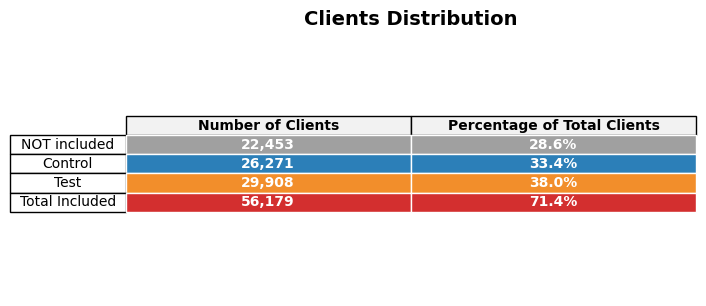

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned dataset
df = pd.read_csv("../data/clean/df_vanguard_ab_test_clean_v2.csv")

# Count unique visitors per test group
client_counts = (
    df.groupby('test_group')['visitor_id']
      .nunique()
      .reset_index()
      .rename(columns={'visitor_id': 'Number of Clients'})
)

# Ensure order
order = ['NOT included', 'Control', 'Test']
client_counts = client_counts.set_index('test_group').reindex(order, fill_value=0).reset_index()

# Add "Total Included" row (Control + Test)
total_included = client_counts.loc[client_counts['test_group'].isin(['Control','Test']), 'Number of Clients'].sum()
client_counts = pd.concat([
    client_counts,
    pd.DataFrame([{'test_group': 'Total Included', 'Number of Clients': total_included}])
], ignore_index=True)

# Add percentage column (of total clients excluding NOT included)
total_clients = client_counts.loc[client_counts['test_group'] != 'Total Included', 'Number of Clients'].sum()
client_counts['Percentage of Total Clients'] = (
    client_counts['Number of Clients'] / total_clients * 100
).round(1)

# Prepare data for table
data = client_counts.set_index('test_group')[['Number of Clients', 'Percentage of Total Clients']]

# Create figure
fig, ax = plt.subplots(figsize=(7, 3))
ax.axis('off')  # hide axes

# Define row colors
row_colors = {
    'NOT included': '#a0a0a0',   # grey
    'Control': '#2c7fb8',        # blue
    'Test': '#f28e2b',           # red-orange
    'Total Included': '#d32f2f'  # dark red
}

# Create table
cell_text = []
row_labels = data.index.tolist()
for row in row_labels:
    cell_text.append([
        f"{int(data.loc[row, 'Number of Clients']):,}",
        f"{data.loc[row, 'Percentage of Total Clients']}%"
    ])

table = ax.table(
    cellText=cell_text,
    rowLabels=row_labels,
    colLabels=data.columns,
    cellLoc='center',
    rowLoc='center',
    loc='center'
)

# Apply colors
for i, row in enumerate(row_labels):
    for j in range(len(data.columns)):
        table[(i+1, j)].set_facecolor(row_colors[row])
        table[(i+1, j)].set_edgecolor('white')
        table[(i+1, j)].set_text_props(weight='bold', color='white')

# Header style
for j in range(len(data.columns)):
    table[(0, j)].set_facecolor('#f2f2f2')
    table[(0, j)].set_text_props(weight='bold', color='black')

# Title with minimal spacing
plt.title("Clients Distribution", fontsize=14, fontweight='bold', pad=5)  # pad reduced from 10 -> 5
plt.tight_layout(pad=0.5)  # reduce extra padding

plt.show()


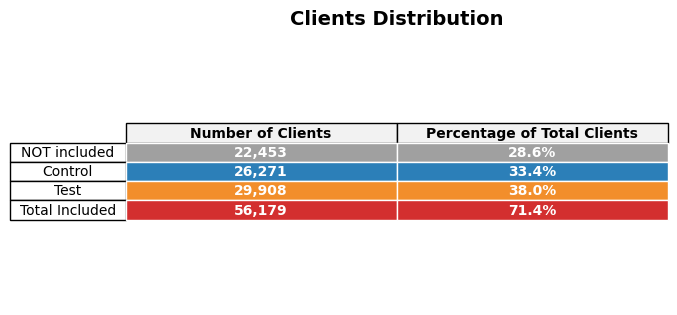

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned dataset
df = pd.read_csv("../data/clean/df_vanguard_ab_test_clean_v2.csv")

# Count unique visitors per test group
client_counts = (
    df.groupby('test_group')['visitor_id']
      .nunique()
      .reset_index()
      .rename(columns={'visitor_id': 'Number of Clients'})
)

# Ensure order
order = ['NOT included', 'Control', 'Test']
client_counts = client_counts.set_index('test_group').reindex(order, fill_value=0).reset_index()

# Add "Total Included" row (Control + Test)
total_included = client_counts.loc[client_counts['test_group'].isin(['Control','Test']), 'Number of Clients'].sum()
client_counts = pd.concat([
    client_counts,
    pd.DataFrame([{'test_group': 'Total Included', 'Number of Clients': total_included}])
], ignore_index=True)

# Add percentage column (of total clients excluding NOT included)
total_clients = client_counts.loc[client_counts['test_group'] != 'Total Included', 'Number of Clients'].sum()
client_counts['Percentage of Total Clients'] = (
    client_counts['Number of Clients'] / total_clients * 100
).round(1)

# Prepare data for table
data = client_counts.set_index('test_group')[['Number of Clients', 'Percentage of Total Clients']]

# Create figure
fig, ax = plt.subplots(figsize=(7, 3))
ax.axis('off')  # hide axes

# Define row colors
row_colors = {
    'NOT included': '#a0a0a0',   # grey
    'Control': '#2c7fb8',        # blue
    'Test': '#f28e2b',           # red-orange
    'Total Included': '#d32f2f'  # dark red
}

# Create table
cell_text = []
row_labels = data.index.tolist()
for row in row_labels:
    cell_text.append([
        f"{int(data.loc[row, 'Number of Clients']):,}",
        f"{data.loc[row, 'Percentage of Total Clients']}%"
    ])

table = ax.table(
    cellText=cell_text,
    rowLabels=row_labels,
    colLabels=data.columns,
    cellLoc='center',
    rowLoc='center',
    loc='center'
)

# Apply colors
for i, row in enumerate(row_labels):
    for j in range(len(data.columns)):
        table[(i+1, j)].set_facecolor(row_colors[row])
        table[(i+1, j)].set_edgecolor('white')
        table[(i+1, j)].set_text_props(weight='bold', color='white')

# Header style
for j in range(len(data.columns)):
    table[(0, j)].set_facecolor('#f2f2f2')
    table[(0, j)].set_text_props(weight='bold', color='black')

# Place title at the top edge with no spacing
plt.title("Clients Distribution", fontsize=14, fontweight='bold', y=1.02)  # slightly above figure top
fig.subplots_adjust(top=1)  # push title to the top edge

plt.show()


<hr>

## PLOT 11: Logins vs Calls  Past 6 months - Control vs Test


<style>
h1 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h2 {
    text-align: left;
    color: black;
    font-weight: bold;
}
</style>

<style>
h3 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h4 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>
<hr>

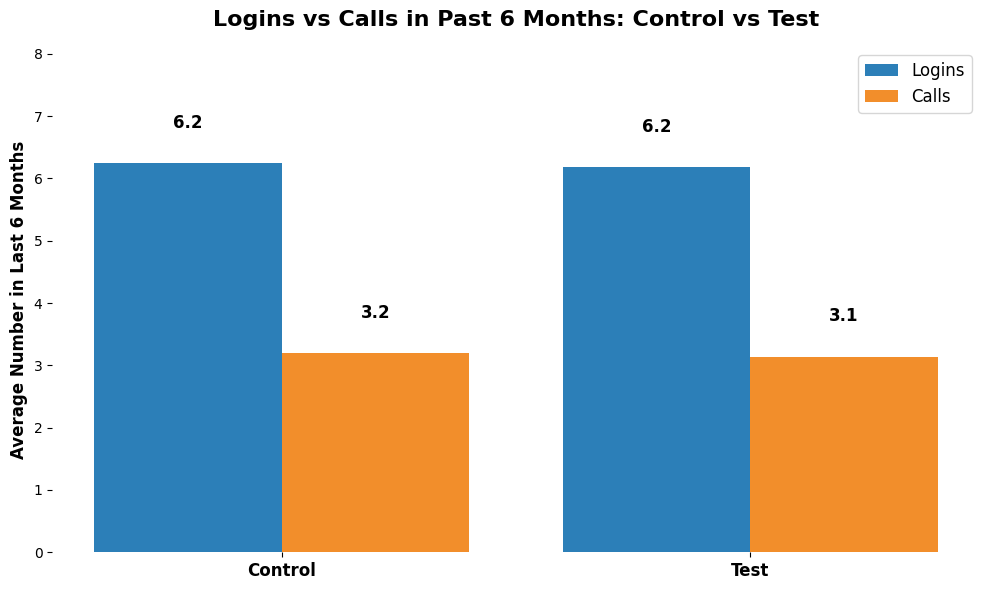

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load dataframe
df = pd.read_csv("../data/clean/df_vanguard_ab_test_clean_v2.csv")

# Deduplicate per visitor to avoid double counting
visitor_df = df[['visitor_id', 'test_group', 'logins_last_6_months', 'calls_last_6_months']].drop_duplicates(subset='visitor_id')

# Aggregate average logins and calls per test group
agg_data = visitor_df.groupby('test_group')[['logins_last_6_months', 'calls_last_6_months']].mean().reset_index()

# Ensure Control/Test order
order = ['Control', 'Test']
agg_data = agg_data.set_index('test_group').reindex(order).reset_index()

# X locations
x = np.arange(len(agg_data))
width = 0.4  # slightly wider bars with spacing

# Create figure
fig, ax = plt.subplots(figsize=(10, 6))  # wider figure for spacing

# Plot bars
bars1 = ax.bar(x - width/2, agg_data['logins_last_6_months'], width, label='Logins', color='#2c7fb8')
bars2 = ax.bar(x + width/2, agg_data['calls_last_6_months'], width, label='Calls', color='#f28e2b')

# Add labels above bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width()/2,
            height + 0.5,  # padding above bar
            f"{height:.1f}",
            ha='center',
            va='bottom',
            fontweight='bold',
            fontsize=12
        )

# X-axis
ax.set_xticks(x)
ax.set_xticklabels(agg_data['test_group'], fontsize=12, fontweight='bold')

# Y-axis
ax.set_ylabel("Average Number in Last 6 Months", fontsize=12, fontweight='bold')
ax.set_ylim(0, max(agg_data[['logins_last_6_months','calls_last_6_months']].max()) * 1.3)  # headroom

# Remove grey spines and grid
ax.grid(False)
for spine in ax.spines.values():
    spine.set_visible(False)

# Title
ax.set_title("Logins vs Calls in Past 6 Months: Control vs Test", fontsize=16, fontweight='bold', pad=15)

# Legend
ax.legend(fontsize=12)

plt.tight_layout()
plt.show()


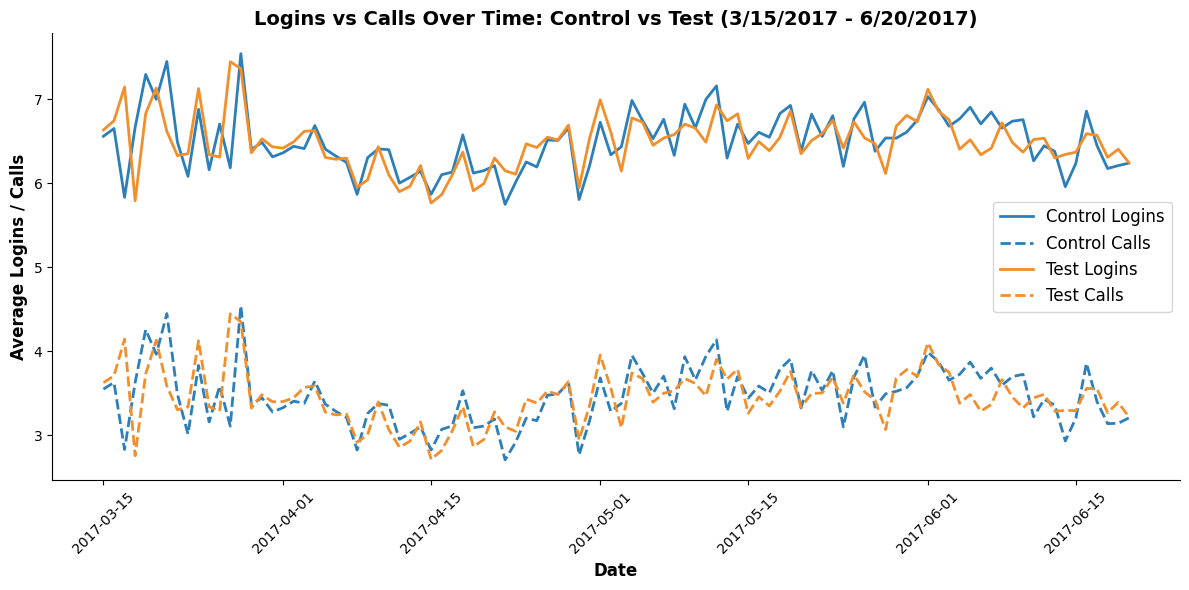

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataframe
df = pd.read_csv("../data/clean/df_vanguard_ab_test_clean_v2.csv")

# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

# Filter for A/B test period
start_date = '2017-03-15'
end_date = '2017-06-20'
df_period = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

# Deduplicate per visitor per day to avoid double counting
df_unique = df_period[['visitor_id', 'date', 'test_group', 'logins_last_6_months', 'calls_last_6_months']].drop_duplicates(subset=['visitor_id', 'date'])

# Aggregate daily averages per group
daily_avg = df_unique.groupby(['date', 'test_group'])[['logins_last_6_months','calls_last_6_months']].mean().reset_index()

# Separate Control and Test for plotting
control = daily_avg[daily_avg['test_group']=='Control']
test = daily_avg[daily_avg['test_group']=='Test']

# Plot
plt.figure(figsize=(12,6))

# Control lines
plt.plot(control['date'], control['logins_last_6_months'], label='Control Logins', color='#2c7fb8', linewidth=2)
plt.plot(control['date'], control['calls_last_6_months'], label='Control Calls', color='#2c7fb8', linestyle='--', linewidth=2)

# Test lines
plt.plot(test['date'], test['logins_last_6_months'], label='Test Logins', color='#f28e2b', linewidth=2)
plt.plot(test['date'], test['calls_last_6_months'], label='Test Calls', color='#f28e2b', linestyle='--', linewidth=2)

# Labels and title
plt.xlabel("Date", fontsize=12, fontweight='bold')
plt.ylabel("Average Logins / Calls", fontsize=12, fontweight='bold')
plt.title("Logins vs Calls Over Time: Control vs Test (3/15/2017 - 6/20/2017)", fontsize=14, fontweight='bold')

# Rotate x-axis for readability
plt.xticks(rotation=45)

# Legend
plt.legend(fontsize=12)

# Remove top/right spines for cleaner look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


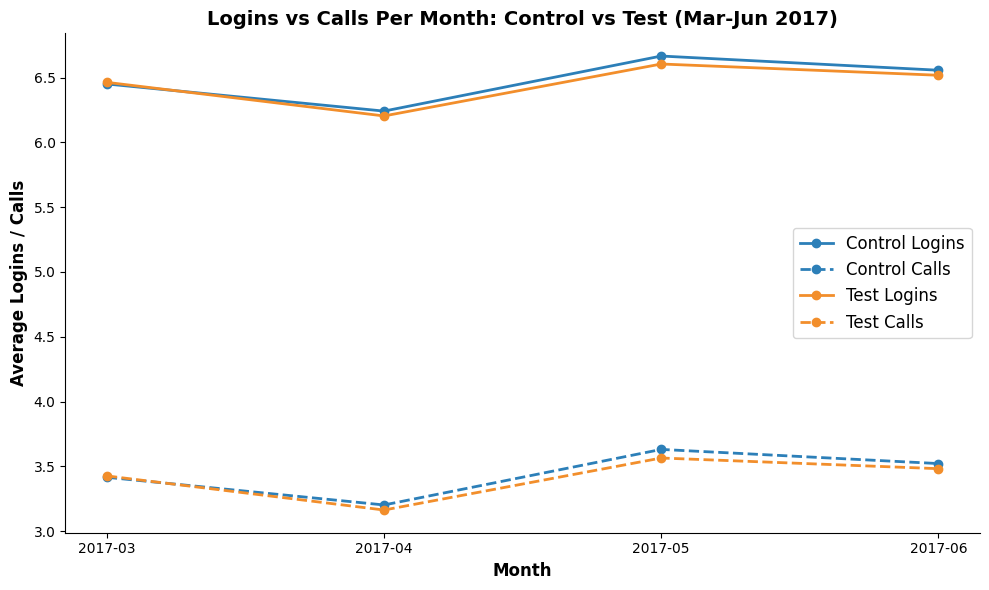

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataframe
df = pd.read_csv("../data/clean/df_vanguard_ab_test_clean_v2.csv")

# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

# Filter for A/B test period
start_date = '2017-03-15'
end_date = '2017-06-20'
df_period = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

# Deduplicate per visitor per day
df_unique = df_period[['visitor_id', 'date', 'test_group', 'logins_last_6_months', 'calls_last_6_months']].drop_duplicates(subset=['visitor_id', 'date'])

# Extract year-month for aggregation
df_unique['year_month'] = df_unique['date'].dt.to_period('M')

# Aggregate average per month per group
monthly_avg = df_unique.groupby(['year_month', 'test_group'])[['logins_last_6_months','calls_last_6_months']].mean().reset_index()

# Convert Period to string for plotting
monthly_avg['year_month'] = monthly_avg['year_month'].astype(str)

# Separate Control and Test
control = monthly_avg[monthly_avg['test_group']=='Control']
test = monthly_avg[monthly_avg['test_group']=='Test']

# Plot
plt.figure(figsize=(10,6))

# Control lines
plt.plot(control['year_month'], control['logins_last_6_months'], label='Control Logins', color='#2c7fb8', linewidth=2, marker='o')
plt.plot(control['year_month'], control['calls_last_6_months'], label='Control Calls', color='#2c7fb8', linestyle='--', linewidth=2, marker='o')

# Test lines
plt.plot(test['year_month'], test['logins_last_6_months'], label='Test Logins', color='#f28e2b', linewidth=2, marker='o')
plt.plot(test['year_month'], test['calls_last_6_months'], label='Test Calls', color='#f28e2b', linestyle='--', linewidth=2, marker='o')

# Labels and title
plt.xlabel("Month", fontsize=12, fontweight='bold')
plt.ylabel("Average Logins / Calls", fontsize=12, fontweight='bold')
plt.title("Logins vs Calls Per Month: Control vs Test (Mar-Jun 2017)", fontsize=14, fontweight='bold')

# Legend
plt.legend(fontsize=12)

# Remove top/right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


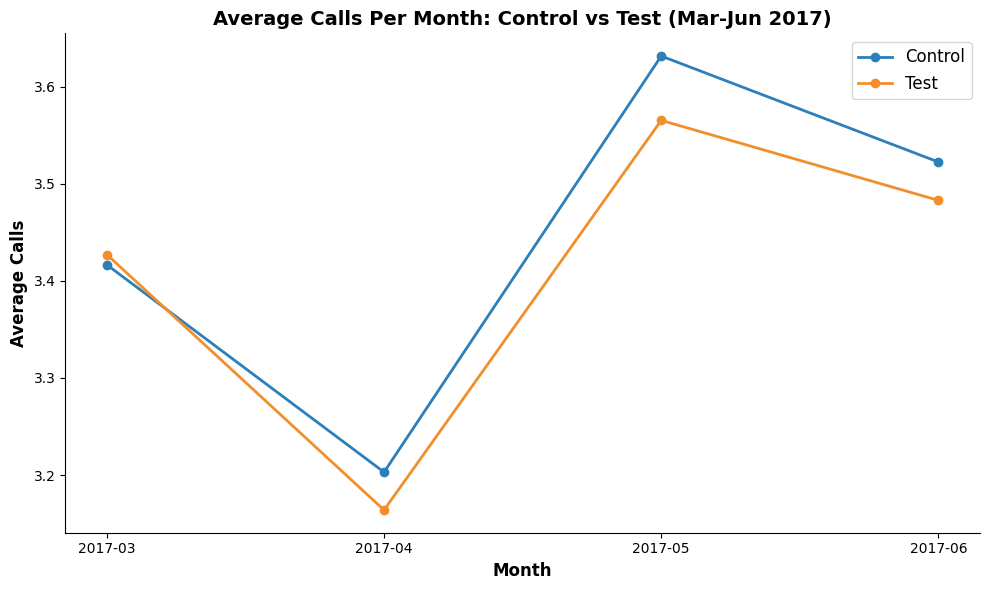

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataframe
df = pd.read_csv("../data/clean/df_vanguard_ab_test_clean_v2.csv")

# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

# Filter for A/B test period
start_date = '2017-03-15'
end_date = '2017-06-20'
df_period = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

# Deduplicate per visitor per day
df_unique = df_period[['visitor_id', 'date', 'test_group', 'calls_last_6_months']].drop_duplicates(subset=['visitor_id', 'date'])

# Extract year-month for aggregation
df_unique['year_month'] = df_unique['date'].dt.to_period('M')

# Aggregate average calls per month per group
monthly_calls = df_unique.groupby(['year_month', 'test_group'])['calls_last_6_months'].mean().reset_index()

# Convert Period to string for plotting
monthly_calls['year_month'] = monthly_calls['year_month'].astype(str)

# Separate Control and Test
control = monthly_calls[monthly_calls['test_group']=='Control']
test = monthly_calls[monthly_calls['test_group']=='Test']

# Plot
plt.figure(figsize=(10,6))

plt.plot(control['year_month'], control['calls_last_6_months'], label='Control', color='#2c7fb8', linewidth=2, marker='o')
plt.plot(test['year_month'], test['calls_last_6_months'], label='Test', color='#f28e2b', linewidth=2, marker='o')

# Labels and title
plt.xlabel("Month", fontsize=12, fontweight='bold')
plt.ylabel("Average Calls", fontsize=12, fontweight='bold')
plt.title("Average Calls Per Month: Control vs Test (Mar-Jun 2017)", fontsize=14, fontweight='bold')

# Legend
plt.legend(fontsize=12)

# Remove top/right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


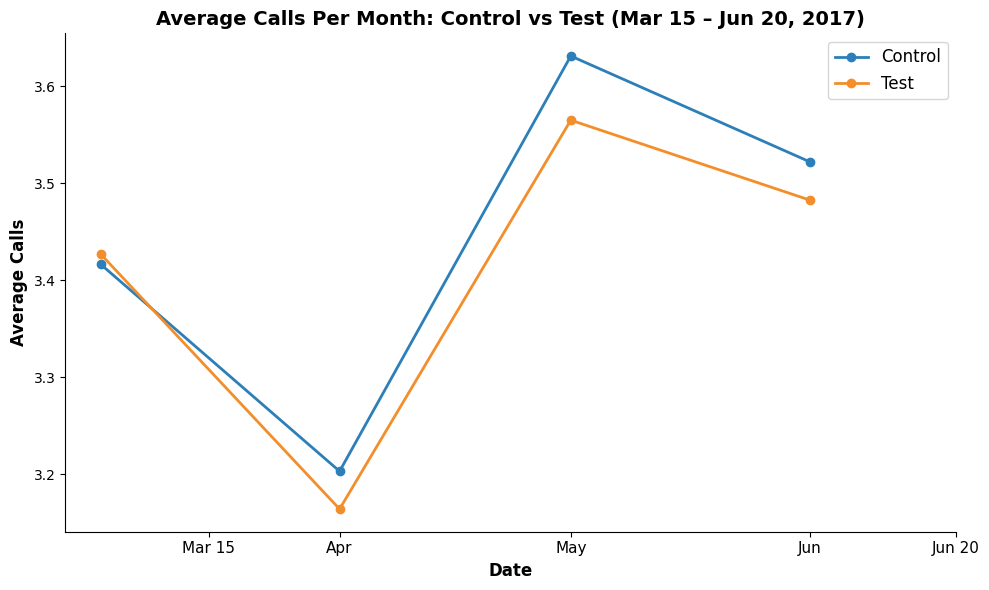

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataframe
df = pd.read_csv("../data/clean/df_vanguard_ab_test_clean_v2.csv")

# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

# Filter for A/B test period
start_date = pd.to_datetime('2017-03-15')
end_date = pd.to_datetime('2017-06-20')
df_period = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

# Deduplicate per visitor per day
df_unique = df_period[['visitor_id', 'date', 'test_group', 'calls_last_6_months']].drop_duplicates(subset=['visitor_id', 'date'])

# Aggregate average calls per month per group
monthly_calls = df_unique.groupby([pd.Grouper(key='date', freq='MS'), 'test_group'])['calls_last_6_months'].mean().reset_index()

# Separate Control and Test
control = monthly_calls[monthly_calls['test_group']=='Control']
test = monthly_calls[monthly_calls['test_group']=='Test']

# Plot
plt.figure(figsize=(10,6))

plt.plot(control['date'], control['calls_last_6_months'], label='Control', color='#2c7fb8', linewidth=2, marker='o')
plt.plot(test['date'], test['calls_last_6_months'], label='Test', color='#f28e2b', linewidth=2, marker='o')

# Labels and title
plt.xlabel("Date", fontsize=12, fontweight='bold')
plt.ylabel("Average Calls", fontsize=12, fontweight='bold')
plt.title("Average Calls Per Month: Control vs Test (Mar 15 – Jun 20, 2017)", fontsize=14, fontweight='bold')

# Format x-axis to show start/mid/end dates
plt.xticks(
    [pd.to_datetime(d) for d in ['2017-03-15', '2017-04-01', '2017-05-01', '2017-06-01', '2017-06-20']],
    ['Mar 15', 'Apr', 'May', 'Jun', 'Jun 20'],
    fontsize=11
)

# Legend
plt.legend(fontsize=12)

# Remove top/right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


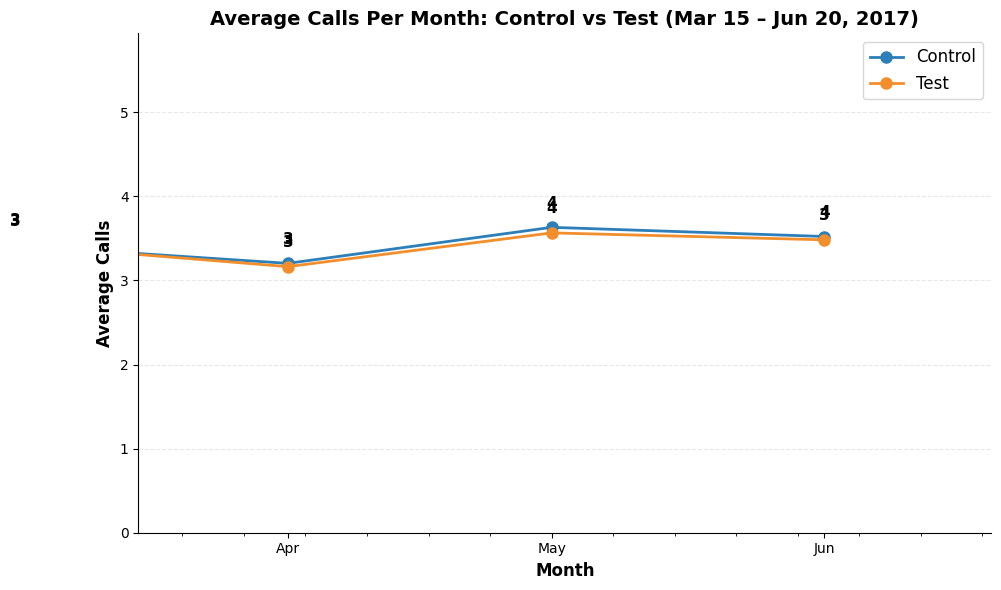

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load dataframe
df = pd.read_csv("../data/clean/df_vanguard_ab_test_clean_v2.csv")

# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

# Filter for A/B test period
start_date = pd.to_datetime('2017-03-15')
end_date = pd.to_datetime('2017-06-20')
df_period = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

# Deduplicate per visitor per day
df_unique = df_period[['visitor_id', 'date', 'test_group', 'calls_last_6_months']].drop_duplicates(subset=['visitor_id', 'date'])

# Aggregate average calls per month per group (month start)
monthly_calls = df_unique.groupby([pd.Grouper(key='date', freq='MS'), 'test_group'])['calls_last_6_months'].mean().reset_index()

# Separate Control and Test
control = monthly_calls[monthly_calls['test_group'] == 'Control']
test = monthly_calls[monthly_calls['test_group'] == 'Test']

# Plot
fig, ax = plt.subplots(figsize=(10,6))

# Plot lines with markers
ax.plot(control['date'], control['calls_last_6_months'], label='Control', color='#2c7fb8', linewidth=2, marker='o', markersize=8)
ax.plot(test['date'], test['calls_last_6_months'], label='Test', color='#f28e2b', linewidth=2, marker='o', markersize=8)

# Labels and title
ax.set_xlabel("Month", fontsize=12, fontweight='bold')
ax.set_ylabel("Average Calls", fontsize=12, fontweight='bold')
ax.set_title("Average Calls Per Month: Control vs Test (Mar 15 – Jun 20, 2017)", fontsize=14, fontweight='bold')

# X-axis formatting: show each month and start/end of test
ax.set_xlim(start_date, end_date)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_minor_locator(mdates.WeekdayLocator(byweekday=mdates.MO))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Y-axis headroom
ax.set_ylim(0, monthly_calls['calls_last_6_months'].max() * 1.3)

# Add data labels above points
for x_vals, y_vals in [(control['date'], control['calls_last_6_months']),
                       (test['date'], test['calls_last_6_months'])]:
    for x, y in zip(x_vals, y_vals):
        ax.text(x, y + 0.2, f"{round(y)}", ha='center', va='bottom', fontweight='bold', fontsize=11)

# Legend
ax.legend(fontsize=12)

# Remove top/right spines for a clean look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Optional: light horizontal gridlines for readability
ax.yaxis.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()
